# Backtest

In [94]:
# Запуск оптимизации
symbol_1 = 'BTCUSDT'
interval_1 = '1h'
start_date_1 = '2023-12'
end_date_1 = '2024-12'
max_evals_1 = 100

# Параметры для оптимизации
params_to_optimize_1 = {
    'window_length': {'type': 'quniform', 'range': (5, 70, 1)},
    'sloping_atr_length': {'type': 'quniform', 'range': (7, 50, 1)},
    # 'min_space': {'type': 'quniform', 'range': ( 3, 15, 1)},
    'take_profit_multiplier': {'type': 'uniform', 'range': (1.0, 3.5)},
    'stop_loss_multiplier': {'type': 'uniform', 'range': (0.5, 3.0)},
}

# # Фиксированные параметры
fixed_params_1 = {
    'min_space': 5,
    # 'window_length': 50,
    # 'sloping_atr_length': 20,
    # 'take_profit_multiplier': 1.5,
    # 'stop_loss_multiplier': 0.5
}
# fixed_params_1 = {}



# Запуск оптимизации
symbol_2 = 'SUIUSDT'
interval_2 = '15m'
start_date_2 = '2023-12'
end_date_2 = '2024-12'
max_evals_2 = 30

# Параметры для оптимизации
params_to_optimize_2 = {
    'window_length': {'type': 'quniform', 'range': (5, 100, 1)},
    'sloping_atr_length': {'type': 'quniform', 'range': (7, 30, 1)},
    # 'min_space': {'type': 'quniform', 'range': ( 3, 10, 1)},
    'take_profit_multiplier': {'type': 'uniform', 'range': (1.0, 3.1)},
    'stop_loss_multiplier': {'type': 'uniform', 'range': (0.5, 1.5)},
}

# # Фиксированные параметры
fixed_params_2 = {
      'min_space': 5,
#     'window_length': 50,
#     'sloping_atr_length': 20,
#     'take_profit_multiplier': 1.0,
#     'stop_loss_multiplier': 1.0
}
fixed_params_2 = {}


# Запуск оптимизации
symbol_3 = 'SUIUSDT'
interval_3 = '15m'
start_date_3 = '2023-12'
end_date_3= '2024-12'
max_evals_3 = 30


# Параметры для оптимизации
params_to_optimize_3 = {
    'window_length': {'type': 'quniform', 'range': (5, 100, 1)},
    'sloping_atr_length': {'type': 'quniform', 'range': (7, 30, 1)},
    # 'min_space': {'type': 'quniform', 'range': ( 3, 10, 1)},
    'take_profit_multiplier': {'type': 'uniform', 'range': (1.0, 3.1)},
    'stop_loss_multiplier': {'type': 'uniform', 'range': (0.5, 1.5)},
}

# # Фиксированные параметры
# fixed_params_3 = {
#       'min_space': 5,
# #     'window_length': 50,
# #     'sloping_atr_length': 20,
# #     'take_profit_multiplier': 1.0,
# #     'stop_loss_multiplier': 1.0
# }
fixed_params_3 = {}

params_to_optimize_3, params_to_optimize_2 = params_to_optimize_1, params_to_optimize_1
fixed_params_3, fixed_params_2 = fixed_params_1, fixed_params_1

## Connections and imports

### Drive Connection & DB

In [2]:
import pandas as pd
from google.colab import drive
import os

# Подключение к Google Drive
drive.mount('/content/drive')

# Указать путь к папке с файлами на Google Drive
shared_folder_path = '/content/drive/MyDrive/Sloping bot'

# Указать пути к файлам параметров и результатов бэктеста
params_file_path = f'{shared_folder_path}/optimized_params.csv'
results_file_path = f'{shared_folder_path}/backtest_results.csv'

# Проверка существования файла с оптимизированными параметрами
if os.path.exists(params_file_path):
    optimized_params = pd.read_csv(params_file_path)
else:
    params_columns = [
        'Symbol', 'Interval', 'Start Date', 'End Date', 'Test Return [%]',
        'window_length', 'min_space', 'sloping_atr_length', 'stop_loss_multiplier',
        'take_profit_multiplier'
    ]
    optimized_params = pd.DataFrame(columns=params_columns)

# Проверка существования файла с результатами бэктеста
if os.path.exists(results_file_path):
    backtest_results = pd.read_csv(results_file_path)
else:
    backtest_results_columns = [
        'Symbol', 'Interval', 'Start Date', 'End Date', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
        'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
        'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
        'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
        'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
        'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)',
        'window_length', 'min_space', 'sloping_atr_length', 'stop_loss_multiplier', 'take_profit_multiplier'
    ]
    backtest_results = pd.DataFrame(columns=backtest_results_columns)




Mounted at /content/drive


In [3]:
# import pandas as pd
# from google.colab import drive
# import os

# # Connect to Google Drive
# drive.mount('/content/drive')

# # Specify the path to the shared folder on Google Drive
# shared_folder_path = '/content/drive/MyDrive/Sloping bot'

# # Load existing DataFrames or create new ones
# params_file_path = f'{shared_folder_path}/optimized_params.xlsx'
# results_file_path = f'{shared_folder_path}/backtest_results.xlsx'

# # Check if the optimized parameters file exists
# if os.path.exists(params_file_path):
#     optimized_params = pd.read_excel(params_file_path)
# else:
#     params_columns = [
#         'Symbol', 'Interval', 'Start Date', 'End Date', 'Test Result',
#         'min_space', 'sloping_atr_length', 'stop_loss_multiplier',
#         'take_profit_multiplier', 'window_length'
#     ]
#     optimized_params = pd.DataFrame(columns=params_columns)

# # Check if the backtest results file exists
# if os.path.exists(results_file_path):
#     backtest_results = pd.read_excel(results_file_path)
# else:
#     backtest_results_columns = [
#         'Symbol', 'Interval', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
#         'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
#         'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
#         'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
#         'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
#         'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)'
#     ]
#     backtest_results = pd.DataFrame(columns=backtest_results_columns)


### Imports

In [4]:
!pip install pandas_ta
import pandas_ta as ta
!pip install backtesting
!pip install hyperopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=ac643a52c08bd29205bd2dbcda6eaf5df004e75df6e81161fe5c253ebc51a698
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 3.5 MB/s eta 0:00:00


In [5]:
!python --version

Python 3.11.11


In [6]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3999    0  3999    0     0  12675      0 --:--:-- --:--:-- --:--:-- 12695
100  517k  100  517k    0     0   639k      0 --:--:-- --:--:-- --:--:-- 3275k
--2025-02-16 15:05:43--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.145.37, 104.19.144.37, 2606:4700::6813:9125, ...
Connecting to anaconda.org (anaconda.org)|104.19.145.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [7]:
# # УСТАНОВКА TA-LIB В COLAB
# # Устанавливаем предварительно скомпилированные файлы библиотеки TA-Lib
# !pip install pandas==1.5.3
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# %cd ..
# !pip install ta-lib

In [8]:
# !pip install pandas==1.5.3
# !pip install pandas==2.2.2

In [9]:
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
import os
import requests
import zipfile
import csv
import io
import backtesting
from backtesting.lib import crossover

/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:53: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


In [10]:
# import pandas as pd

# # Создаем пустой DataFrame с для хранения данных
# columns = [
#     'Symbol', 'Interval', 'Total Trades', 'Total PNL', 'Percentage PNL (%)',
#     'Win Rate (%)', 'Profit Factor', 'Risk Ratio',
#     'Num Long Trades', 'Num Short Trades', 'Num Profitable Trades', 'Num Unprofitable Trades',
#     'Avg Profit', 'Avg Loss', 'Max Profit', 'Min Profit', 'Max Loss', 'Min Loss',
#     'Avg Long Duration (days)', 'Avg Long Duration (hours)', 'Avg Long Duration (minutes)', 'Avg Long Duration (seconds)',
#     'Avg Short Duration (days)', 'Avg Short Duration (hours)', 'Avg Short Duration (minutes)', 'Avg Short Duration (seconds)'
# ]


# sloping_backtest_results = pd.DataFrame(columns=columns)

### Strategy

#### Main

In [11]:
# Сама стратегия

from collections import deque
import numpy as np
from dataclasses import dataclass
import pandas_ta
import talib

# датакласс для сигналов
@dataclass
class Signal:
    side: bool
    price: float
    atr: float
    line: tuple

# класс для поиска наклонок
class Sloping:
    length: int
    ts: deque
    open: deque
    high: deque
    low: deque
    close: deque
    body_up: deque
    body_down: deque

    def __init__(self, length, atr_length=14, min_space=5, max_len=500, debug=False):
        # инициализируем переменные
        self.length = length
        self.atr_length = atr_length
        self.min_space = min_space
        self.max_len = max_len
        self.debug = debug
        # счетчики сигналов
        self._last_signal_resistance = min_space + 1
        self._last_signal_support = min_space + 1
        # создаем очереди
        for key, value in self.__annotations__.items():
            if issubclass(value, deque):
                setattr(self, key, deque([.0], maxlen=self.max_len))

    # функция для добавления свечи
    def add_kline(self, ts, open, high, low, close):
        ts = int(ts)
        # проверяем не дублируется ли свеча
        if not self.ts or ts > self.ts[-1]:
            # заполняем очереди
            self.ts.append(ts)
            self.open.append(float(open))
            self.high.append(float(high))
            self.low.append(float(low))
            self.close.append(float(close))
            # определяем верх и низ тела свечи
            self.body_up.append(max(float(open), float(close)))
            self.body_down.append(min(float(open), float(close)))
            # возвращаем True если добавили свечу
            return True
        return False

    # функция для получения сигнала
    def get_value(self, support=True, resistance=True):
        # если не хватает количества свеч, то пропускаем этот сигнал
        if len(self.ts) < self.length + 1:
            return None
        for is_resistance, side in enumerate([support, resistance]):
            # если нам не нужно вычислять поддержу или сопротивление, то пропускаем
            if not side:
                continue
            # берем окно для поиска наклонки (необходимую нам часть тела свечи)
            window = np.array(list(self.body_up if is_resistance else self.body_down)[-self.length:])
            # генерируем индексы свечей
            x = np.arange(len(window))
            # вычисляем точки для поиска наклонки
            slope, intercept = np.polyfit(x, window, 1)
            points = slope * x + intercept
            # ищем минимум или максимум в пределах окна, в зависимости от того, что мы ищем
            value = (window - points).argmax() if is_resistance else (window - points).argmin()
            # получаем наклонную линию
            line = self._get_line(window, slope, value, is_resistance)
            # если произошел пробой сопротивления
            if is_resistance and (self.close[-1] > line[1] + self.length * line[0] or self.debug):
                # если сигнал был более min_space количества свечей назад
                if self._last_signal_resistance > self.min_space:
                    # обнуляем счетчик
                    self._last_signal_resistance = 0
                    # возвращаем сигнал
                    return Signal(True, self.close[-1], self.get_atr(), line)
                # обнуляем счетчик в любом случае
                self._last_signal_resistance = 0
            else:
                # если не было сигнала, то увеличиваем счетчик
                self._last_signal_resistance += 1
            # если произошел пробой поддержки
            if not is_resistance and (self.close[-1] < line[1] + self.length * line[0] or self.debug):
                # если сигнал был более min_space количества свечей назад
                if self._last_signal_support > self.min_space:
                    # обнуляем счетчик
                    self._last_signal_support = 0
                    # возвращаем сигнал
                    return Signal(False, self.close[-1], self.get_atr(), line)
                # обнуляем счетчик в любом случае
                self._last_signal_support = 0
            else:
                # если не было сигнала, то увеличиваем счетчик
                self._last_signal_support += 1

    # функция для поиска наклонной линии
    def _get_line(self, window, slope, value_index, is_resistance):
        # вычисляем шаг изменения наклона
        slope_step = (window.max() - window.min()) / len(window)
        # инициализируем начальные значения
        step = 1
        min_step = 0.0001
        best_slope = slope
        # вычисляем первоначальное значение тренда
        best_value = self._check_trend(window, slope, value_index, is_resistance)
        # флаг для вычисления производной
        get_der = True
        # переменная для хранения производной
        der = None
        # пока шаг не меньше min_step
        while step > min_step:
            # если нам нужно вычислять производную
            if get_der:
                # изменяем наклон на минимальный шаг
                slope_change = best_slope + slope_step * min_step
                # вычисляем значение еще раз
                test_value = self._check_trend(window, slope_change, value_index, is_resistance)
                # если значение меньше нуля, то меняем наклон
                if test_value < 0:
                    slope_change = best_slope - slope_step * min_step
                    # вычисляем значение еще раз
                    test_value = self._check_trend(window, slope_change, value_index, is_resistance)
                # запоминаем производную
                der = test_value - best_value
                get_der = False
            # в зависимости от знака производной меняем наклон
            if der > 0:
                test_slope = best_slope - slope_step * step
            else:
                test_slope = best_slope + slope_step * step
            # вычисляем значение
            test_value = self._check_trend(window, test_slope, value_index, is_resistance)
            # если значение меньше нуля или не улучшает лучшее значение, то уменьшаем шаг в 2 раза
            if test_value < 0 or test_value >= best_value:
                step *= 0.5
            else:
                # если значение улучшилось, то запоминаем наклон и значение
                best_slope = test_slope
                best_value = test_value
                get_der = True
        # возвращаем лучшее значение и пересечение с линей
        return best_slope, -best_slope * value_index + window[value_index]

    # функция для проверки тренда
    def _check_trend(self, window, slope, value_index, is_resistance):
        # вычисляем пересечение с линей
        intecept = -slope * value_index + window[value_index]
        # получаем все точки наклонки
        line_vals = slope * np.arange(len(window)) + intecept
        # вычисляем разницу между точками наклонки и телом свечей
        diffs = line_vals - window
        # проверяем линию на корректность
        if (not is_resistance and diffs.max() > 0) or (is_resistance and diffs.min() < 0):
            # если линия некорректна, то возвращаем -1
            return -1
        # возвращаем сумму квадратов разниц, которая является мерой отклонения линии тренда
        return (diffs ** 2).sum()

    # # функция для получения ATR
    def get_atr(self):
    #     # вычисляем ATR
        return talib.ATR(np.array(self.high), np.array(self.low), np.array(self.close), self.atr_length)[-1]

    # вычисляем ATR с использованием pandas_ta
    # # Преобразуем deque в pandas.Series
    #   high_series = pd.Series(self.high)
    #   low_series = pd.Series(self.low)
    #   close_series = pd.Series(self.close)

    #   # Вычисляем ATR с использованием pandas_ta
    #   atr = ta.atr(high_series, low_series, close_series, length=self.atr_length)

    #   # Проверяем, если atr пуст или данных недостаточно
    #   if atr is None or len(atr) < self.atr_length:
    #       return 0  # или любое значение по умолчанию

    #   return atr.iloc[-1]




In [12]:
# # Инициализируем индикатор
# sloping = Sloping(length=10, atr_length=14, min_space=5)  # Измените параметры по мере необходимости

# # Генерируем сигналы
# signals = []
# for index, row in df.iterrows():
#     ts = int(row.name.timestamp() * 1000)  # Время в миллисекундах
#     open = row['Open']
#     high = row['High']
#     low = row['Low']
#     close = row['Close']

#     if sloping.add_kline(ts, open, high, low, close):
#         signal = sloping.get_value()
#         if signal:
#             signals.append({
#                 'timestamp': index,
#                 'side': signal.side,
#                 'price': signal.price,
#                 'atr': signal.atr,
#                 'line': signal.line
#             })

# count = 0
# # Выводим полученные сигналы
# for signal in signals:

#     print(signal)
#     count += 1
# print(count)

In [13]:
# # Инициализируем индикатор
# sloping = Sloping(length=10, atr_length=14, min_space=5)  # Измените параметры по мере необходимости

# # Генерируем сигналы
# signals_lib = []
# for index, row in df.iterrows():
#     ts = int(row.name.timestamp() * 1000)  # Время в миллисекундах
#     open = row['Open']
#     high = row['High']
#     low = row['Low']
#     close = row['Close']

#     if sloping.add_kline(ts, open, high, low, close):
#         signal = sloping.get_value()
#         if signal:
#             signals_lib.append({
#                 'timestamp': index,
#                 'side': signal.side,
#                 'price': signal.price,
#                 'atr': signal.atr,
#                 'line': signal.line
#             })

# count = 0
# # Выводим полученные сигналы
# for signal in signals_lib:

#     print(signal)
#     count += 1
# print(count)

#### Base Backtest

In [14]:
from backtesting import Backtest, Strategy
import pandas as pd

# Define the strategy
class SlopingStrategyBasic(Strategy):
    window_length = 50
    min_space = 5
    sloping_atr_length = 14

    def init(self):
        self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

    def next(self):
        # Добавить текущие данные к индикатору и получить сигнал
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )
        signal = self.slope_indicator.get_value()

        # Получаем время сигнала
        signal_time = self.data.index[-1]

        # Проверяем наличие сигнала и открытой позиции, исполняем ордер немедленно
        if signal and signal.side and not self.position.is_long:
            self.buy()

        elif signal and not signal.side and not self.position.is_short:
            self.sell()

                # Если сигнал на продажу, а позиция лонг
        elif signal and not signal.side and self.position.is_long:
            self.position.close()

        # Если сигнал на покупку, а позиция шорт
        elif signal and signal.side and self.position.is_short:
            self.position.close()

# # запускаем бэктест и выводим результат
# test = backtesting.Backtest(data=df, strategy=SlopingStrategyBasic, cash=1_000_000, commission=.0005)
# res = test.run()
# print(res)
# print(res._strategy)



# from hyperopt import fmin, tpe, hp, Trials
# from backtesting import Backtest

# # Целевая функция для оптимизации
# def objective(params):
#     window_length = int(params['window_length'])
#     min_space = int(params['min_space'])
#     sloping_atr_length = int(params['sloping_atr_length'])


#     # Создаем объект Backtest с настройками стратегии
#     bt = Backtest(data=df,
#                   strategy=SlopingStrategyBasic,
#                   cash=1_000_000,
#                   commission=0.0005)

#     # Запускаем бэктест
#     stats = bt.run(window_length=window_length,
#                    min_space=min_space)

#     # Возвращаем отрицательную прибыль для минимизации
#     return -stats['Return [%]']

# # Определяем пространство поиска
# space = {
#     'window_length': hp.quniform('window_length', 10, 100, 1),
#     'min_space': hp.quniform('min_space', 5, 20, 1),
#     'sloping_atr_length': hp.quniform('sloping_atr_length', 5, 30, 1)
# }

# # Используем TPE для оптимизации
# trials = Trials()
# best = fmin(objective,
#             space,
#             algo=tpe.suggest,
#             max_evals=5, # количество итераций
#             trials=trials
#             )

# print("Лучшие параметры:", best)



# # Можно продолжить поиск
# best = fmin(objective,
#             space,
#             algo=tpe.suggest,
#             max_evals=10, # количество иттераций для продолжения поиска
#             trials=trials
#             )

# print("Лучшие параметры:", best)


# # import time

# # start_time = time.time()

# # res = test.optimize(
# #     maximize='Return [%]',
# #     window_length=range(10, 100, 5),
# #     min_space=range(1, 20, 1),
# #     atr_length=range(1, 30, 1)
# # )

# # end_time = time.time()
# # print(f"Результаты оптимизации:\n{res}")
# # print(res._strategy)
# # print(f"Время выполнения: {end_time - start_time} секунд")



# # Применяем лучшие параметры к стратегии и запускаем окончательный бэктест

# optimized_length = int(best['window_length'])
# optimized_min_space = int(best['min_space'])
# optimized_sloping_atr_length = int(best['sloping_atr_length'])

# SlopingStrategyBasic.length = optimized_length
# SlopingStrategyBasic.min_space = optimized_min_space
# SlopingStrategyBasic.sloping_atr_length = optimized_sloping_atr_length

# # Запускаем бэктест с оптимизированными параметрами
# test = backtesting.Backtest(data=df, strategy=SlopingStrategyBasic, cash=1_000_000, commission=0.0005)
# res = test.run()
# print("Результаты с оптимизированными параметрами:", res)
# print("Лучшие параметры:", best)

#### Base+Take+Loss Backtest

In [15]:
import backtesting
import pandas as pd


# Класс стратегии для backtesting
class SlopingStrategy(backtesting.Strategy):

    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5  # Мультиплеер для стоп-лосса
    take_profit_multiplier = 1.5  # Мультиплеер для тейк-профита
    trade_on_close = True # Add trade_on_close as a class variable
    def init(self):
        self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

    def next(self):
        # Добавляем текущие данные свечей в индикатор
        self.slope_indicator.add_kline(self.data.index[-1].timestamp(),
                                       self.data.Open[-1],
                                       self.data.High[-1],
                                       self.data.Low[-1],
                                       self.data.Close[-1])

        # Получаем сигнал от индикатора
        signal = self.slope_indicator.get_value()


        # Если сигнал на покупку и нет позиции
        if signal and signal.side and not self.position:
          # Текущее значение ATR для текущей свечи
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] + (self.take_profit_multiplier * current_atr)
            self.buy(sl=stop_loss, tp=take_profit)
          except:
            pass

        # Если сигнал на продажу и нет позиции
        elif signal and not signal.side and not self.position:
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] + (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] - (self.take_profit_multiplier * current_atr)
            self.sell(sl=stop_loss, tp=take_profit)
          except:
            pass



# # Запускаем бэктест и выводим результат
# test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=.0005)
# res = test.run()
# print(res)

#### Base overturn

In [16]:
from backtesting import Backtest, Strategy
import pandas as pd

class SlopingStrategyBasicOverturn(Strategy):
    window_length = 50
    min_space = 5
    sloping_atr_length = 14

    def init(self):
        # Инициализация индикатора наклона
        self.slope_indicator = Sloping(
            length=self.window_length,
            atr_length=self.sloping_atr_length,
            min_space=self.min_space
        )

    def next(self):
        # Обновляем данные индикатора
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )
        signal = self.slope_indicator.get_value()

        # Если есть сигнал, проверяем текущую позицию и принимаем действия
        if signal:
            if signal.side:  # Сигнал на покупку
                if self.position.is_short:
                    self.position.close()  # Закрыть шорт
                    self.buy()             # Открыть лонг
                elif not self.position.is_long:
                    self.buy()             # Если нет позиции, открыть лонг

            else:  # Сигнал на продажу
                if self.position.is_long:
                    self.position.close()  # Закрыть лонг
                    self.sell()            # Открыть шорт
                elif not self.position.is_short:
                    self.sell()            # Если нет позиции, открыть шорт


#### Base+Take+Loss+Overturn

In [17]:
import backtesting
import pandas as pd


# Класс стратегии для backtesting
class SlopingStrategyOverturn(backtesting.Strategy):

    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5  # Мультиплеер для стоп-лосса
    take_profit_multiplier = 1.5  # Мультиплеер для тейк-профита

    def init(self):
        self.slope_indicator = Sloping(
            length=self.window_length,
            atr_length=self.sloping_atr_length,
            min_space=self.min_space
        )

    def next(self):
        # Обновляем индикатор с новыми данными свечей
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )

        # Получаем текущий сигнал
        signal = self.slope_indicator.get_value()

        if signal:
            current_atr = signal.atr
            close_price = self.data.Close[-1]

            if signal.side:  # Сигнал на покупку
                # Если открыта шортовая позиция, закрыть её и открыть лонг
                if self.position.is_short:
                    self.position.close()
                    stop_loss = close_price - (self.stop_loss_multiplier * current_atr)
                    take_profit = close_price + (self.take_profit_multiplier * current_atr)
                    self.buy(sl=stop_loss, tp=take_profit)
                elif not self.position:  # Если позиции нет, открыть лонг
                    stop_loss = close_price - (self.stop_loss_multiplier * current_atr)
                    take_profit = close_price + (self.take_profit_multiplier * current_atr)
                    self.buy(sl=stop_loss, tp=take_profit)

            else:  # Сигнал на продажу
                # Если открыта лонговая позиция, закрыть её и открыть шорт
                if self.position.is_long:
                    self.position.close()
                    stop_loss = close_price + (self.stop_loss_multiplier * current_atr)
                    take_profit = close_price - (self.take_profit_multiplier * current_atr)
                    self.sell(sl=stop_loss, tp=take_profit)
                elif not self.position:  # Если позиции нет, открыть шорт
                    stop_loss = close_price + (self.stop_loss_multiplier * current_atr)
                    take_profit = close_price - (self.take_profit_multiplier * current_atr)
                    self.sell(sl=stop_loss, tp=take_profit)



In [18]:
# !pip install ta

#### SlopingStrategyCloseOnOppositeSignal

In [19]:
import backtesting
import pandas as pd


# Класс стратегии для backtesting
class SlopingStrategyCloseOnOppositeSignal(backtesting.Strategy):

    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5  # Мультиплеер для стоп-лосса
    take_profit_multiplier = 1.5  # Мультиплеер для тейк-профита

    def init(self):
        self.slope_indicator = Sloping(
            length=self.window_length,
            atr_length=self.sloping_atr_length,
            min_space=self.min_space
        )

    def next(self):
        # Обновляем индикатор с новыми данными свечей
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )

        # Получаем текущий сигнал
        signal = self.slope_indicator.get_value()

        if signal:
            if signal.side:  # Сигнал на покупку
                # Закрыть текущую шортовую позицию, если есть
                if self.position.is_short:
                    self.position.close()

            else:  # Сигнал на продажу
                # Закрыть текущую лонговую позицию, если есть
                if self.position.is_long:
                    self.position.close()

            # Если позиции нет, ничего не делаем
            if not self.position:
                current_atr = signal.atr
                close_price = self.data.Close[-1]

                if signal.side:  # Открываем лонг по новому сигналу
                    stop_loss = close_price - (self.stop_loss_multiplier * current_atr)
                    take_profit = close_price + (self.take_profit_multiplier * current_atr)
                    self.buy(sl=stop_loss, tp=take_profit)
                else:  # Открываем шорт по новому сигналу
                    stop_loss = close_price + (self.stop_loss_multiplier * current_atr)
                    take_profit = close_price - (self.take_profit_multiplier * current_atr)
                    self.sell(sl=stop_loss, tp=take_profit)


### Functions

#### Get data and gnerate klines

In [20]:
# def generate_months(start_date, end_date):
#     """Генерирует список месяцев в заданном интервале."""
#     start_date = datetime.strptime(start_date, '%Y-%m')
#     end_date = datetime.strptime(end_date, '%Y-%m')
#     months = []

#     while start_date <= end_date:
#         months.append(start_date.strftime('%Y-%m'))
#         start_date = start_date + relativedelta(months=1)

#     return months

# def download_klines(symbol, interval, start_date, end_date):
#     """Скачивает исторические данные свечей с Binance и возвращает DataFrame."""
#     # Генерируем месяцы
#     months = generate_months(start_date, end_date)

#     # Создаем папки, если их нет
#     if not os.path.exists('klines'):
#         os.mkdir('klines')

#     klines = {
#         'Date': [],
#         'Open': [],
#         'High': [],
#         'Low': [],
#         'Close': [],
#         'Volume': []
#     }

#     for month in months:
#         filename = f"{symbol}-{interval}-{month}.zip"

#         # Если нет klines, то скачиваем
#         if not os.path.exists(f"klines/{filename}"):
#             url = f"https://data.binance.vision/data/futures/um/monthly/klines/{symbol}/{interval}/{filename}"
#             r = requests.get(url, allow_redirects=True)
#             open(f"klines/{filename}", 'wb').write(r.content)

#         # Открываем zip
#         with zipfile.ZipFile(f"klines/{filename}", 'r') as zip_file:
#             # Читаем csv внутри zip
#             with zip_file.open(f"{symbol}-{interval}-{month}.csv", 'r') as csv_file:
#                 csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
#                 for row in csv_reader:
#                     # Если строка содержит число (отбрасываем первую строку)
#                     if row[0].isdigit():
#                         # Заполняем списки с данными свечи
#                         klines['Date'].append(datetime.fromtimestamp(int(row[0]) / 1000, tz=timezone.utc))
#                         klines['Open'].append(float(row[1]))
#                         klines['High'].append(float(row[2]))
#                         klines['Low'].append(float(row[3]))
#                         klines['Close'].append(float(row[4]))
#                         klines['Volume'].append(float(row[5]))

#     # Создаем DataFrame
#     df = pd.DataFrame(klines)
#     df['Date'] = pd.to_datetime(df['Date'])  # Конвертируем столбец 'Date' в datetime
#     df.set_index('Date', inplace=True)

#     return df

In [21]:
# import os
# import requests
# import zipfile
# import csv
# import io
# import pandas as pd
# from datetime import datetime, timezone
# from dateutil.relativedelta import relativedelta
# from backtesting import Backtest

# # Генерация списка месяцев
# def generate_months(start_date, end_date):
#     start_date = datetime.strptime(start_date, '%Y-%m')
#     end_date = datetime.strptime(end_date, '%Y-%m')
#     months = []
#     while start_date <= end_date:
#         months.append(start_date.strftime('%Y-%m'))
#         start_date = start_date + relativedelta(months=1)
#     return months

# # Загрузка исторических данных с Binance
# def download_klines(symbol, interval, start_date, end_date):
#     months = generate_months(start_date, end_date)

#     if not os.path.exists('klines'):
#         os.mkdir('klines')

#     klines = {
#         'Date': [],
#         'Open': [],
#         'High': [],
#         'Low': [],
#         'Close': [],
#         'Volume': []
#     }

#     for month in months:
#         filename = f"{symbol}-{interval}-{month}.zip"
#         if not os.path.exists(f"klines/{filename}"):
#             url = f"https://data.binance.vision/data/futures/um/monthly/klines/{symbol}/{interval}/{filename}"
#             r = requests.get(url, allow_redirects=True)
#             open(f"klines/{filename}", 'wb').write(r.content)

#         with zipfile.ZipFile(f"klines/{filename}", 'r') as zip_file:
#             with zip_file.open(f"{symbol}-{interval}-{month}.csv", 'r') as csv_file:
#                 csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
#                 for row in csv_reader:
#                     if row[0].isdigit():
#                         klines['Date'].append(datetime.fromtimestamp(int(row[0]) / 1000, tz=timezone.utc))
#                         klines['Open'].append(float(row[1]))
#                         klines['High'].append(float(row[2]))
#                         klines['Low'].append(float(row[3]))
#                         klines['Close'].append(float(row[4]))
#                         klines['Volume'].append(float(row[5]))

#     df = pd.DataFrame(klines)
#     df['Date'] = pd.to_datetime(df['Date'])
#     df.set_index('Date', inplace=True)
#     return df

# # Автоматический подбор стартовой даты
# def get_available_data(symbol, interval, start_date, end_date):
#     current_start_date = start_date
#     while True:
#         try:
#             data = download_klines(symbol, interval, current_start_date, end_date)
#             if not data.empty:
#                 return data
#         except Exception:
#             pass  # Пропускаем месяцы, если данные отсутствуют
#         current_start_date = (datetime.strptime(current_start_date, '%Y-%m') + relativedelta(months=1)).strftime('%Y-%m')
#         if datetime.strptime(current_start_date, '%Y-%m') > datetime.strptime(end_date, '%Y-%m'):
#             break
#     return pd.DataFrame()  # Возвращаем пустой DataFrame, если данные отсутствуют

# # Бэктестинг
# def run_backtest(symbols, strategy_class, parameters, start_date, end_date, interval='1d', initial_cash=1_000_000, commission=0.0005):
#     results = {}
#     for symbol in symbols:
#         print(f"Обработка {symbol}...")
#         data = get_available_data(symbol, interval, start_date, end_date)
#         if data.empty:
#             print(f"Нет доступных данных для {symbol}. Пропуск.")
#             continue

#         strategy_class.window_length = parameters[symbol]['window_length']
#         strategy_class.min_space = parameters[symbol]['min_space']
#         strategy_class.sloping_atr_length = parameters[symbol]['sloping_atr_length']
#         strategy_class.take_profit_multiplier = parameters[symbol]['take_profit_multiplier']
#         strategy_class.stop_loss_multiplier = parameters[symbol]['stop_loss_multiplier']

#         print(f"Запуск стратегии для {symbol}...")
#         test = Backtest(data, strategy_class, cash=initial_cash, commission=commission)
#         res = test.run()
#         results[symbol] = res

#         print(f"Результаты для {symbol}:")
#         print(res)
#     return results


In [22]:
# Генерация списка месяцев
def generate_months(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m')
    end_date = datetime.strptime(end_date, '%Y-%m')
    months = []

    while start_date <= end_date:
        months.append(start_date.strftime('%Y-%m'))
        start_date = start_date + relativedelta(months=1)

    return months


# Загрузка данных с Binance
def download_klines(symbol, interval, start_date, end_date):
    months = generate_months(start_date, end_date)
    if not os.path.exists('klines'):
        os.mkdir('klines')

    klines = {
        'Date': [], 'Open': [], 'High': [], 'Low': [], 'Close': [], 'Volume': []
    }

    for month in months:
        filename = f"{symbol}-{interval}-{month}.zip"
        file_path = f"klines/{filename}"

        if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
            url = f"https://data.binance.vision/data/futures/um/monthly/klines/{symbol}/{interval}/{filename}"
            try:
                r = requests.get(url, allow_redirects=True)
                with open(file_path, 'wb') as f:
                    f.write(r.content)
            except Exception as e:
                print(f"Ошибка загрузки файла {filename}: {e}. Пропускаем.")
                continue

        try:
            with zipfile.ZipFile(file_path, 'r') as zip_file:
                with zip_file.open(f"{symbol}-{interval}-{month}.csv", 'r') as csv_file:
                    csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
                    for row in csv_reader:
                        if row[0].isdigit():
                            klines['Date'].append(datetime.fromtimestamp(int(row[0]) / 1000, tz=timezone.utc))
                            klines['Open'].append(float(row[1]))
                            klines['High'].append(float(row[2]))
                            klines['Low'].append(float(row[3]))
                            klines['Close'].append(float(row[4]))
                            klines['Volume'].append(float(row[5]))
        except (zipfile.BadZipFile, KeyError):
            print(f"Ошибка: Файл {file_path} поврежден или не является ZIP. Пропускаем.")
            continue

    if not klines['Date']:
        raise ValueError(f"Нет доступных данных для {symbol} в диапазоне {start_date} - {end_date}")

    df = pd.DataFrame(klines)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df

#### Filter data

In [23]:
def filter_by_date_range(df, start_date, end_date):
    """
    Фильтрует DataFrame, оставляя строки только за указанный период.

    df: DataFrame с индексом типа datetime.
    start_date: Начальная дата в формате 'YYYY-MM-DD'.
    end_date: Конечная дата в формате 'YYYY-MM-DD'.
    """
    # Преобразуем даты в datetime и добавляем временную зону UTC
    start_date = pd.to_datetime(start_date).tz_localize('UTC')
    end_date = pd.to_datetime(end_date).tz_localize('UTC')

    # Фильтруем данные
    filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

    return filtered_df

#### Save data

In [24]:
import pandas as pd
import os
import shutil

def save_results_to_csv(df, shared_folder_path, file_name):
    csv_file_path = os.path.join(shared_folder_path, file_name)
    temp_file_path = f"{csv_file_path}.temp"

    # Проверка существования файла
    if os.path.exists(csv_file_path):
        # Загружаем текущие данные из файла
        existing_df = pd.read_csv(csv_file_path)

        # Конкатенируем текущие данные с новыми
        combined_df = pd.concat([existing_df, df], ignore_index=True)

        # Удаляем полностью дублирующиеся строки
        combined_df = combined_df.drop_duplicates(keep='first').reset_index(drop=True)
    else:
        print(f"Файл не существует, будет создан новый файл: {csv_file_path}")
        combined_df = df

    # Сохраняем обновленные данные во временный файл
    combined_df.to_csv(temp_file_path, index=False)

    # Резервное копирование старого файла перед заменой
    if os.path.exists(csv_file_path):
        backup_file_path = f"{csv_file_path}.backup"
        shutil.copy(csv_file_path, backup_file_path)
        print(f"Резервная копия создана: {backup_file_path}")

    # Перемещаем временный файл, заменяя старый файл
    os.replace(temp_file_path, csv_file_path)
    print(f"Обновленные данные сохранены в {csv_file_path}")



In [25]:
import os
import csv
import pandas as pd

# # Функция для сохранения результатов в CSV
# def save_optimized_results_to_csv(optimized_params, path):
#     optimized_params.to_csv(f'{path}/optimized_params.csv', index=False)
#     print("Results saved to CSV.")

# Из-за того, что приходится откатывать pandas для установки ta-lib, может возникать ошибка при сохранении DataFrame в CSV, для решения можно использовать данную функцию

# def save_optimized_results_to_csv(optimized_params, path, file_name):
#     csv_file_path = f'{path}/{file_name}'
#     # Use the built-in CSV library to write to the CSV file
#     with open(csv_file_path, mode='w', newline='') as file:
#         writer = csv.writer(file)
#         # Write header
#         writer.writerow(optimized_params.columns)
#         # Write data
#         for index, row in optimized_params.iterrows():
#             writer.writerow(row)
#     print("Results saved to CSV.")


# import csv

# # Функция для сохранения параметров в CSV с использованием модуля csv
# def save_optimized_results_to_csv(optimized_params, path, file_name):
#     csv_file_path = f'{path}/{file_name}'

#     # Проверяем, существует ли файл
#     file_exists = os.path.isfile(csv_file_path)

#     # Открываем файл в режиме добавления (append), если он существует, иначе в режиме записи (write)
#     with open(csv_file_path, mode='a' if file_exists else 'w', newline='') as file:
#         writer = csv.writer(file)

#         # Записываем заголовки, если файл только что создан
#         if not file_exists:
#             writer.writerow(optimized_params.columns)

#         # Записываем строки из DataFrame
#         for index, row in optimized_params.iterrows():
#             writer.writerow(row)
#     print("Results saved to CSV.")

# Теперь вызов этой функции сохранит данные независимо от версии pandas


In [26]:
import pandas as pd
import os
import shutil

def update_csv_with_temp_backup(df, csv_file_path):
    temp_file_path = f"{csv_file_path}.temp"

    # Проверка существования файла
    if os.path.exists(csv_file_path):
        # Загружаем текущие данные из файла
        existing_df = pd.read_csv(csv_file_path)

        # Конкатенируем текущие данные с новыми
        combined_df = pd.concat([existing_df, df], ignore_index=True)

        # Удаляем полностью дублирующиеся строки
        combined_df = combined_df.drop_duplicates(keep='first').reset_index(drop=True)
    else:
        print(f"Файл не существует, будет создан новый файл: {csv_file_path}")
        combined_df = df

    # Сохраняем обновленные данные во временный файл
    combined_df.to_csv(temp_file_path, index=False)

    # Резервное копирование старого файла перед заменой
    if os.path.exists(csv_file_path):
        backup_file_path = f"{csv_file_path}.backup"
        shutil.copy(csv_file_path, backup_file_path)
        print(f"Резервная копия создана: {backup_file_path}")

    # Перемещаем временный файл, заменяя старый файл
    os.replace(temp_file_path, csv_file_path)
    print(f"Обновленные данные сохранены в {csv_file_path}")

# Пример использования функции
# Подготовка новых данных для добавления в optimized_params.csv или backtest_results.csv


In [27]:
# Функция для создания записи параметров
def create_optimized_params_row(best_params, best_loss, symbol, interval, start_date, end_date):
    return {
        'Symbol': symbol,
        'Interval': interval,
        'Start Date': start_date,
        'End Date': end_date,
        'Test Return [%]': best_loss,
        'window_length': best_params['window_length'],
        # 'min_space': best_params['min_space'],
        'sloping_atr_length': best_params['sloping_atr_length'],
        'stop_loss_multiplier': best_params['stop_loss_multiplier'],
        'take_profit_multiplier': best_params['take_profit_multiplier']
    }

#### Optimization

In [28]:
from hyperopt import fmin, tpe, hp, Trials

def hyperopt_optimizer(data, symbol, interval, start_date, end_date, auto_mode=True, max_evals=5, next_evals=3, shared_folder_path=shared_folder_path):
    global optimized_params
    auto_mode = auto_mode
    attempts = 0
    best_loss = float('inf')
    file_name = 'optimized_params.csv'


    def objective(params):
        window_length = int(params['window_length'])
        min_space = int(params['min_space'])
        sloping_atr_length = int(params['sloping_atr_length'])
        take_profit_multiplier = params['take_profit_multiplier']
        stop_loss_multiplier = params['stop_loss_multiplier']

        bt = backtesting.Backtest(data=data,
                      strategy=SlopingStrategy,
                      cash=1_000_000,
                      commission=0.0005)

        stats = bt.run(
            window_length=window_length,
            # min_space=min_space,
            sloping_atr_length=sloping_atr_length,
            take_profit_multiplier=take_profit_multiplier,
            stop_loss_multiplier=stop_loss_multiplier)

        return -stats['Return [%]']

    space = {
        'window_length': hp.quniform('window_length', 10, 100, 2),
        'min_space': hp.quniform('min_space', 3, 20, 1),
        'sloping_atr_length': hp.quniform('sloping_atr_length', 5, 50, 1),
        'take_profit_multiplier': hp.uniform('take_profit_multiplier', 1.0, 2.5),
        'stop_loss_multiplier': hp.uniform('stop_loss_multiplier', 1.0, 2.5)
    }

    trials = Trials()

    if auto_mode:
      while attempts < 3:
          # Запуск оптимизации
          best_params = fmin(objective,
                      space,
                      algo=tpe.suggest,
                      max_evals=max_evals,
                      trials=trials
                      )

          # Обновление текущей наименьшей убыточности
          current_loss = min(trial['result']['loss'] for trial in trials.trials)
          print("Лучшие параметры:", best_params)


          # Сохраняем данные
          new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
          # Ensure new_row is not empty before concatenation
          if any(new_row.values()):
              optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
          save_results_to_csv(optimized_params, shared_folder_path, file_name)


          # Проверка, нужно ли повторить попытку или завершить оптимизацию
          if current_loss > 50: # если более 50 (50% убыток), то скорее всего мы так и не преблизимся к профиту, лучше заново инициализировать поиск
              attempts += 1
              print(f'Текущий Return [%] {-current_loss}. Сликшом далеко до профита')
              trials = Trials()  # Очищаем trials для новой попытки
              continue

          else:
              # Успешная попытка, продолжаем оптимизацию
              while current_loss < best_loss:
                  best_loss = current_loss

                  best_params = fmin(objective,
                              space,
                              algo=tpe.suggest,
                              max_evals=max_evals + next_evals,
                              trials=trials
                              )

                  max_evals += next_evals
                  current_loss = min(trial['result']['loss'] for trial in trials.trials)
                  print("Лучшие параметры:", best_params)

                  # Сохраняем данные
                  if current_loss < best_loss:
                    new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
                    # Ensure new_row is not empty before concatenation
                    if any(new_row.values()):
                        optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
                    save_results_to_csv(optimized_params, shared_folder_path, file_name)

              # Завершаем цикл, если не достигнуты минимальные потери
              attempts = 3

    # Вручную задаём количество итераций
    else:
        while True:
            best_params = fmin(objective,
                        space,
                        algo=tpe.suggest,
                        max_evals=max_evals,
                        trials=trials)

            current_loss = min(trial['result']['loss'] for trial in trials.trials)
            print("Лучшие параметры:", best_params)

            new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
            if any(new_row.values()):
                optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
            save_results_to_csv(optimized_params, shared_folder_path, file_name)


            user_input = input("Продолжить поиск? Введите количество дополнительных итераций или 'no', 0 для завершения: ").strip()
            if user_input.lower() in ['no', 'n', '0']:
                print("Manual optimization ended.")
                break

            try:
                continuation_rounds = int(user_input)
                if continuation_rounds <= 0:
                    print("Завершаем подбор параметров.")
                    break

                # Продолжаем оптимизацию
                else:
                  best_loss = current_loss
                  best_params = fmin(objective,
                              space,
                              algo=tpe.suggest,
                              max_evals=max_evals + continuation_rounds,
                              trials=trials)
                  max_evals += continuation_rounds
                  current_loss = min(trial['result']['loss'] for trial in trials.trials)
                  print("Лучшие параметры:", best_params)
                  # Сохраняем параметры
                  if current_loss < best_loss:
                    new_row = create_optimized_params_row(best_params, -current_loss, symbol, interval, start_date, end_date)
                    if any(new_row.values()):
                        optimized_params = pd.concat([optimized_params, pd.DataFrame([new_row])], ignore_index=True)
                    save_results_to_csv(optimized_params, shared_folder_path, file_name)


            except ValueError:
                print("Вы неверно ввели количество итераций. Попробуйте сново")

    return best_params

#### Get Backtest Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

initial_capital = 1_000_000

def get_backtest_data(trades, initial_capital=initial_capital):
    # Разделение сделок на лонг и шорт
    long_trades = trades[trades['Size'] > 0].copy()
    short_trades = trades[trades['Size'] < 0].copy()
    num_long_trades = len(long_trades)
    num_short_trades = len(short_trades)

    # Подсчет прибыльных и убыточных сделок
    profitable_trades = trades[trades['PnL'] > 0]
    unprofitable_trades = trades[trades['PnL'] <= 0]
    num_profitable_trades = len(profitable_trades)
    num_unprofitable_trades = len(unprofitable_trades)

    # Средняя прибыль и убыток
    avg_profit = profitable_trades['PnL'].mean() if num_profitable_trades > 0 else 0
    avg_loss = unprofitable_trades['PnL'].mean() if num_unprofitable_trades > 0 else 0

    # Средняя продолжительность сделок в лонг и шорт
    avg_long_duration = (long_trades['ExitTime'] - long_trades['EntryTime']).mean() if num_long_trades > 0 else pd.Timedelta(0)
    avg_short_duration = (short_trades['ExitTime'] - short_trades['EntryTime']).mean() if num_short_trades > 0 else pd.Timedelta(0)

    # Общая прибыль/убыток и процентное изменение от начального капитала
    total_profit = trades['PnL'].sum()
    percentage_profit_loss = (total_profit / initial_capital) * 100

    # Соотношение риска и интерпретация
    risk_ratio = abs(avg_loss / avg_profit) if avg_profit != 0 else float('inf')

    # Метрики продолжительности сделок
    avg_long_days, avg_long_hours, avg_long_minutes, avg_long_seconds = avg_long_duration.components[:4]
    avg_short_days, avg_short_hours, avg_short_minutes, avg_short_seconds = avg_short_duration.components[:4]

    # Дополнительные метрики
    max_profit = profitable_trades['PnL'].max() if num_profitable_trades > 0 else 0
    min_profit = profitable_trades['PnL'].min() if num_profitable_trades > 0 else 0
    max_loss = unprofitable_trades['PnL'].min() if num_unprofitable_trades > 0 else 0
    min_loss = unprofitable_trades['PnL'].max() if num_unprofitable_trades > 0 else 0
    win_rate = (num_profitable_trades / len(trades)) * 100 if len(trades) > 0 else 0
    profit_factor = profitable_trades['PnL'].sum() / abs(unprofitable_trades['PnL'].sum()) if num_unprofitable_trades > 0 else float('inf')

    # Вывод всех результатов
    print("Результаты backtest:")
    print(f"Total Trades: {len(trades)}")
    print(f"Total PNL: {total_profit}")
    print(f"Percentage PNL (%): {percentage_profit_loss:.2f}")
    print(f"Win Rate (%): {win_rate:.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Risk Ratio: {risk_ratio:.2f}")
    print(f"Num Long Trades: {num_long_trades}")
    print(f"Num Short Trades: {num_short_trades}")
    print(f"Num Profitable Trades: {num_profitable_trades}")
    print(f"Num Unprofitable Trades: {num_unprofitable_trades}")
    print(f"Avg Profit: {avg_profit:.2f}")
    print(f"Avg Loss: {avg_loss:.2f}")
    print(f"Max Profit: {max_profit}")
    print(f"Min Profit: {min_profit}")
    print(f"Max Loss: {max_loss}")
    print(f"Min Loss: {min_loss}")
    print(f"Avg Long Duration {avg_long_days} days, {avg_long_hours} hours, {avg_long_minutes} minutes, {avg_long_seconds} seconds")
    print(f"Avg Short Duration {avg_short_days} days, {avg_short_hours} hours, {avg_short_minutes} minutes, {avg_short_seconds} seconds")

    # Возвращение результатов в виде словаря
    return {
        'Total Trades': len(trades),
        'Total PNL': total_profit,
        'Percentage PNL (%)': percentage_profit_loss,
        'Win Rate (%)': win_rate,
        'Profit Factor': profit_factor,
        'Risk Ratio': risk_ratio,
        'Num Long Trades': num_long_trades,
        'Num Short Trades': num_short_trades,
        'Num Profitable Trades': num_profitable_trades,
        'Num Unprofitable Trades': num_unprofitable_trades,
        'Avg Profit': avg_profit,
        'Avg Loss': avg_loss,
        'Max Profit': max_profit,
        'Min Profit': min_profit,
        'Max Loss': max_loss,
        'Min Loss': min_loss,
        'Avg Long Duration (days)': avg_long_days,
        'Avg Long Duration (hours)': avg_long_hours,
        'Avg Long Duration (minutes)': avg_long_minutes,
        'Avg Long Duration (seconds)': avg_long_seconds,
        'Avg Short Duration (days)': avg_short_days,
        'Avg Short Duration (hours)': avg_short_hours,
        'Avg Short Duration (minutes)': avg_short_minutes,
        'Avg Short Duration (seconds)': avg_short_seconds
    }


# Пример вызова функции
# res должен быть объектом с данными о сделках
# Пример:
# result_table = analyze_trades(res, initial_capital=1_000_000, symbol='BTCUSDT', interval='1h')
# print(result_table)


#### Plot Deposit and Price Changes

In [30]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio


initial_capital = 1_000_000

def plot_deposit_and_price_change(trades, df, symbol, interval, basis, initial_capital=initial_capital):
    # Изменения депозита
    deposit_changes = [initial_capital]
    for trade in trades.itertuples():
        deposit_changes.append(deposit_changes[-1] + trade.PnL)

    # Находим начало и конец датасета
    start_date = min(df.index.min(), trades['EntryTime'].min())
    end_date = max(df.index.max(), trades['ExitTime'].max())


    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                        subplot_titles=f"Изменение депозита, {symbol}")

    # Изменение депозита
    fig.add_trace(go.Scatter(
        x=trades['ExitTime'],
        y=deposit_changes[1:],  # Skip initial capital for plotting
        mode='lines+markers',
        name='Изменение депозита',
        line=dict(color='blue'),
        hovertemplate='%{x}: Депозит: %{y:.2f}<br>Профит/Убыток: %{text}',
        text=[f'Профит: {trade.PnL:.2f}' if trade.PnL > 0 else f'Убыток: {trade.PnL:.2f}' for trade in trades.itertuples()]
    ), row=1, col=1)

    # Цена BTC
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Close'],
        mode='lines',
        name='Цена BTC',
        line=dict(color='orange'),
        hovertemplate='Дата: %{x}<br>Цена: %{y:.2f}'
    ), row=2, col=1)

    # добавляем маркеры для сделок
    for trade in trades.itertuples():
        # Макрерком для изменения депозита является выход из сделки (ExitTime)
        marker_color = 'green' if trade.PnL > 0 else 'red'
        fig.add_trace(go.Scatter(
            x=[trade.ExitTime],
            y=[deposit_changes[trade.Index + 1]],
            mode='markers',
            marker=dict(color=marker_color, size=8, symbol='circle'),
            name='Профит' if trade.PnL > 0 else 'Убыток',
            hovertemplate=f'Сделка №{trade.Index + 1}: Профит: {trade.PnL:.2f}'
        ), row=1, col=1)

        # Стрелка для графика о движении цены, задаем в точке входа (EntryTime)
        arrow_symbol = '↑' if trade.Size > 0 else '↓'
        arrow_color = 'green' if trade.Size > 0 else 'red'
        fig.add_annotation(
            x=trade.EntryTime,
            y=df.loc[trade.EntryTime, 'Close'],
            text=arrow_symbol,
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-30,
            font=dict(size=20, color=arrow_color),
            hovertext=f'Сделка №{trade.Index + 1} ({"Лонг" if trade.Size > 0 else "Шорт"})',
            hoverlabel=dict(bgcolor='white', bordercolor='black'),
            xref="x",
            yref="y2"
        )

    fig.update_layout(
        title=f'Изменение депозита и цены {symbol} ({interval})',
        xaxis=dict(title='Дата', range=[start_date, end_date]),
        xaxis2=dict(title='Дата', range=[start_date, end_date]),
        yaxis=dict(title='Депозит ($)'),
        yaxis2=dict(title=f'Цена {symbol} ($)'),
        legend=dict(x=0, y=1),
        height=1200,
        width=5000
    )

    fig.update_xaxes(tickangle=-45)
    fig.update_layout(xaxis_rangeslider_visible=False)

    fig.show()

    # Сохраняем гарфики в HTML file
    filename = f"plot_{symbol}_{interval}_{start_date.strftime('%Y-%m-%d')}_{end_date.strftime('%Y-%m-%d')}_basis.html"
    pio.write_html(fig, file=filename)
    print(f"График сохранен как {filename}")




# Пример вызова функции
# plot_deposit_and_price_changes(trades, df, symbol, interval)


#### Backtest Pipeline

In [31]:
# pipeline для финального бэктеста
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import shutil

# Фильтр для отбора моделей с положительным PnL на заданном интервале
def filter_positive_pnl(df, symbol, interval):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    try:
        filtered_df = df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['total_pnl'] > 0)]
    except KeyError:
        filtered_df = df[(df['symbol'] == symbol) & (df['interval'] == interval) & (df['test_return_[%]'] > 0)]
    # Reset index and return the DataFrame
    return filtered_df.reset_index(drop=True)

# Генерация точных месячных интервалов
def generate_monthly_intervals(start_date, end_date, interval_count=12):
    intervals = []
    current_date = datetime.strptime(start_date, "%Y-%m")
    end_date = datetime.strptime(end_date, "%Y-%m")

    while current_date < end_date and len(intervals) < interval_count:
        next_date = current_date + relativedelta(months=1)
        intervals.append((current_date.strftime("%Y-%m"), next_date.strftime("%Y-%m")))
        current_date = next_date

    return intervals

# Основная функция бэктестинга с фильтрацией при загрузке
def pipeline(df_backtest_results, symbol, interval, start_date, end_date, strategy, initial_capital=1_000_000, interval_count=12):
    # Фильтрация моделей по профитности
    filtered_models = filter_positive_pnl(df_backtest_results, symbol=symbol, interval=interval)
    if filtered_models.empty:
        print("Нет профитных моделей для данного символа и интервала.")
        return pd.DataFrame()

    intervals = generate_monthly_intervals(start_date, end_date, interval_count)
    pnl_columns = [f"{start} - {end}" for start, end in intervals]

    results_df = pd.DataFrame(columns=[
        'model_name', 'symbol', 'interval', 'window_length', 'atr_length',
        'min_space', 'stop_loss_multiplier', 'take_profit_multiplier'
    ] + pnl_columns + ['total_pnl%', 'profit_month_count', 'loss_month_count'])

    # Загрузка свечей для каждого интервала
    monthly_data = {start: download_klines(symbol, interval, start, end) for start, end in intervals}

    # Бэктест для каждой отфильтрованной модели
    for model_index, row in filtered_models.iterrows():
        total_pnl = 0
        profit_month_count = 0
        loss_month_count = 0

        model_name = f"Model_{model_index+1}_{row['window_length']}.{row['sloping_atr_length']}."\
                     f"{int(row['min_space'] if not pd.isna(row['min_space']) else 5)}.{round(row['stop_loss_multiplier'], 2)}."\
                     f"{round(row['take_profit_multiplier'], 2)}"

        # Заполнение информации о модели
        results_df.loc[model_index, ['model_name', 'symbol', 'interval', 'window_length',
                                     'atr_length', 'min_space', 'stop_loss_multiplier',
                                     'take_profit_multiplier']] = [
            model_name, symbol, interval, row['window_length'], row['sloping_atr_length'],
            int(row['min_space'] if not pd.isna(row['min_space']) else 5), row['stop_loss_multiplier'], row['take_profit_multiplier']
        ]

        # Бэктест по каждому месяцу для текущей модели
        for (start, end), pnl_col in zip(intervals, pnl_columns):
            data = monthly_data[start]

            # Настройка параметров стратегии
            strategy.length = row['window_length']
            strategy.atr_length = row['sloping_atr_length']
            strategy.min_space = int(row['min_space'] if not pd.isna(row['min_space']) else 5)
            strategy.stop_loss_multiplier = row['stop_loss_multiplier']
            strategy.take_profit_multiplier = row['take_profit_multiplier']

            # Запуск бэктеста
            test = backtesting.Backtest(data=data, strategy=strategy, cash=initial_capital, commission=0.0005)
            res = test.run()
            pnl_month = round((res._trades['PnL'].sum() / initial_capital) * 100, 2)

            results_df.at[model_index, pnl_col] = pnl_month
            total_pnl += pnl_month

            # Подсчет профитных и убыточных месяцев
            if pnl_month > 0:
                profit_month_count += 1
            else:
                loss_month_count += 1

            # Промежуточный вывод результатов по текущей модели и интервалу
            print(f"Модель {model_name}, Интервал {start} - {end}: PnL={pnl_month}")

        # Итоговые результаты для модели
        results_df.loc[model_index, 'total_pnl%'] = total_pnl
        results_df.loc[model_index, 'profit_month_count'] = profit_month_count
        results_df.loc[model_index, 'loss_month_count'] = loss_month_count

        # Промежуточный вывод итогов по модели
        print(f"Обработана модель {model_name}: Total PnL%={total_pnl}, Profitable Months={profit_month_count}, Loss Months={loss_month_count}")

    return results_df

#### Hyperopt_by_month

In [32]:
import pandas as pd
from datetime import datetime
from hyperopt import fmin, tpe, hp, Trials
import backtesting
from dateutil.relativedelta import relativedelta
import traceback

def generate_monthly_intervals(start_date, end_date):
    start = datetime.strptime(start_date, "%Y-%m")
    end = datetime.strptime(end_date, "%Y-%m")
    intervals = []
    while start <= end:
        next_month = start + relativedelta(months=1)
        intervals.append((start.strftime("%Y-%m"), next_month.strftime("%Y-%m")))
        start = next_month
    return intervals

def full_period_backtest(strategy, data, initial_capital=1_000_000):
    data.index = pd.to_datetime(data.index).tz_localize(None)
    test = backtesting.Backtest(data, strategy, cash=initial_capital, commission=0.0005)
    res = test.run()
    trades = res._trades.copy()
    # print(res)
    return trades, res

from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd

def analyze_monthly_results(trades, intervals, initial_capital, equity_curve):
    trades['ExitTime'] = pd.to_datetime(trades['ExitTime']).dt.tz_localize(None)
    trades['Close Time'] = pd.to_datetime(trades['ExitTime'])
    trades.set_index('Close Time', inplace=True)
    trades['Trade Duration'] = (trades['ExitTime'] - trades['EntryTime']).dt.total_seconds()

    monthly_results = {}
    total_pnl = 0
    profit_months = 0
    loss_months = 0
    total_trade_duration = 0
    total_trades = len(trades)

    capital = initial_capital  # Начальный капитал
    last_interval = intervals[-1]  # Последний месяц

    for start, end in intervals:
        start_date = datetime.strptime(start, "%Y-%m")
        end_date = datetime.strptime(end, "%Y-%m") + relativedelta(months=1, days=-1, hours=23, minutes=59, seconds=59)

        monthly_trades = trades[(trades.index >= start_date) & (trades.index <= end_date)]

        if monthly_trades.empty:
            monthly_results[start] = (0.0, 0)
            continue

        # PnL за месяц
        monthly_pnl = monthly_trades['PnL'].sum()
        capital += monthly_pnl  # Обновляем капитал только на PnL

        # Если это последний месяц, учитываем открытые позиции
        if (start, end) == last_interval and not equity_curve.empty:
            last_equity = equity_curve['Equity'].iloc[-1]  # Финальная Equity
            open_pnl = last_equity - capital  # Открытые позиции
            capital += open_pnl  # Учитываем их в капитале

        # Итоговый процент профита за месяц
        prev_capital = capital - monthly_pnl  # Капитал до учета текущего месяца
        monthly_pnl_percent = ((capital - prev_capital) / prev_capital) * 100 if prev_capital != 0 else 0

        # Средняя длительность сделки (в часах)
        avg_trade_duration = monthly_trades['Trade Duration'].mean() / 3600 if len(monthly_trades) > 0 else 0

        monthly_results[start] = (round(monthly_pnl_percent, 8), round(avg_trade_duration, 2))

        total_pnl += monthly_pnl
        total_trade_duration += monthly_trades['Trade Duration'].sum()

        if monthly_pnl_percent > 0:
            profit_months += 1
        else:
            loss_months += 1

    avg_trade_duration_total = (total_trade_duration / total_trades) / 3600 if total_trades > 0 else 0
    total_months = profit_months + loss_months
    profit_month_ratio = (profit_months / total_months * 100) if total_months > 0 else 0

    # Итоговый Return [%]
    total_return = ((capital - initial_capital) / initial_capital) * 100

    return total_return, profit_months, loss_months, monthly_results, avg_trade_duration_total, profit_month_ratio



def generate_search_space(params_to_optimize):
    space = {}
    for param, settings in params_to_optimize.items():
        if settings['type'] == 'quniform':
            space[param] = hp.quniform(param, settings['range'][0], settings['range'][1], settings.get('q', 1))
        elif settings['type'] == 'uniform':
            space[param] = hp.uniform(param, settings['range'][0], settings['range'][1])
        else:
            raise ValueError(f"Неизвестный тип параметра: {settings['type']}")
    return space

def optimize_strategy(data, symbol, interval, start_date, end_date, shared_folder_path, max_evals, params_to_optimize, fixed_params):
    intervals = generate_monthly_intervals(start_date, end_date)
    trials = Trials()
    space = generate_search_space(params_to_optimize)
    results = []

    print(f"Общее количество строк в загруженных данных: {len(data)}")
    print(f"Диапазон дат: {data.index.min()} - {data.index.max()}")
    print(f"Оптимизация для {symbol} ({interval}) с {start_date} по {end_date} началась...\n")

    def objective(params):
        for key, value in fixed_params.items():
            setattr(SlopingStrategy, key, value)

        for key, value in params.items():
            setattr(SlopingStrategy, key, int(value) if 'length' in key else value)

        print(f"Параметры: {params}, {fixed_params}")

        try:
            trades, res = full_period_backtest(SlopingStrategy, data, 1_000_000)

            total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration, profit_month_ratio = analyze_monthly_results(
                trades, intervals, 1_000_000, res._equity_curve
            )

            print(f"Общий профит: {total_pnl:.2f}%, Профитные месяцы: {profit_months}, Убыточные месяцы: {loss_months}, Процент профитных месяцев: {profit_month_ratio:.2f}%")
            print(f"Результаты по месяцам: {[(month, pnl) for month, (pnl, _) in monthly_results.items()]}\n")

            row = {
                'symbol': symbol,
                'interval': interval,
                **{key: fixed_params.get(key, None) for key in fixed_params},
                **{key: (int(value) if 'length' in key else value) for key, value in params.items()},
                'total_pnl%': total_pnl,
                'avg_trade_duration_hours': avg_trade_duration,
                'profit_month_count': profit_months,
                'loss_month_count': loss_months,
                'profit_month_ratio%': profit_month_ratio
            }

            for month, (pnl, _) in monthly_results.items():
                row[month] = pnl

            results.append(row)
            return {'loss': -total_pnl, 'status': 'ok', 'params': params}

        except Exception as e:
            print("Ошибка в objective:", e)
            print(traceback.format_exc())  # Логирование полной трассировки ошибки
            return {'loss': float('inf'), 'status': 'fail', 'params': params}

    try:
        fmin(objective, space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
    except Exception as e:
        print("Ошибка при выполнении fmin:", e)
        print(traceback.format_exc())
        return None

    results_df = pd.DataFrame(results)
    save_results_to_csv(results_df, shared_folder_path, "hyperopt_optimization_results.csv")

    if trials.trials:
        best_trial = min(trials.trials, key=lambda x: x['result']['loss'])
        best_params = best_trial['result']['params']
        best_loss = best_trial['result']['loss']
        return best_params, -best_loss
    else:
        print("Не удалось найти лучшие параметры.")
        return None


# best_params, total_pnl = optimize_strategy(
#     data=df,
#     symbol=symbol,
#     interval=interval,
#     start_date=start_date,
#     end_date=end_date,
#     max_evals=max_evals,
#     shared_folder_path=shared_folder_path,
#     params_to_optimize=params_to_optimize,
#     fixed_params=fixed_params
# )

# # Настройка стратегии с оптимизированными параметрами
# SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
# SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
# SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
# SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
# SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

# print("\nНастройка стратегии завершена.")

# # Тестируем стратегию
# test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
# res = test.run()

# print(symbol)
# print()
# print("Результаты с оптимизированными параметрами:", res)
# print('Window length', SlopingStrategy.window_length)
# print('Min space', SlopingStrategy.min_space)
# print('Sloping atr length', SlopingStrategy.sloping_atr_length)
# print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
# print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

In [33]:
# # Настройка стратегии с оптимизированными параметрами
# SlopingStrategy.window_length = 35
# SlopingStrategy.min_space = 5
# SlopingStrategy.sloping_atr_length = 35
# SlopingStrategy.take_profit_multiplier = 2.521
# SlopingStrategy.stop_loss_multiplier =  2.934

# print("\nНастройка стратегии завершена.")

# # Тестируем стратегию
# test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
# res = test.run()

# print(symbol)
# print()
# print("Результаты с оптимизированными параметрами:", res)
# print('Window length', SlopingStrategy.window_length)
# print('Min space', SlopingStrategy.min_space)
# print('Sloping atr length', SlopingStrategy.sloping_atr_length)
# print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
# print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)


# # Общий PnL из закрытых сделок
# total_pnl = res._trades['PnL'].sum()

# # Учитываем незакрытые позиции
# open_pnl = res._equity_curve['Equity'].iloc[-1] - (1_000_000 + total_pnl)

# # Правильный расчет Equity Final
# equity_final_manual = 1_000_000 + total_pnl + open_pnl

# # Итоговый Return [%]
# return_manual = ((equity_final_manual - 1_000_000) / 1_000_000) * 100
# print("Исправленный Return [%]:", return_manual)
# print(res._equity_curve['Equity'].iloc[-1])

In [34]:
# import pandas as pd
# from datetime import datetime
# from hyperopt import fmin, tpe, hp, Trials
# import backtesting

# # Генерация интервалов
# def generate_monthly_intervals(start_date, end_date):
#     start = datetime.strptime(start_date, "%Y-%m")
#     end = datetime.strptime(end_date, "%Y-%m")
#     intervals = []
#     while start <= end:
#         next_month = datetime(start.year + (start.month // 12), (start.month % 12) + 1, 1)
#         intervals.append((start.strftime("%Y-%m"), next_month.strftime("%Y-%m")))
#         start = next_month
#     return intervals

# # Анализ помесячно
# def analyze_monthly_results(trades, intervals, initial_capital):
#     trades['Close Time'] = pd.to_datetime(trades['ExitTime'])
#     trades.set_index('Close Time', inplace=True)
#     trades['Trade Duration'] = (trades['ExitTime'] - trades['EntryTime']).dt.total_seconds()

#     monthly_results = {}
#     total_pnl = 0
#     profit_months = 0
#     loss_months = 0
#     total_trade_duration = 0
#     total_trades = len(trades)

#     for start, end in intervals:
#         start_date = datetime.strptime(start, "%Y-%m")
#         end_date = datetime.strptime(end, "%Y-%m")

#         # Фильтруем сделки для текущего месяца
#         monthly_trades = trades[(trades.index >= start_date) & (trades.index < end_date)]

#         if monthly_trades.empty:
#             monthly_results[start] = (0.0, 0)
#             continue

#         # Вычисляем PnL за месяц
#         monthly_pnl = monthly_trades['PnL'].sum() / initial_capital * 100

#         # Среднее время сделки
#         avg_trade_duration = monthly_trades['Trade Duration'].mean() / 3600

#         monthly_results[start] = (round(monthly_pnl, 2), round(avg_trade_duration, 2))

#         total_pnl += monthly_pnl
#         total_trade_duration += monthly_trades['Trade Duration'].sum()
#         if monthly_pnl > 0:
#             profit_months += 1
#         else:
#             loss_months += 1

#     avg_trade_duration_total = (total_trade_duration / total_trades) / 3600 if total_trades > 0 else 0
#     return total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration_total

# # Полный бэктест
# def full_period_backtest(strategy, data, initial_capital=1_000_000):
#     data.index = pd.to_datetime(data.index).tz_localize(None)
#     test = backtesting.Backtest(data, strategy, cash=initial_capital, commission=0.0005)
#     res = test.run()
#     trades = res._trades.copy()
#     return trades, res


# # Оптимизация стратегии
# def optimize_strategy(data, symbol, interval, start_date, end_date, shared_folder_path, max_evals=10):
#     intervals = generate_monthly_intervals(start_date, end_date)
#     trials = Trials()

#     space = {
#         'window_length': hp.quniform('window_length', 10, 100, 2),
#         'min_space': hp.quniform('min_space', 3, 20, 1),
#         'sloping_atr_length': hp.quniform('sloping_atr_length', 7, 30, 1),
#         'take_profit_multiplier': hp.uniform('take_profit_multiplier', 1.0, 3.1),
#         'stop_loss_multiplier': hp.uniform('stop_loss_multiplier', 0.5, 1.5)
#     }

#     results = []

#     print(f"Общее количество строк в загруженных данных: {len(data)}")
#     print(f"Диапазон дат: {data.index.min()} - {data.index.max()}")
#     print(f"Оптимизация для {symbol} ({interval}) с {start_date} по {end_date} началась...\n")

#     def objective(params):
#         SlopingStrategy.window_length = int(params['window_length'])
#         SlopingStrategy.min_space = int(params['min_space'])
#         SlopingStrategy.sloping_atr_length = int(params['sloping_atr_length'])
#         SlopingStrategy.take_profit_multiplier = params['take_profit_multiplier']
#         SlopingStrategy.stop_loss_multiplier = params['stop_loss_multiplier']

#         try:
#             trades, res = full_period_backtest(
#                 strategy=SlopingStrategy,
#                 data=data,
#                 initial_capital=1_000_000
#             )

#             total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration = analyze_monthly_results(
#                 trades=trades,
#                 intervals=intervals,
#                 initial_capital=1_000_000
#             )

#             print(f"Параметры: {params}")
#             print(f"Общий профит: {total_pnl:.2f}%, Профитные месяцы: {profit_months}, Убыточные месяцы: {loss_months}")
#             print(f"Результаты по месяцам: {[(month, pnl) for month, (pnl, _) in monthly_results.items()]}\n")

#             # Формируем результат с правильным порядком колонок
#             row = {
#                 'symbol': symbol,
#                 'interval': interval,
#                 'window_length': int(params['window_length']),
#                 'min_space': int(params['min_space']),
#                 'sloping_atr_length': int(params['sloping_atr_length']),
#                 'take_profit_multiplier': params['take_profit_multiplier'],
#                 'stop_loss_multiplier': params['stop_loss_multiplier'],
#                 'total_pnl%': total_pnl,
#                 'avg_trade_duration_hours': avg_trade_duration,
#                 'profit_month_count': profit_months,
#                 'loss_month_count': loss_months
#             }

#             # Добавляем результаты по месяцам
#             for month, (pnl, duration) in monthly_results.items():
#                 row[month] = pnl

#             results.append(row)
#             return {'loss': -total_pnl, 'status': 'ok', 'params': params}

#         except Exception as e:
#             print(f"Ошибка в objective: {e}")
#             return {'loss': float('inf'), 'status': 'fail', 'params': params}
#     try:
#         fmin(objective, space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
#     except Exception as e:
#         print(f"Ошибка при выполнении fmin: {e}")
#         return None

#     results_df = pd.DataFrame(results)
#     save_results_to_csv(results_df, shared_folder_path, "hyperopt_optimization_results.csv")

#     if trials.best_trial:
#         best_trial = trials.best_trial['result']
#         best_params = best_trial['params']
#         best_loss = best_trial['loss']
#         return best_params, -best_loss
#     else:
#         print("Не удалось найти лучшие параметры.")
#         return None

In [35]:
# import pandas as pd
# from datetime import datetime
# from hyperopt import fmin, tpe, hp, Trials
# import backtesting


# def analyze_monthly_results(trades, intervals, initial_capital):
#     trades['Close Time'] = pd.to_datetime(trades['ExitTime'])
#     trades.set_index('Close Time', inplace=True)
#     trades['Trade Duration'] = (trades['ExitTime'] - trades['EntryTime']).dt.total_seconds()

#     monthly_results = {}
#     total_pnl = 0
#     profit_months = 0
#     loss_months = 0
#     total_trade_duration = 0
#     total_trades = len(trades)

#     for start, end in intervals:
#         start_date = datetime.strptime(start, "%Y-%m")
#         end_date = datetime.strptime(end, "%Y-%m")

#         # Фильтруем сделки для текущего месяца
#         monthly_trades = trades[(trades.index >= start_date) & (trades.index < end_date)]

#         if monthly_trades.empty:
#             monthly_results[start] = (0.0, 0)
#             continue

#         # Вычисляем PnL за месяц
#         monthly_pnl = monthly_trades['PnL'].sum() / initial_capital * 100

#         # Среднее время сделки
#         avg_trade_duration = monthly_trades['Trade Duration'].mean() / 3600

#         monthly_results[start] = (round(monthly_pnl, 2), round(avg_trade_duration, 2))

#         total_pnl += monthly_pnl
#         total_trade_duration += monthly_trades['Trade Duration'].sum()
#         if monthly_pnl > 0:
#             profit_months += 1
#         else:
#             loss_months += 1

#     avg_trade_duration_total = (total_trade_duration / total_trades) / 3600 if total_trades > 0 else 0

#     # Вычисляем процентное соотношение профитных месяцев
#     total_months = profit_months + loss_months
#     profit_month_ratio = (profit_months / total_months * 100) if total_months > 0 else 0

#     return total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration_total, profit_month_ratio


# def optimize_strategy_without_min_space(data, symbol, interval, start_date, end_date, shared_folder_path, max_evals=10):
#     intervals = generate_monthly_intervals(start_date, end_date)
#     trials = Trials()

#     # Пространство поиска
#     space = {
#         'window_length': hp.quniform('window_length', 10, 100, 2),
#         'sloping_atr_length': hp.quniform('sloping_atr_length', 7, 30, 1),
#         'take_profit_multiplier': hp.uniform('take_profit_multiplier', 1.0, 3.1),
#         'stop_loss_multiplier': hp.uniform('stop_loss_multiplier', 0.5, 1.5)
#     }

#     fixed_min_space = 5
#     results = []

#     print(f"Общее количество строк в загруженных данных: {len(data)}")
#     print(f"Диапазон дат: {data.index.min()} - {data.index.max()}")
#     print(f"Оптимизация для {symbol} ({interval}) с {start_date} по {end_date} началась...\n")

#     def objective(params):
#         SlopingStrategy.window_length = int(params['window_length'])
#         SlopingStrategy.min_space = fixed_min_space
#         SlopingStrategy.sloping_atr_length = int(params['sloping_atr_length'])
#         SlopingStrategy.take_profit_multiplier = params['take_profit_multiplier']
#         SlopingStrategy.stop_loss_multiplier = params['stop_loss_multiplier']

#         try:
#             trades, res = full_period_backtest(
#                 strategy=SlopingStrategy,
#                 data=data,
#                 initial_capital=1_000_000
#             )

#             total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration, profit_month_ratio = analyze_monthly_results(
#                 trades=trades,
#                 intervals=intervals,
#                 initial_capital=1_000_000
#             )

#             print(f"Параметры: {params}")
#             print(f"Общий профит: {total_pnl:.2f}%, Профитные месяцы: {profit_months}, Убыточные месяцы: {loss_months}, Процент профитных месяцев: {profit_month_ratio:.2f}%")
#             print(f"Результаты по месяцам: {[(month, pnl) for month, (pnl, _) in monthly_results.items()]}\n")

#             row = {
#                 'symbol': symbol,
#                 'interval': interval,
#                 'window_length': int(params['window_length']),
#                 'min_space': fixed_min_space,
#                 'sloping_atr_length': int(params['sloping_atr_length']),
#                 'take_profit_multiplier': params['take_profit_multiplier'],
#                 'stop_loss_multiplier': params['stop_loss_multiplier'],
#                 'total_pnl%': total_pnl,
#                 'avg_trade_duration_hours': avg_trade_duration,
#                 'profit_month_count': profit_months,
#                 'loss_month_count': loss_months,
#                 'profit_month_ratio%': profit_month_ratio
#             }

#             for month, (pnl, duration) in monthly_results.items():
#                 row[month] = pnl

#             results.append(row)
#             return {'loss': -total_pnl, 'status': 'ok', 'params': params}

#         except Exception as e:
#             print(f"Ошибка в objective: {e}")
#             return {'loss': float('inf'), 'status': 'fail', 'params': params}

#     try:
#         fmin(objective, space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
#     except Exception as e:
#         print(f"Ошибка при выполнении fmin: {e}")
#         return None

#     results_df = pd.DataFrame(results)
#     save_results_to_csv(results_df, shared_folder_path, "hyperopt_optimization_results.csv")

#     # Отфильтровать результаты с учетом профитных месяцев
#     filtered_results = results_df[results_df['profit_month_ratio%'] > 50]
#     filtered_results.to_csv(f"{shared_folder_path}/filtered_results.csv", index=False)

#     if trials.best_trial:
#         best_trial = trials.best_trial['result']
#         best_params = best_trial['params']
#         best_loss = best_trial['loss']
#         return best_params, -best_loss
#     else:
#         print("Не удалось найти лучшие параметры.")
#         return None


#### Check

In [36]:
# import pandas as pd
# from datetime import datetime
# from hyperopt import fmin, tpe, hp, Trials
# import backtesting

# # Генерация интервалов
# def generate_monthly_intervals(start_date, end_date):
#     start = datetime.strptime(start_date, "%Y-%m")
#     end = datetime.strptime(end_date, "%Y-%m")
#     intervals = []
#     while start <= end:
#         next_month = datetime(start.year + (start.month // 12), (start.month % 12) + 1, 1)
#         intervals.append((start.strftime("%Y-%m"), next_month.strftime("%Y-%m")))
#         start = next_month
#     return intervals

# # Анализ помесячно
# def analyze_monthly_results(trades, intervals, initial_capital):
#     trades['Close Time'] = pd.to_datetime(trades['ExitTime'])
#     trades.set_index('Close Time', inplace=True)
#     trades['Trade Duration'] = (trades['ExitTime'] - trades['EntryTime']).dt.total_seconds()

#     monthly_results = {}
#     total_pnl = 0
#     profit_months = 0
#     loss_months = 0
#     total_trade_duration = 0
#     total_trades = len(trades)

#     for start, end in intervals:
#         start_date = datetime.strptime(start, "%Y-%m")
#         end_date = datetime.strptime(end, "%Y-%m")

#         # Фильтруем сделки для текущего месяца
#         monthly_trades = trades[(trades.index >= start_date) & (trades.index < end_date)]

#         if monthly_trades.empty:
#             monthly_results[start] = (0.0, 0)
#             continue

#         # Вычисляем PnL за месяц
#         monthly_pnl = monthly_trades['PnL'].sum() / initial_capital * 100

#         # Среднее время сделки
#         avg_trade_duration = monthly_trades['Trade Duration'].mean() / 3600

#         monthly_results[start] = (round(monthly_pnl, 2), round(avg_trade_duration, 2))

#         total_pnl += monthly_pnl
#         total_trade_duration += monthly_trades['Trade Duration'].sum()
#         if monthly_pnl > 0:
#             profit_months += 1
#         else:
#             loss_months += 1

#     avg_trade_duration_total = (total_trade_duration / total_trades) / 3600 if total_trades > 0 else 0
#     return total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration_total

# # Полный бэктест
# def full_period_backtest(strategy, data, initial_capital=1_000_000, commission=0.0005):
#     data.index = pd.to_datetime(data.index).tz_localize(None)
#     test = backtesting.Backtest(data, strategy, cash=initial_capital, commission=commission)
#     res = test.run()
#     trades = res._trades.copy()
#     return trades, res


# # Оптимизация стратегии
# def optimize_strategy(data, symbol, interval, start_date, end_date, shared_folder_path, max_evals=10):
#     intervals = generate_monthly_intervals(start_date, end_date)
#     trials = Trials()

#     space = {
#         'window_length': hp.quniform('window_length', 10, 100, 2),
#         'min_space': hp.quniform('min_space', 3, 20, 1),
#         'sloping_atr_length': hp.quniform('sloping_atr_length', 7, 30, 1),
#         'take_profit_multiplier': hp.uniform('take_profit_multiplier', 1.0, 2.5),
#         'stop_loss_multiplier': hp.uniform('stop_loss_multiplier', 1.0, 2.5)
#     }

#     results = []

#     print(f"Общее количество строк в загруженных данных: {len(data)}")
#     print(f"Диапазон дат: {data.index.min()} - {data.index.max()}")
#     print(f"Оптимизация для {symbol} ({interval}) с {start_date} по {end_date} началась...\n")

#     def objective(params):
#         SlopingStrategy.window_length = int(params['window_length'])
#         SlopingStrategy.min_space = int(params['min_space'])
#         SlopingStrategy.sloping_atr_length = int(params['sloping_atr_length'])
#         SlopingStrategy.take_profit_multiplier = params['take_profit_multiplier']
#         SlopingStrategy.stop_loss_multiplier = params['stop_loss_multiplier']

#         try:
#             trades, res = full_period_backtest(
#                 strategy=SlopingStrategy,
#                 data=data,
#                 initial_capital=1_000_000
#             )

#             total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration = analyze_monthly_results(
#                 trades=trades,
#                 intervals=intervals,
#                 initial_capital=1_000_000
#             )

#             print(f"Параметры: {params}")
#             print(f"Общий профит: {total_pnl:.2f}%, Профитные месяцы: {profit_months}, Убыточные месяцы: {loss_months}")
#             print(f"Результаты по месяцам: {[(month, pnl) for month, (pnl, _) in monthly_results.items()]}\n")

#             # Формируем результат с правильным порядком колонок
#             row = {
#                 'symbol': symbol,
#                 'interval': interval,
#                 'window_length': int(params['window_length']),
#                 'min_space': int(params['min_space']),
#                 'sloping_atr_length': int(params['sloping_atr_length']),
#                 'take_profit_multiplier': params['take_profit_multiplier'],
#                 'stop_loss_multiplier': params['stop_loss_multiplier'],
#                 'total_pnl%': total_pnl,
#                 'avg_trade_duration_hours': avg_trade_duration,
#                 'profit_month_count': profit_months,
#                 'loss_month_count': loss_months
#             }

#             # Добавляем результаты по месяцам
#             for month, (pnl, duration) in monthly_results.items():
#                 row[month] = pnl

#             results.append(row)
#             return {'loss': -total_pnl, 'status': 'ok', 'params': params}

#         except Exception as e:
#             print(f"Ошибка в objective: {e}")
#             return {'loss': float('inf'), 'status': 'fail', 'params': params}
#     try:
#         fmin(objective, space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
#     except Exception as e:
#         print(f"Ошибка при выполнении fmin: {e}")
#         return None

#     results_df = pd.DataFrame(results)
#     save_results_to_csv(results_df, shared_folder_path, "hyperopt_optimization_results.csv")

#     if trials.best_trial:
#         best_trial = trials.best_trial['result']
#         best_params = best_trial['params']
#         best_loss = best_trial['loss']
#         return best_params, -best_loss
#     else:
#         print("Не удалось найти лучшие параметры.")
#         return None

In [37]:
import pandas as pd
from datetime import datetime
import backtesting






def check_monthly_results(trades, intervals, initial_capital):
    """
    Анализирует результаты бэктеста по месяцам.
    """
    if trades.empty:
        print("Нет сделок для анализа.")
        return 0.0, 0, 0, {}, 0.0

    # Преобразуем временные индексы
    trades['Close Time'] = pd.to_datetime(trades['ExitTime']).dt.tz_localize(None)
    trades['Entry Time'] = pd.to_datetime(trades['EntryTime']).dt.tz_localize(None)
    trades.set_index('Close Time', inplace=True)

    # Инициализация переменных
    monthly_results = {}
    total_pnl = 0.0
    profit_months = 0
    loss_months = 0
    total_trade_duration = 0
    total_trades = len(trades)

    for start, end in intervals:
        start_date = pd.to_datetime(start)
        end_date = pd.to_datetime(end)

        # Отбор сделок за месяц
        monthly_trades = trades[(trades.index >= start_date) & (trades.index < end_date)]

        if monthly_trades.empty:
            monthly_results[start] = {'pnl': 0.0, 'trade_count': 0}
            continue

        # Рассчитываем метрики
        monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')
        monthly_pnl = monthly_trades['PnL'].sum() / initial_capital * 100
        trade_count = len(monthly_trades)
        total_trade_duration += (monthly_trades['ExitTime'] - monthly_trades['EntryTime']).dt.total_seconds().sum()

        monthly_results[start] = {'pnl': round(monthly_pnl, 2), 'trade_count': trade_count}

        total_pnl += monthly_pnl
        if monthly_pnl > 0:
            profit_months += 1
        else:
            loss_months += 1

    avg_trade_duration = total_trade_duration / total_trades / 3600 if total_trades > 0 else 0

    return total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration


def manual_backtest(data, strategy, symbol, interval, start_date, end_date, initial_capital=1_000_000,
                    window_length=32, min_space=5, sloping_atr_length=8,
                    take_profit_multiplier=1.57, stop_loss_multiplier=1.4):
    """
    Проводит бэктест стратегии с заданными параметрами и анализирует результаты по месяцам.
    """
    # Установка параметров стратегии
    strategy.window_length = window_length
    strategy.min_space = min_space
    strategy.sloping_atr_length = sloping_atr_length
    strategy.take_profit_multiplier = take_profit_multiplier
    strategy.stop_loss_multiplier = stop_loss_multiplier

    # Генерация интервалов
    intervals = generate_monthly_intervals(start_date, end_date)

    # Запуск бэктеста
    trades, res = full_period_backtest(strategy, data, initial_capital)

    # Анализ результатов
    total_pnl, profit_months, loss_months, monthly_results, avg_trade_duration = check_monthly_results(
        trades, intervals, initial_capital
    )

    # Дополнительные метрики
    monthly_pnls = [result['pnl'] for result in monthly_results.values()]
    avg_monthly_profit = round(sum(pnl for pnl in monthly_pnls if pnl > 0) / max(profit_months, 1), 2)
    avg_monthly_loss = round(sum(pnl for pnl in monthly_pnls if pnl < 0) / max(loss_months, 1), 2)
    max_monthly_profit = max(monthly_pnls, default=0)
    min_monthly_profit = min(monthly_pnls, default=0)
    total_trades = len(trades)
    successful_trades = len(trades[trades['PnL'] > 0]) if not trades.empty else 0
    winrate = round((successful_trades / total_trades) * 100, 2) if total_trades > 0 else 0.0
    monthly_winrate = round((profit_months / (profit_months + loss_months)) * 100, 2) if (profit_months + loss_months) > 0 else 0.0

    # Итоговый результат
    final_results = {
        'symbol': symbol,
        'interval': interval,
        'window_length': window_length,
        'min_space': min_space,
        'sloping_atr_length': sloping_atr_length,
        'take_profit_multiplier': take_profit_multiplier,
        'stop_loss_multiplier': stop_loss_multiplier,
        'total_pnl%': total_pnl,
        'avg_trade_duration_hours': avg_trade_duration,
        'profit_month_count': profit_months,
        'loss_month_count': loss_months,
        'avg_monthly_profit%': avg_monthly_profit,
        'avg_monthly_loss%': avg_monthly_loss,
        'max_monthly_profit%': max_monthly_profit,
        'min_monthly_profit%': min_monthly_profit,
        'overall_winrate%': winrate,
        'monthly_winrate%': monthly_winrate
    }

    print(f"\nРезультаты бэктеста для {symbol} ({interval}):")
    print(f"Общее количество сделок: {total_trades}")
    print(f"Общий профит: {total_pnl:.2f}%, Средняя длительность сделки: {avg_trade_duration:.2f} ч.")
    print(f"Профитные месяцы: {profit_months}, Убыточные месяцы: {loss_months}")
    print(f"Средний профит в месяц: {avg_monthly_profit:.2f}%, Средний убыток в месяц: {avg_monthly_loss:.2f}%")
    print(f"Максимальный профит в месяц: {max_monthly_profit:.2f}%, Минимальный профит в месяц: {min_monthly_profit:.2f}%")
    print(f"Общий winrate: {winrate:.2f}%, Winrate по месяцам: {monthly_winrate:.2f}%\n")

    print("Анализ по месяцам:")
    for month, result in monthly_results.items():
        print(f"{month}: PnL = {result['pnl']:.2f}%, Сделок = {result['trade_count']}")

    return final_results






## Backtesting and Optimization

#### 1

In [95]:
# Настройка и вызов оптимизации
# symbol = 'SUIUSDT'
# interval = '1h'
# start_date = '2024-11'
# end_date = '2024-11'

symbol = symbol_1
interval = interval_1
start_date = start_date_1
end_date = end_date_1
max_evals = max_evals_1
params_to_optimize=params_to_optimize_1
fixed_params=fixed_params_1


# Загрузка данных
df = download_klines(symbol, interval, start_date, end_date)
print(symbol, interval)
print(f"Общее количество строк в загруженных данных: {len(df)}")
print(f"Диапазон дат: {df.index.min()} - {df.index.max()}")

BTCUSDT 1h
Общее количество строк в загруженных данных: 9528
Диапазон дат: 2023-12-01 00:00:00+00:00 - 2024-12-31 23:00:00+00:00


### Base + moving stop and take

In [ ]:
# !pip install ta

In [ ]:
# !pip install --upgrade backtesting

In [ ]:
# backtesting.__version__

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from hyperopt import fmin, tpe, hp, Trials

class SlopingStrategy(Strategy):
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 2.0
    take_profit_multiplier = 1.0

    def init(self):
        self.slope_indicator = Sloping(
            length=self.window_length,
            atr_length=self.sloping_atr_length,
            min_space=self.min_space
        )
        self.entry_price = None
        self.tp1_filled = False
        self.tp2_filled = False
        self.tp3_filled = False

    def next(self):
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )

        signal = self.slope_indicator.get_value()

        if signal and signal.side and not self.position:
            current_atr = signal.atr
            stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
            try:
                self.buy(sl=stop_loss)
                self.entry_price = self.data.Close[-1]
            except Exception as e:
                print(f"Ошибка при открытии позиции: {e}")

        elif signal and not signal.side and not self.position:
            current_atr = signal.atr
            stop_loss = self.data.Close[-1] + (self.stop_loss_multiplier * current_atr)
            try:
                self.sell(sl=stop_loss)
                self.entry_price = self.data.Close[-1]
            except Exception as e:
                print(f"Ошибка при открытии позиции: {e}")

        if self.position and self.entry_price is not None:
            if not self.tp1_filled and self.data.Close[-1] >= self.entry_price * 1.05:
                self.position.close(portion=0.2)
                self.tp1_filled = True
                print(f"Закрыл 20% по {self.data.Close[-1]}")

            if self.tp1_filled and not self.tp2_filled and self.data.Close[-1] >= self.entry_price * 1.1:
                self.position.close(portion=0.5)
                self.tp2_filled = True
                print(f"Закрыл 50% по {self.data.Close[-1]}")
                new_stop_loss = self.entry_price * 1.01
                if self.position.is_long:
                    self.position.sl = new_stop_loss
                print(f"Перенес стоп-лосс в {new_stop_loss}")

            if self.tp2_filled and not self.tp3_filled and self.data.Close[-1] >= self.entry_price * 1.15:
                self.position.close(portion=0.3)
                self.tp3_filled = True
                print(f"Закрыл оставшиеся 30% по {self.data.Close[-1]}")


best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)


# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)


Общее количество строк в загруженных данных: 2928
Диапазон дат: 2023-12-01 00:00:00+00:00 - 2024-03-31 23:00:00+00:00
Оптимизация для BTCUSDT (1h) с 2023-12 по 2024-03 началась...

Параметры: {'sloping_atr_length': 34.0, 'stop_loss_multiplier': 2.4575965534911743, 'take_profit_multiplier': 1.1560275271159437, 'window_length': 27.0}, {'min_space': 5}
Ошибка при открытии позиции: Short orders require: TP (None) < LIMIT (38727.3) < SL (nan)
Закрыл 20% по 48577.9
Закрыл 50% по 43422.1
Перенес стоп-лосс в 39798.04
Закрыл оставшиеся 30% по 45406.3
Общий профит: -22.79%, Профитные месяцы: 1, Убыточные месяцы: 2, Процент профитных месяцев: 33.33%
Результаты по месяцам: [('2023-12', -16.88958069), ('2024-01', -9.26099978), ('2024-02', 2.38779328), ('2024-03', 0.0)]

Параметры: {'sloping_atr_length': 26.0, 'stop_loss_multiplier': 1.9026489327622524, 'take_profit_multiplier': 1.5144978130780435, 'window_length': 55.0}, {'min_space': 5}
Общий профит: -34.52%, Профитные месяцы: 0, Убыточные месяцы:

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from hyperopt import fmin, tpe, hp, Trials

class SlopingStrategy(Strategy):
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 2.0
    take_profit_multiplier = 1.0

    def init(self):
        self.slope_indicator = Sloping(
            length=self.window_length,
            atr_length=self.sloping_atr_length,
            min_space=self.min_space
        )
        self.entry_price = None
        self.stop_loss = None
        self.tp1 = None
        self.tp2 = None
        self.tp3 = None
        self.tp1_filled = False
        self.tp2_filled = False
        self.tp3_filled = False

    def next(self):
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )

        signal = self.slope_indicator.get_value()
        close_price = self.data.Close[-1]

        # Открытие лонг-позиции
        if signal and signal.side and not self.position:
            current_atr = signal.atr
            self.entry_price = close_price
            self.stop_loss = self.entry_price - (self.stop_loss_multiplier * current_atr)
            self.tp1 = self.entry_price + (self.take_profit_multiplier * current_atr * 0.5)
            self.tp2 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.0)
            self.tp3 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.5)
            try:
                self.buy(sl=self.stop_loss)  # Открываем позицию
                print(f"Открыта лонг позиция. Вход: {self.entry_price}, SL: {self.stop_loss}, TP1: {self.tp1}, TP2: {self.tp2}, TP3: {self.tp3}")
            except Exception as e:
                print(f"Ошибка при открытии позиции: {e}")

        # Открытие шорт-позиции
        elif signal and not signal.side and not self.position:
            current_atr = signal.atr
            self.entry_price = close_price
            self.stop_loss = self.entry_price + (self.stop_loss_multiplier * current_atr)
            self.tp1 = self.entry_price - (self.take_profit_multiplier * current_atr * 0.5)
            self.tp2 = self.entry_price - (self.take_profit_multiplier * current_atr * 1.0)
            self.tp3 = self.entry_price - (self.take_profit_multiplier * current_atr * 1.5)
            try:
                self.sell(sl=self.stop_loss)
                print(f"Открыта шорт позиция. Вход: {self.entry_price}, SL: {self.stop_loss}, TP1: {self.tp1}, TP2: {self.tp2}, TP3: {self.tp3}")
            except Exception as e:
                print(f"Ошибка при открытии позиции: {e}")

        # Логика частичного закрытия позиций и переноса стопа
        if self.position and self.entry_price is not None:
            # Закрытие 20% позиции на TP1
            if not self.tp1_filled and ((self.position.is_long and close_price >= self.tp1) or (self.position.is_short and close_price <= self.tp1)):
                self.position.close(portion=0.2)
                self.tp1_filled = True
                print(f"Закрыл 20% по {close_price}")

            # Закрытие 50% позиции на TP2 и перенос стоп-лосса в безубыток
            if self.tp1_filled and not self.tp2_filled and ((self.position.is_long and close_price >= self.tp2) or (self.position.is_short and close_price <= self.tp2)):
                self.position.close(portion=0.5)
                self.tp2_filled = True
                # Перенос стопа в безубыток (с учетом комиссии)
                new_stop_loss = self.entry_price * 1.01 if self.position.is_long else self.entry_price * 0.99
                self.stop_loss = new_stop_loss  # Обновляем переменную stop_loss
                print(f"Закрыл 50% по {close_price}, стоп-лосс перенесён в {new_stop_loss}")

            # Закрытие оставшихся 30% позиции на TP3
            if self.tp2_filled and not self.tp3_filled and ((self.position.is_long and close_price >= self.tp3) or (self.position.is_short and close_price <= self.tp3)):
                self.position.close(portion=0.3)
                self.tp3_filled = True
                print(f"Закрыл оставшиеся 30% по {close_price}")





# Функция для оптимизации стратегии

best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)


# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)


Общее количество строк в загруженных данных: 2928
Диапазон дат: 2023-12-01 00:00:00 - 2024-03-31 23:00:00
Оптимизация для BTCUSDT (1h) с 2023-12 по 2024-03 началась...

Параметры: {'sloping_atr_length': 20.0, 'stop_loss_multiplier': 2.1078101568758663, 'take_profit_multiplier': 1.0191674283744225, 'window_length': 23.0}, {'min_space': 5}
Открыта шорт позиция. Вход: 38660.0, SL: 42514.15992142363, TP1: 37728.219155589635, TP2: 36796.43831117926, TP3: 35864.6574667689
Открыта шорт позиция. Вход: 43757.7, SL: 44637.63996952754, TP1: 43544.96590890033, TP2: 43332.23181780067, TP3: 43119.49772670101
Закрыл 20% по 43376.2
Закрыл 50% по 43150.0, стоп-лосс перенесён в 43320.123
Открыта шорт позиция. Вход: 44148.0, SL: 44725.791595942545, TP1: 44008.31323241987, TP2: 43868.62646483974, TP3: 43728.93969725961
Закрыл оставшиеся 30% по 43625.1
Открыта шорт позиция. Вход: 45486.8, SL: 46236.159237756416, TP1: 45305.63507753735, TP2: 45124.4701550747, TP3: 44943.30523261204
Открыта шорт позиция. Вхо

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from hyperopt import fmin, tpe, hp, Trials

class SlopingStrategy(Strategy):
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 2.0
    take_profit_multiplier = 1.0

    def init(self):
        self.slope_indicator = Sloping(
            length=self.window_length,
            atr_length=self.sloping_atr_length,
            min_space=self.min_space
        )
        self.entry_price = None
        self.stop_loss = None
        self.tp1 = None
        self.tp2 = None
        self.tp3 = None
        self.tp1_filled = False
        self.tp2_filled = False
        self.tp3_filled = False
        self.trade_active = False  # Контроль активности сделки

    def next(self):
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )

        signal = self.slope_indicator.get_value()
        close_price = self.data.Close[-1]

        # Открытие позиции только если нет активной сделки
        if signal and not self.trade_active:
            current_atr = signal.atr
            self.entry_price = close_price
            self.stop_loss = self.entry_price - (self.stop_loss_multiplier * current_atr) if signal.side else self.entry_price + (self.stop_loss_multiplier * current_atr)
            self.tp1 = self.entry_price + (self.take_profit_multiplier * current_atr * 0.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 0.5)
            self.tp2 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.0) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.0)
            self.tp3 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.5)

            try:
                if signal.side:
                    self.buy(sl=self.stop_loss)
                else:
                    self.sell(sl=self.stop_loss)

                print(f"Открыта {'лонг' if signal.side else 'шорт'} позиция. Вход: {self.entry_price}, SL: {self.stop_loss}, TP1: {self.tp1}, TP2: {self.tp2}, TP3: {self.tp3}")
                self.trade_active = True  # Активируем флаг сделки
            except Exception as e:
                print(f"Ошибка при открытии позиции: {e}")

        # Управление закрытием позиции
        if self.trade_active and self.position:
            # Закрытие 20% позиции на TP1
            if not self.tp1_filled and ((self.position.is_long and close_price >= self.tp1) or (self.position.is_short and close_price <= self.tp1)):
                self.position.close(portion=0.2)
                self.tp1_filled = True
                print(f"Закрыл 20% по {close_price}")

            # Закрытие 50% позиции на TP2 и перенос стоп-лосса в безубыток
            if self.tp1_filled and not self.tp2_filled and ((self.position.is_long and close_price >= self.tp2) or (self.position.is_short and close_price <= self.tp2)):
                self.position.close(portion=0.5)
                self.tp2_filled = True
                new_stop_loss = self.entry_price * 1.01 if self.position.is_long else self.entry_price * 0.99
                self.position.sl = new_stop_loss  # Обновляем стоп-лосс в самой позиции
                print(f"Закрыл 50% по {close_price}, стоп-лосс перенесён в {new_stop_loss}")

            # Закрытие оставшихся 30% позиции на TP3
            if self.tp2_filled and not self.tp3_filled and ((self.position.is_long and close_price >= self.tp3) or (self.position.is_short and close_price <= self.tp3)):
                self.position.close(portion=0.3)
                self.tp3_filled = True
                print(f"Закрыл оставшиеся 30% по {close_price}")
                self._reset_trade()  # Сброс после полной реализации стратегии

            # Закрытие сделки по стоп-лоссу
            if self.stop_loss is not None:
                if close_price <= self.stop_loss and self.position.is_long or close_price >= self.stop_loss and self.position.is_short:
                    self.position.close()
                    print(f"Закрыл сделку по стоп-лоссу {close_price}")
                    self._reset_trade()

    def _reset_trade(self):
        """Сброс переменных после закрытия сделки"""
        self.entry_price = None
        self.stop_loss = None
        self.tp1 = None
        self.tp2 = None
        self.tp3 = None
        self.tp1_filled = False
        self.tp2_filled = False
        self.tp3_filled = False
        self.trade_active = False  # Освобождаем для новой сделки

# Функция для оптимизации стратегии

best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)


# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)


Общее количество строк в загруженных данных: 2928
Диапазон дат: 2023-12-01 00:00:00 - 2024-03-31 23:00:00
Оптимизация для BTCUSDT (1h) с 2023-12 по 2024-03 началась...

Параметры: {'sloping_atr_length': 22.0, 'stop_loss_multiplier': 1.7932429515858626, 'take_profit_multiplier': 2.107208752444695, 'window_length': 8.0}, {'min_space': 5}
Ошибка при открытии позиции: Short orders require: TP (None) < LIMIT (38298.1) < SL (nan)
Ошибка при открытии позиции: Short orders require: TP (None) < LIMIT (38356.0) < SL (nan)
Ошибка при открытии позиции: Long orders require: SL (nan) < LIMIT (38401.5) < TP (None)
Ошибка при открытии позиции: Short orders require: TP (None) < LIMIT (38734.7) < SL (nan)
Открыта лонг позиция. Вход: 38734.4, SL: 35695.96156199784, TP1: 40519.60820747137, TP2: 42304.81641494274, TP3: 44090.02462241411
Закрыл 20% по 40613.7
Закрыл 50% по 42712.6, стоп-лосс перенесён в 39121.744
Закрыл оставшиеся 30% по 44299.8
Открыта лонг позиция. Вход: 43691.9, SL: 42965.48641497396, TP

In [ ]:
# from backtesting import Backtest, Strategy
# from backtesting.lib import crossover
# from hyperopt import fmin, tpe, hp, Trials

# class SlopingStrategy(Strategy):
#     window_length = 50
#     sloping_atr_length = 14
#     min_space = 5
#     stop_loss_multiplier = 2.0
#     take_profit_multiplier = 1.0

#     def init(self):
#         self.slope_indicator = Sloping(
#             length=self.window_length,
#             atr_length=self.sloping_atr_length,
#             min_space=self.min_space
#         )
#         self._reset_trade()




#     def next(self):
#         self.slope_indicator.add_kline(
#             self.data.index[-1].timestamp(),
#             self.data.Open[-1],
#             self.data.High[-1],
#             self.data.Low[-1],
#             self.data.Close[-1]
#         )

#         signal = self.slope_indicator.get_value()
#         close_price = self.data.Close[-1]

#         if signal and not self.trade_active:
#             current_atr = signal.atr
#             self.entry_price = close_price
#             self.stop_loss = self.entry_price - (self.stop_loss_multiplier * current_atr) if signal.side else self.entry_price + (self.stop_loss_multiplier * current_atr)
#             self.tp1 = self.entry_price + (self.take_profit_multiplier * current_atr * 0.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 0.5)
#             self.tp2 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.0) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.0)
#             self.tp3 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.5)

#             print(f"🚀 Открытие сделки: {self.data.index[-1]}, Цена: {close_price}, ATR: {current_atr:.2f}, "
#                   f"Сигнал: {'Лонг' if signal.side else 'Шорт'}, SL: {self.stop_loss:.2f}, "
#                   f"TP1: {self.tp1:.2f}, TP2: {self.tp2:.2f}, TP3: {self.tp3:.2f}")

#             try:
#                 if signal.side:
#                     self.buy(sl=self.stop_loss)
#                 else:
#                     self.sell(sl=self.stop_loss)
#                 self.trade_active = True
#             except Exception as e:
#                 print(f"❌ Ошибка при открытии позиции: {e}")

#         if self.trade_active and self.position:
#             if not self.tp1_filled and ((self.position.is_long and close_price >= self.tp1) or (self.position.is_short and close_price <= self.tp1)):
#                 self.position.close(portion=0.2)
#                 self.tp1_filled = True
#                 print(f"✅ TP1 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}")

#             if self.tp1_filled and not self.tp2_filled and ((self.position.is_long and close_price >= self.tp2) or (self.position.is_short and close_price <= self.tp2)):
#                 self.position.close(portion=0.5)
#                 self.tp2_filled = True
#                 self.stop_loss = self.entry_price * 1.01 if self.position.is_long else self.entry_price * 0.99
#                 self.position.sl = self.stop_loss
#                 print(f"✅ TP2 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}, SL перемещен в безубыток ({self.stop_loss:.2f})")

#             if self.tp2_filled and not self.tp3_filled and ((self.position.is_long and close_price >= self.tp3) or (self.position.is_short and close_price <= self.tp3)):
#                 self.position.close(portion=0.3)
#                 self.tp3_filled = True
#                 print(f"✅ TP3 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}")
#                 self._reset_trade()

#             if self.stop_loss is not None:
#                 if (self.position.is_long and close_price <= self.stop_loss) or (self.position.is_short and close_price >= self.stop_loss):
#                     print(f"🛑 Закрытие по стоп-лоссу: {self.data.index[-1]}, Цена: {close_price:.2f}")
#                     self.position.close()
#                     self._reset_trade()

#     def _reset_trade(self):
#         self.entry_price = None
#         self.stop_loss = None
#         self.tp1 = None
#         self.tp2 = None
#         self.tp3 = None
#         self.tp1_filled = False
#         self.tp2_filled = False
#         self.tp3_filled = False
#         self.trade_active = False


# Новая версия

# from backtesting import Backtest, Strategy
# from backtesting.lib import crossover
# from hyperopt import fmin, tpe, hp, Trials

# class SlopingStrategy(Strategy):
#     window_length = 50
#     sloping_atr_length = 14
#     min_space = 5
#     stop_loss_multiplier = 2.0
#     take_profit_multiplier = 1.0

#     def init(self):
#         self.slope_indicator = Sloping(
#             length=self.window_length,
#             atr_length=self.sloping_atr_length,
#             min_space=self.min_space
#         )
#         self._reset_trade()

#     def next(self):
#         self.slope_indicator.add_kline(
#             self.data.index[-1].timestamp(),
#             self.data.Open[-1],
#             self.data.High[-1],
#             self.data.Low[-1],
#             self.data.Close[-1]
#         )

#         signal = self.slope_indicator.get_value()
#         close_price = self.data.Close[-1]

#         print(f"🟡 Сигнал: {signal}, Цена: {close_price}")

#         if signal and not self.trade_active:
#             current_atr = signal.atr

#             if current_atr is None or current_atr == 0:
#                 print("⚠️ ATR = 0, пропускаем вход")
#                 return

#             self.entry_price = close_price
#             self.stop_loss = self.entry_price - (self.stop_loss_multiplier * current_atr) if signal.side else self.entry_price + (self.stop_loss_multiplier * current_atr)
#             self.tp1 = self.entry_price + (self.take_profit_multiplier * current_atr * 0.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 0.5)
#             self.tp2 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.0) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.0)
#             self.tp3 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.5)

#             print(f"🚀 Открытие сделки: {self.data.index[-1]}, Цена: {close_price}, ATR: {current_atr:.2f}, "
#                   f"Сигнал: {'Лонг' if signal.side else 'Шорт'}, SL: {self.stop_loss:.2f}, "
#                   f"TP1: {self.tp1:.2f}, TP2: {self.tp2:.2f}, TP3: {self.tp3:.2f}")

#             try:
#                 if signal.side:
#                     self.buy(sl=self.stop_loss)
#                 else:
#                     self.sell(sl=self.stop_loss)
#                 self.trade_active = True
#             except Exception as e:
#                 print(f"❌ Ошибка при открытии позиции: {e}")

#         if self.trade_active and self.position:
#             position = self.trades[-1] if self.trades else None

#             if not position:
#                 print("⚠️ Позиция не найдена, сбрасываем trade_active")
#                 self._reset_trade()
#                 return

#             if not self.tp1_filled and ((position.is_long and close_price >= self.tp1) or (position.is_short and close_price <= self.tp1)):
#                 position.close(portion=0.2)
#                 self.tp1_filled = True
#                 print(f"✅ TP1 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}")

#             if self.tp1_filled and not self.tp2_filled and ((position.is_long and close_price >= self.tp2) or (position.is_short and close_price <= self.tp2)):
#                 position.close(portion=0.5)
#                 self.tp2_filled = True
#                 self.stop_loss = self.entry_price * 1.01 if position.is_long else self.entry_price * 0.99
#                 position.sl = self.stop_loss
#                 print(f"✅ TP2 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}, SL перемещен в безубыток ({self.stop_loss:.2f})")

#             if self.tp2_filled and not self.tp3_filled and ((position.is_long and close_price >= self.tp3) or (position.is_short and close_price <= self.tp3)):
#                 position.close(portion=0.3)
#                 self.tp3_filled = True
#                 print(f"✅ TP3 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}")
#                 self._reset_trade()

#             if self.stop_loss is not None:
#                 if (position.is_long and close_price <= self.stop_loss) or (position.is_short and close_price >= self.stop_loss):
#                     print(f"🛑 Закрытие по стоп-лоссу: {self.data.index[-1]}, Цена: {close_price:.2f}")
#                     position.close()
#                     self._reset_trade()

#     def _reset_trade(self):
#         print("🔄 Сброс переменных после закрытия сделки")
#         self.entry_price = None
#         self.stop_loss = None
#         self.tp1 = None
#         self.tp2 = None
#         self.tp3 = None
#         self.tp1_filled = False
#         self.tp2_filled = False
#         self.tp3_filled = False
#         self.trade_active = False



# Новая версия 2

# почти работает

from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from hyperopt import fmin, tpe, hp, Trials


class SlopingStrategy(Strategy):
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 2.0
    take_profit_multiplier = 1.0


    def init(self):
        self.slope_indicator = Sloping(
            length=self.window_length,
            atr_length=self.sloping_atr_length,
            min_space=self.min_space
        )
        self._reset_trade()


    def next(self):
        self.slope_indicator.add_kline(
            self.data.index[-1].timestamp(),
            self.data.Open[-1],
            self.data.High[-1],
            self.data.Low[-1],
            self.data.Close[-1]
        )

        signal = self.slope_indicator.get_value()
        close_price = self.data.Close[-1]



        if signal and (not self.trade_active or not self.position):
        # if signal and not self.trade_active:
            # print(f"🔄 {self.data.index[-1]} | Signal: {signal}")
            current_atr = signal.atr

            if current_atr is None or current_atr <= 0:
                # print(f"⚠️ Пропуск сигнала (ATR = {current_atr}) на {self.data.index[-1]}")
                return

            # if not self.position:
            else:
                self.entry_price = close_price
                self.stop_loss = (
                    self.entry_price - (self.stop_loss_multiplier * current_atr)
                    if signal.side else self.entry_price + (self.stop_loss_multiplier * current_atr)
                )
                self.tp1 = (
                    self.entry_price + (self.take_profit_multiplier * current_atr * 0.5)
                    if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 0.5)
                )
                self.tp2 = (
                    self.entry_price + (self.take_profit_multiplier * current_atr * 1.0)
                    if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.0)
                )
                self.tp3 = (
                    self.entry_price + (self.take_profit_multiplier * current_atr * 1.5)
                    if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.5)
                )

                # print(f"🚀 Открытие сделки: {self.data.index[-1]}, Цена: {close_price}, ATR: {current_atr:.2f}, "
                #       f"Сигнал: {'Лонг' if signal.side else 'Шорт'}, SL: {self.stop_loss:.2f}, "
                #       f"TP1: {self.tp1:.2f}, TP2: {self.tp2:.2f}, TP3: {self.tp3:.2f}")

                try:
                    if signal.side:
                        self.buy(sl=self.stop_loss)
                    else:
                        self.sell(sl=self.stop_loss)
                    self.trade_active = True  # Установили активность сделки
                except Exception as e:
                    # print(f"❌ Ошибка при открытии позиции: {e}")
                    return

        if self.position:
        #     # print(f"📊 Позиция активна ({'Лонг' if self.position.is_long else 'Шорт'}) | PnL: {self.position.pl:.2f}")

                if not self.tp1_filled and self.tp1 is not None and ((self.position.is_long and close_price >= self.tp1) or (self.position.is_short and close_price <= self.tp1)):
                    self.position.close(portion=0.2)
                    self.tp1_filled = True
                    # print(f"✅ TP1 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}")

                if self.tp1_filled and not self.tp2_filled and ((self.position.is_long and close_price >= self.tp2) or (self.position.is_short and close_price <= self.tp2)):
                    self.position.close(portion=0.5)
                    self.tp2_filled = True
                    self.stop_loss = self.entry_price * 1.01 if self.position.is_long else self.entry_price * 0.99
                    self.position.sl = self.stop_loss
                    # print(f"✅ TP2 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}, SL перемещен в безубыток ({self.stop_loss:.2f})")

                if self.tp2_filled and not self.tp3_filled and ((self.position.is_long and close_price >= self.tp3) or (self.position.is_short and close_price <= self.tp3)):
                    self.position.close(portion=0.3)
                    self.tp3_filled = True
                    # print(f"✅ TP3 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}")
                    self._reset_trade()


                if self.stop_loss is not None and ((self.position.is_long and close_price <= self.stop_loss) or (self.position.is_short and close_price >= self.stop_loss)):
                    # print(f"🛑 Закрытие по стоп-лоссу: SL: {self.stop_loss:.2f}, {self.data.index[-1]}, Цена: {close_price:.2f}")
                    self.position.close()
                    self._reset_trade()



    def _reset_trade(self):
        # print(f"🔄 Сброс сделки {self.data.index[-1] if len(self.data.index) > 0 else 'N/A'}")
        self.entry_price = None
        self.stop_loss = None
        self.tp1 = None
        self.tp2 = None
        self.tp3 = None
        self.tp1_filled = False
        self.tp2_filled = False
        self.tp3_filled = False
        self.trade_active = False
        # print(f"🛠 self.trade_active сброшен в False")






#  Два тейка

# from backtesting import Backtest, Strategy
# from backtesting.lib import crossover
# from hyperopt import fmin, tpe, hp, Trials


# class SlopingStrategy(Strategy):
#     window_length = 50
#     sloping_atr_length = 14
#     min_space = 5
#     stop_loss_multiplier = 2.0
#     take_profit_multiplier = 1.0


#     def init(self):
#         self.slope_indicator = Sloping(
#             length=self.window_length,
#             atr_length=self.sloping_atr_length,
#             min_space=self.min_space
#         )
#         self._reset_trade()


#     def next(self):
#         self.slope_indicator.add_kline(
#             self.data.index[-1].timestamp(),
#             self.data.Open[-1],
#             self.data.High[-1],
#             self.data.Low[-1],
#             self.data.Close[-1]
#         )

#         signal = self.slope_indicator.get_value()
#         close_price = self.data.Close[-1]



#         if signal and (not self.trade_active or not self.position):
#         # if signal and not self.trade_active:
#             # print(f"🔄 {self.data.index[-1]} | Signal: {signal}")
#             current_atr = signal.atr

#             if current_atr is None or current_atr <= 0:
#                 # print(f"⚠️ Пропуск сигнала (ATR = {current_atr}) на {self.data.index[-1]}")
#                 return

#             # if not self.position:
#             else:
#                 self.entry_price = close_price
#                 self.stop_loss = (
#                     self.entry_price - (self.stop_loss_multiplier * current_atr)
#                     if signal.side else self.entry_price + (self.stop_loss_multiplier * current_atr)
#                 )
#                 self.tp1 = (
#                     self.entry_price + (self.take_profit_multiplier * current_atr * 1)
#                     if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1)
#                 )

#                 self.tp2 = (
#                     self.entry_price + (self.take_profit_multiplier * current_atr * 1.5)
#                     if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.5)
#                 )

#                 # print(f"🚀 Открытие сделки: {self.data.index[-1]}, Цена: {close_price}, ATR: {current_atr:.2f}, "
#                 #       f"Сигнал: {'Лонг' if signal.side else 'Шорт'}, SL: {self.stop_loss:.2f}, "
#                 #       f"TP1: {self.tp1:.2f}, TP2: {self.tp2:.2f}")

#                 try:
#                     if signal.side:
#                         self.buy(sl=self.stop_loss)
#                     else:
#                         self.sell(sl=self.stop_loss)
#                     self.trade_active = True  # Установили активность сделки
#                 except Exception as e:
#                     # print(f"❌ Ошибка при открытии позиции: {e}")
#                     return

#         if self.position:
#         #     # print(f"📊 Позиция активна ({'Лонг' if self.position.is_long else 'Шорт'}) | PnL: {self.position.pl:.2f}")



#                 if not self.tp1_filled and self.tp1 is not None and ((self.position.is_long and close_price >= self.tp1) or (self.position.is_short and close_price <= self.tp1)):
#                     self.position.close(portion=0.5)
#                     self.tp1_filled = True
#                     self.stop_loss = self.entry_price * 1.01 if self.position.is_long else self.entry_price * 0.99
#                     self.position.sl = self.stop_loss
#                     # print(f"✅ TP2 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}, SL перемещен в безубыток ({self.stop_loss:.2f})")

#                 if self.tp1_filled and not self.tp2_filled and ((self.position.is_long and close_price >= self.tp2) or (self.position.is_short and close_price <= self.tp2)):
#                     self.position.close(portion=0.5)
#                     self.tp2_filled = True
#                     # print(f"✅ TP3 достигнут: {self.data.index[-1]}, Цена: {close_price:.2f}")
#                     self._reset_trade()


#                 if self.stop_loss is not None and ((self.position.is_long and close_price <= self.stop_loss) or (self.position.is_short and close_price >= self.stop_loss)):
#                     # print(f"🛑 Закрытие по стоп-лоссу: SL: {self.stop_loss:.2f}, {self.data.index[-1]}, Цена: {close_price:.2f}")
#                     self.position.close()
#                     self._reset_trade()



#     def _reset_trade(self):
#         # print(f"🔄 Сброс сделки {self.data.index[-1] if len(self.data.index) > 0 else 'N/A'}")
#         self.entry_price = None
#         self.stop_loss = None
#         self.tp1 = None
#         self.tp2 = None
#         self.tp1_filled = False
#         self.tp2_filled = False
#         self.trade_active = False
#         # print(f"🛠 self.trade_active сброшен в False")





best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

print("🏆Лучшие параметры:", best_params)

# Тестирование с лучшими параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

test = Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)

res = test.run()
print(f"📊 Результаты с оптимизированными параметрами:\n{res}")

Общее количество строк в загруженных данных: 9528
Диапазон дат: 2023-12-01 00:00:00 - 2024-12-31 23:00:00
Оптимизация для BTCUSDT (1h) с 2023-12 по 2024-12 началась...

Параметры: {'sloping_atr_length': 39.0, 'stop_loss_multiplier': 1.9136157242758518, 'take_profit_multiplier': 1.2929431862287308, 'window_length': 35.0}, {'min_space': 5}
Общий профит: -6.40%, Профитные месяцы: 7, Убыточные месяцы: 6, Процент профитных месяцев: 53.85%
Результаты по месяцам: [('2023-12', -2.47501838), ('2024-01', 4.48281007), ('2024-02', 30.50300878), ('2024-03', 3.38439324), ('2024-04', -7.21941392), ('2024-05', 8.5296603), ('2024-06', -0.45504387), ('2024-07', 8.78495669), ('2024-08', 19.48493619), ('2024-09', 1.69166823), ('2024-10', -9.1783937), ('2024-11', -8.45621219), ('2024-12', -1.23780878)]

Параметры: {'sloping_atr_length': 13.0, 'stop_loss_multiplier': 1.2987953618489207, 'take_profit_multiplier': 2.5839526679971647, 'window_length': 48.0}, {'min_space': 5}
Общий профит: -52.87%, Профитные ме

In [87]:
res._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,ExitTime,Duration,Tag
0,-24.0,104,108,41534.3,41861.293953,NaN,None,-7847.854882,-0.007873,2023-12-05 08:00:00,2023-12-05 12:00:00,0 days 04:00:00,None
1,-4.0,143,154,43776.0,43376.100000,NaN,None,1599.600000,0.009135,2023-12-06 23:00:00,2023-12-07 10:00:00,0 days 11:00:00,None
2,-9.0,143,155,43776.0,43150.100000,NaN,None,5633.100000,0.014298,2023-12-06 23:00:00,2023-12-07 11:00:00,0 days 12:00:00,None
3,-9.0,143,157,43776.0,43433.200000,44084.565998,None,3085.200000,0.007831,2023-12-06 23:00:00,2023-12-07 13:00:00,0 days 14:00:00,None
4,-23.0,167,168,43159.7,43427.109148,NaN,None,-6150.410398,-0.006196,2023-12-07 23:00:00,2023-12-08 00:00:00,0 days 01:00:00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-13.0,2872,2875,69240.4,69675.283697,NaN,None,-5653.488065,-0.006281,2024-03-29 16:00:00,2024-03-29 19:00:00,0 days 03:00:00,None
196,12.0,2891,2899,70096.0,69752.147842,NaN,None,-4126.225900,-0.004905,2024-03-30 11:00:00,2024-03-30 19:00:00,0 days 08:00:00,None
197,12.0,2906,2907,70095.9,69808.994816,NaN,None,-3442.862206,-0.004093,2024-03-31 02:00:00,2024-03-31 03:00:00,0 days 01:00:00,None
198,2.0,2916,2918,70442.6,70657.500000,NaN,None,429.800000,0.003051,2024-03-31 12:00:00,2024-03-31 14:00:00,0 days 02:00:00,None


In [ ]:
SlopingStrategy.window_length = 33
SlopingStrategy.min_space = 5
SlopingStrategy.sloping_atr_length = 1
SlopingStrategy.take_profit_multiplier = 1.974
SlopingStrategy.stop_loss_multiplier = 2.95

print("\nНастройка стратегии завершена.")

test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print("Результаты с оптимизированными параметрами:", res)

In [ ]:
import backtesting
import pandas as pd


# Класс стратегии для backtesting
class SlopingStrategy(backtesting.Strategy):

    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5  # Мультиплеер для стоп-лосса
    take_profit_multiplier_1 = 0.5
    take_profit_multiplier_2 = 1.0
    take_profit_multiplier_3 = 1.5
    trade_on_close = True # Add trade_on_close as a class variable
    def init(self):
        self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

    def next(self):
        # Добавляем текущие данные свечей в индикатор
        self.slope_indicator.add_kline(self.data.index[-1].timestamp(),
                                       self.data.Open[-1],
                                       self.data.High[-1],
                                       self.data.Low[-1],
                                       self.data.Close[-1])

        # Получаем сигнал от индикатора
        signal = self.slope_indicator.get_value()
        close_price = self.data.Close[-1]


        # Если сигнал на покупку и нет позиции
        if signal and signal.side and not self.position:
          # Текущее значение ATR для текущей свечи
          current_atr = signal.atr
          self.entry_price = close_price
          try:
            stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
            self.tp1 = self.entry_price + (self.take_profit_multiplier_1 * current_atr)
            self.tp2 = self.entry_price + (self.take_profit_multiplier_2 * current_atr)
            self.tp3 = self.entry_price + (self.take_profit_multiplier_3 * current_atr)
            self.buy(sl=stop_loss)

          except:
            pass



            stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
            self.tp1 = self.entry_price + (self.take_profit_multiplier * current_atr * 0.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 0.5)
            self.tp2 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.0) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.0)
            self.tp3 = self.entry_price + (self.take_profit_multiplier * current_atr * 1.5) if signal.side else self.entry_price - (self.take_profit_multiplier * current_atr * 1.5)
            self.buy(sl=stop_loss)


        # Если сигнал на продажу и нет позиции
        elif signal and not signal.side and not self.position:
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] + (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] - (self.take_profit_multiplier * current_atr)
            self.sell(sl=stop_loss, tp=take_profit)
          except:
            pass

In [ ]:
import backtesting
import pandas as pd


# Класс стратегии для backtesting
class SlopingStrategy(backtesting.Strategy):

    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5  # Мультиплеер для стоп-лосса
    take_profit_multiplier = 1.5  # Мультиплеер для тейк-профита
    trade_on_close = True # Add trade_on_close as a class variable
    def init(self):
        self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

    def next(self):
        # Добавляем текущие данные свечей в индикатор
        self.slope_indicator.add_kline(self.data.index[-1].timestamp(),
                                       self.data.Open[-1],
                                       self.data.High[-1],
                                       self.data.Low[-1],
                                       self.data.Close[-1])

        # Получаем сигнал от индикатора
        signal = self.slope_indicator.get_value()


        # Если сигнал на покупку и нет позиции
        if signal and signal.side and not self.position:
          # Текущее значение ATR для текущей свечи
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] + (self.take_profit_multiplier * current_atr)
            self.buy(sl=stop_loss, tp=take_profit)
          except:
            pass

        # Если сигнал на продажу и нет позиции
        elif signal and not signal.side and not self.position:
          current_atr = signal.atr
          try:
            stop_loss = self.data.Close[-1] + (self.stop_loss_multiplier * current_atr)
            take_profit = self.data.Close[-1] - (self.take_profit_multiplier * current_atr)
            self.sell(sl=stop_loss, tp=take_profit)
          except:
            pass

In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 9528
Диапазон дат: 2023-12-01 00:00:00 - 2024-12-31 23:00:00
Оптимизация для BTCUSDT (1h) с 2023-12 по 2024-12 началась...

Параметры: {'sloping_atr_length': 48.0, 'stop_loss_multiplier': 2.095108674303729, 'take_profit_multiplier': 1.8829478000327402, 'window_length': 6.0}, {'min_space': 5}
🚀 Открытие сделки: 2023-12-01 12:00:00, Цена: 38356.0, ATR: nan, Сигнал: Шорт, SL: nan, TP1: nan, TP2: nan, TP3: nan
❌ Ошибка при открытии позиции: Short orders require: TP (None) < LIMIT (38356.0) < SL (nan)
🚀 Открытие сделки: 2023-12-01 15:00:00, Цена: 38401.5, ATR: nan, Сигнал: Лонг, SL: nan, TP1: nan, TP2: nan, TP3: nan
❌ Ошибка при открытии позиции: Long orders require: SL (nan) < LIMIT (38401.5) < TP (None)
🚀 Открытие сделки: 2023-12-01 19:00:00, Цена: 38750.1, ATR: nan, Сигнал: Шорт, SL: nan, TP1: nan, TP2: nan, TP3: nan
❌ Ошибка при открытии позиции: Short orders require: TP (None) < LIMIT (38750.1) < SL (nan)
🚀 Открытие сделки: 2023-12-01 21:00:

In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 9528
Диапазон дат: 2023-12-01 00:00:00 - 2024-12-31 23:00:00
Оптимизация для BTCUSDT (1h) с 2023-12 по 2024-12 началась...

Параметры: {'min_space': 12.0, 'sloping_atr_length': 34.0, 'window_length': 31.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -6.03%, Профитные месяцы: 5, Убыточные месяцы: 8, Процент профитных месяцев: 38.46%
Результаты по месяцам: [('2023-12', -1.12), ('2024-01', -7.19), ('2024-02', 0.25), ('2024-03', -1.39), ('2024-04', -1.23), ('2024-05', -1.51), ('2024-06', 1.93), ('2024-07', -2.62), ('2024-08', 3.16), ('2024-09', 0.33), ('2024-10', -1.31), ('2024-11', 5.68), ('2024-12', -1.01)]

Параметры: {'min_space': 8.0, 'sloping_atr_length': 11.0, 'window_length': 39.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -15.79%, Профитные месяцы: 4, Убыточные месяцы: 9, Процент профитных месяцев: 30.77%
Результаты по месяцам: [('2023-12', 5.41), ('2024-01', -10.42), ('2

SUIUSDT 30m Параметры: {'sloping_atr_length': 8.0, 'stop_loss_multiplier': 1.9156001509053375, 'take_profit_multiplier': 1.7823393677956039, 'window_length': 14.0}, {'min_space': 5}
Общий профит: 465.19%, Профитные месяцы: 10, Убыточные месяцы: 4, Процент профитных месяцев: 71.43%
Результаты по месяцам: [('2023-10', 26.7), ('2023-11', 36.67), ('2023-12', 57.85), ('2024-01', -11.77), ('2024-02', 55.62), ('2024-03', 10.25), ('2024-04', -62.01), ('2024-05', 19.25), ('2024-06', 32.65), ('2024-07', -4.16), ('2024-08', -60.33), ('2024-09', 44.34), ('2024-10', 34.82), ('2024-11', 285.3)]


In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00 - 2024-12-31 23:45:00
Оптимизация для SUIUSDT (15m) с 2023-12 по 2024-12 началась...

Параметры: {'min_space': 10.0, 'sloping_atr_length': 48.0, 'window_length': 13.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -64.37%, Профитные месяцы: 2, Убыточные месяцы: 11, Процент профитных месяцев: 15.38%
Результаты по месяцам: [('2023-12', -16.42), ('2024-01', -7.59), ('2024-02', 3.25), ('2024-03', 11.17), ('2024-04', -12.03), ('2024-05', -9.79), ('2024-06', -1.62), ('2024-07', -9.26), ('2024-08', -3.49), ('2024-09', -5.92), ('2024-10', -5.37), ('2024-11', -0.87), ('2024-12', -6.42)]

Параметры: {'min_space': 3.0, 'sloping_atr_length': 39.0, 'window_length': 11.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -88.88%, Профитные месяцы: 3, Убыточные месяцы: 10, Процент профитных месяцев: 23.08%
Результаты по месяцам: [('2023-12', -27.51), ('2024-01',

#### 2

In [ ]:
# Настройка и вызов оптимизации
# symbol = 'SUIUSDT'
# interval = '1h'
# start_date = '2024-11'
# end_date = '2024-11'

symbol = symbol_2
interval = interval_2
start_date = start_date_2
end_date = end_date_2
max_evals = max_evals_2
params_to_optimize=params_to_optimize_2
fixed_params=fixed_params_2


# Загрузка данных
df = download_klines(symbol, interval, start_date, end_date)
print(symbol, interval)
print(f"Общее количество строк в загруженных данных: {len(df)}")
print(f"Диапазон дат: {df.index.min()} - {df.index.max()}")

SUIUSDT 15m
Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00+00:00 - 2024-12-31 23:45:00+00:00


In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00+00:00 - 2024-12-31 23:45:00+00:00
Оптимизация для SUIUSDT (15m) с 2023-12 по 2024-12 началась...

Параметры: {'min_space': 8.0, 'sloping_atr_length': 42.0, 'window_length': 36.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -34.77%, Профитные месяцы: 6, Убыточные месяцы: 7, Процент профитных месяцев: 46.15%
Результаты по месяцам: [('2023-12', 5.71), ('2024-01', -12.08), ('2024-02', 7.92), ('2024-03', -1.48), ('2024-04', -16.07), ('2024-05', 1.53), ('2024-06', -4.69), ('2024-07', -8.38), ('2024-08', 9.45), ('2024-09', 3.08), ('2024-10', -12.63), ('2024-11', 1.35), ('2024-12', -8.49)]

Параметры: {'min_space': 12.0, 'sloping_atr_length': 40.0, 'window_length': 18.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -64.69%, Профитные месяцы: 4, Убыточные месяцы: 9, Процент профитных месяцев: 30.77%
Результаты по месяцам: [('2023-12', -24.56), ('202

In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00 - 2024-12-31 23:45:00
Оптимизация для SUIUSDT (15m) с 2023-12 по 2024-12 началась...

Параметры: {'min_space': 6.0, 'sloping_atr_length': 48.0, 'window_length': 40.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -50.39%, Профитные месяцы: 6, Убыточные месяцы: 7, Процент профитных месяцев: 46.15%
Результаты по месяцам: [('2023-12', 10.23), ('2024-01', -20.56), ('2024-02', 0.49), ('2024-03', 3.89), ('2024-04', -18.74), ('2024-05', 1.5), ('2024-06', -1.19), ('2024-07', -5.73), ('2024-08', 9.15), ('2024-09', 0.72), ('2024-10', -9.91), ('2024-11', -4.22), ('2024-12', -16.02)]

Параметры: {'min_space': 9.0, 'sloping_atr_length': 26.0, 'window_length': 55.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -46.63%, Профитные месяцы: 4, Убыточные месяцы: 9, Процент профитных месяцев: 30.77%
Результаты по месяцам: [('2023-12', -4.43), ('2024-01', -4.21),

SUIUSDT 30m Параметры: {'sloping_atr_length': 10.0, 'stop_loss_multiplier': 1.486332376538037, 'take_profit_multiplier': 2.6987729977712087, 'window_length': 11.0}, {'min_space': 5}
Общий профит: 1680.69%, Профитные месяцы: 11, Убыточные месяцы: 3, Процент профитных месяцев: 78.57%
Результаты по месяцам: [('2023-10', 27.05), ('2023-11', 7.76), ('2023-12', 62.65), ('2024-01', 122.69), ('2024-02', 192.15), ('2024-03', 75.34), ('2024-04', -65.41), ('2024-05', 166.11), ('2024-06', -14.83), ('2024-07', 132.57), ('2024-08', -36.7), ('2024-09', 128.78), ('2024-10', 228.34), ('2024-11', 654.18)]

In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00 - 2024-12-31 23:45:00
Оптимизация для SUIUSDT (15m) с 2023-12 по 2024-12 началась...

Параметры: {'min_space': 15.0, 'sloping_atr_length': 28.0, 'window_length': 10.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -72.89%, Профитные месяцы: 2, Убыточные месяцы: 11, Процент профитных месяцев: 15.38%
Результаты по месяцам: [('2023-12', -14.53), ('2024-01', -13.28), ('2024-02', -11.59), ('2024-03', 27.41), ('2024-04', -5.26), ('2024-05', -10.64), ('2024-06', -2.48), ('2024-07', -12.3), ('2024-08', -5.24), ('2024-09', -16.79), ('2024-10', 4.22), ('2024-11', -5.62), ('2024-12', -6.79)]

Параметры: {'min_space': 5.0, 'sloping_atr_length': 31.0, 'window_length': 50.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -57.21%, Профитные месяцы: 3, Убыточные месяцы: 10, Процент профитных месяцев: 23.08%
Результаты по месяцам: [('2023-12', 0.95), ('2024-01'

#### 3

In [ ]:
# Настройка и вызов оптимизации
# symbol = 'SUIUSDT'
# interval = '1h'
# start_date = '2024-11'
# end_date = '2024-11'

symbol = symbol_3
interval = interval_3
start_date = start_date_3
end_date = end_date_3
max_evals = max_evals_3
params_to_optimize=params_to_optimize_3
fixed_params=fixed_params_3


# Загрузка данных
df = download_klines(symbol, interval, start_date, end_date)
print(symbol, interval)
print(f"Общее количество строк в загруженных данных: {len(df)}")
print(f"Диапазон дат: {df.index.min()} - {df.index.max()}")

SUIUSDT 15m
Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00+00:00 - 2024-12-31 23:45:00+00:00


In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00+00:00 - 2024-12-31 23:45:00+00:00
Оптимизация для SUIUSDT (15m) с 2023-12 по 2024-12 началась...

Параметры: {'min_space': 6.0, 'sloping_atr_length': 28.0, 'window_length': 64.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -64.55%, Профитные месяцы: 4, Убыточные месяцы: 9, Процент профитных месяцев: 30.77%
Результаты по месяцам: [('2023-12', 0.36), ('2024-01', -10.71), ('2024-02', 2.36), ('2024-03', -10.67), ('2024-04', -19.07), ('2024-05', -7.04), ('2024-06', -0.54), ('2024-07', -3.23), ('2024-08', -1.88), ('2024-09', 2.38), ('2024-10', 5.06), ('2024-11', -14.05), ('2024-12', -7.52)]

Параметры: {'min_space': 8.0, 'sloping_atr_length': 16.0, 'window_length': 35.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -49.44%, Профитные месяцы: 6, Убыточные месяцы: 7, Процент профитных месяцев: 46.15%
Результаты по месяцам: [('2023-12', 8.93), ('202

In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

Общее количество строк в загруженных данных: 38112
Диапазон дат: 2023-12-01 00:00:00 - 2024-12-31 23:45:00
Оптимизация для SUIUSDT (15m) с 2023-12 по 2024-12 началась...

Параметры: {'min_space': 10.0, 'sloping_atr_length': 49.0, 'window_length': 11.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -86.90%, Профитные месяцы: 3, Убыточные месяцы: 10, Процент профитных месяцев: 23.08%
Результаты по месяцам: [('2023-12', -23.7), ('2024-01', -24.97), ('2024-02', -0.89), ('2024-03', 10.34), ('2024-04', 0.08), ('2024-05', -11.59), ('2024-06', -7.09), ('2024-07', -11.14), ('2024-08', -0.75), ('2024-09', -9.98), ('2024-10', 0.33), ('2024-11', -3.13), ('2024-12', -4.41)]

Параметры: {'min_space': 7.0, 'sloping_atr_length': 25.0, 'window_length': 47.0}, {'take_profit_multiplier': 1.5, 'stop_loss_multiplier': 0.5}
Общий профит: -33.82%, Профитные месяцы: 3, Убыточные месяцы: 10, Процент профитных месяцев: 23.08%
Результаты по месяцам: [('2023-12', -9.71), ('2024-01', 

SUIUSDT 30m Параметры: {'sloping_atr_length': 13.0, 'stop_loss_multiplier': 1.2906831921295494, 'take_profit_multiplier': 2.9991697641252095, 'window_length': 11.0}, {'min_space': 5}
Общий профит: 1463.56%, Профитные месяцы: 11, Убыточные месяцы: 3, Процент профитных месяцев: 78.57%
Результаты по месяцам: [('2023-10', 33.13), ('2023-11', 32.03), ('2023-12', 79.51), ('2024-01', 76.62), ('2024-02', 189.55), ('2024-03', 214.55), ('2024-04', -90.42), ('2024-05', 15.02), ('2024-06', -46.91), ('2024-07', 71.29), ('2024-08', 74.28), ('2024-09', -81.18), ('2024-10', 409.32), ('2024-11', 486.77)]


In [ ]:
best_params, total_pnl = optimize_strategy(
    data=df,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    max_evals=max_evals,
    shared_folder_path=shared_folder_path,
    params_to_optimize=params_to_optimize,
    fixed_params=fixed_params
)

# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = fixed_params.get('window_length') or int(best_params['window_length'])
SlopingStrategy.min_space = fixed_params.get('min_space') or int(best_params['min_space'])
SlopingStrategy.sloping_atr_length = fixed_params.get('sloping_atr_length') or int(best_params['sloping_atr_length'])
SlopingStrategy.take_profit_multiplier = fixed_params.get('take_profit_multiplier') or best_params['take_profit_multiplier']
SlopingStrategy.stop_loss_multiplier = fixed_params.get('stop_loss_multiplier') or best_params['stop_loss_multiplier']

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)

SUIUSDT 30m Параметры: {'sloping_atr_length': 14.0, 'stop_loss_multiplier': 1.5469231129828445, 'take_profit_multiplier': 2.975362191464476, 'window_length': 11.0}, {'min_space': 5}
Общий профит: 2139.17%, Профитные месяцы: 13, Убыточные месяцы: 1, Процент профитных месяцев: 92.86%
Результаты по месяцам: [('2023-10', 34.61), ('2023-11', 13.22), ('2023-12', 104.05), ('2024-01', 137.54), ('2024-02', 216.52), ('2024-03', 177.63), ('2024-04', -137.0), ('2024-05', 51.27), ('2024-06', 17.87), ('2024-07', 120.34), ('2024-08', 22.41), ('2024-09', 69.52), ('2024-10', 352.85), ('2024-11', 958.34)]


## Final analysis

### Optimization results

#### full optimization

In [ ]:
import pandas as pd

# Считаем данные из файла
file_path = '/content/drive/MyDrive/Sloping bot/optimized_params.csv'
df_optimized = pd.read_csv(file_path)
df_optimized

,Symbol,Interval,Start Date,End Date,Test Return [%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
0,NOTUSDT,30m,2024-05,2024-10,233.572465,80.0,NaN,17.0,3.471899,3.984025
1,NOTUSDT,30m,2024-05,2024-10,103.217958,14.0,NaN,20.0,1.086321,2.724040
2,NOTUSDT,30m,2024-05,2024-10,-38.082432,24.0,NaN,11.0,3.325552,3.461578
3,NOTUSDT,30m,2024-05,2024-10,24.518548,48.0,NaN,29.0,1.894256,1.208675
4,NOTUSDT,30m,2024-05,2024-10,77.741279,58.0,NaN,19.0,3.176453,2.906685
...,...,...,...,...,...,...,...,...,...,...
3032,APEUSDT,4h,2022-06,2024-10,-43.079953,52.0,10.0,21.0,1.500000,1.500000
3033,APEUSDT,4h,2022-06,2024-10,210.131328,22.0,18.0,17.0,1.500000,1.500000
3034,APEUSDT,4h,2022-06,2024-10,232.527972,38.0,18.0,33.0,1.500000,1.500000
3035,APEUSDT,4h,2022-06,2024-10,-3.252550,30.0,19.0,28.0,1.500000,1.500000


In [ ]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  3037 non-null   object 
 1   Interval                3037 non-null   object 
 2   Start Date              3037 non-null   object 
 3   End Date                3037 non-null   object 
 4   Test Return [%]         3037 non-null   float64
 5   window_length           3037 non-null   float64
 6   min_space               178 non-null    float64
 7   sloping_atr_length      3037 non-null   float64
 8   stop_loss_multiplier    3035 non-null   float64
 9   take_profit_multiplier  3035 non-null   float64
dtypes: float64(6), object(4)
memory usage: 237.4+ KB


In [ ]:
file_name = "optimized_params.csv"
df_optimized.to_csv(file_name, index=False)

In [ ]:
# Удалим дубликаты, если они есть
df_optimized.drop_duplicates(inplace=True)
df_optimized.reset_index(drop=True, inplace=True)
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  3037 non-null   object 
 1   Interval                3037 non-null   object 
 2   Start Date              3037 non-null   object 
 3   End Date                3037 non-null   object 
 4   Test Return [%]         3037 non-null   float64
 5   window_length           3037 non-null   float64
 6   min_space               178 non-null    float64
 7   sloping_atr_length      3037 non-null   float64
 8   stop_loss_multiplier    3035 non-null   float64
 9   take_profit_multiplier  3035 non-null   float64
dtypes: float64(6), object(4)
memory usage: 237.4+ KB


In [ ]:
df_optimized

,Symbol,Interval,Start Date,End Date,Test Return [%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
0,NOTUSDT,30m,2024-05,2024-10,233.572465,80.0,NaN,17.0,3.471899,3.984025
1,NOTUSDT,30m,2024-05,2024-10,103.217958,14.0,NaN,20.0,1.086321,2.724040
2,NOTUSDT,30m,2024-05,2024-10,-38.082432,24.0,NaN,11.0,3.325552,3.461578
3,NOTUSDT,30m,2024-05,2024-10,24.518548,48.0,NaN,29.0,1.894256,1.208675
4,NOTUSDT,30m,2024-05,2024-10,77.741279,58.0,NaN,19.0,3.176453,2.906685
...,...,...,...,...,...,...,...,...,...,...
3032,APEUSDT,4h,2022-06,2024-10,-43.079953,52.0,10.0,21.0,1.500000,1.500000
3033,APEUSDT,4h,2022-06,2024-10,210.131328,22.0,18.0,17.0,1.500000,1.500000
3034,APEUSDT,4h,2022-06,2024-10,232.527972,38.0,18.0,33.0,1.500000,1.500000
3035,APEUSDT,4h,2022-06,2024-10,-3.252550,30.0,19.0,28.0,1.500000,1.500000


In [ ]:
coin_dfs = {}

symbols = df_optimized['Symbol'].unique()

for symbol in symbols:
    # Filter data by symbol
    coin_data = df_optimized[df_optimized['Symbol'] == symbol]

    # Sort data by 'Interval' and 'Test Return [%]' in descending order
    sorted_coin_data = coin_data.sort_values(by=['Interval', 'Test Return [%]'], ascending=[True, False])

    # Store the dataframe in the dictionary using the symbol as the key
    coin_dfs[f"{symbol}_optimized_df"] = sorted_coin_data

    # Save to CSV file
    file_name = f"{symbol}_optimization_params.csv"
    sorted_coin_data.to_csv(file_name, index=False)

    print(f'File {file_name} created for download, data saved in {symbol}_optimized_df.')

File NOTUSDT_optimization_params.csv created for download, data saved in NOTUSDT_optimized_df.
File WLDUSDT_optimization_params.csv created for download, data saved in WLDUSDT_optimized_df.
File TIAUSDT_optimization_params.csv created for download, data saved in TIAUSDT_optimized_df.
File XRPUSDT_optimization_params.csv created for download, data saved in XRPUSDT_optimized_df.
File TONUSDT_optimization_params.csv created for download, data saved in TONUSDT_optimized_df.
File SOLUSDT_optimization_params.csv created for download, data saved in SOLUSDT_optimized_df.
File APEUSDT_optimization_params.csv created for download, data saved in APEUSDT_optimized_df.
File WIFUSDT_optimization_params.csv created for download, data saved in WIFUSDT_optimized_df.
File ADAUSDT_optimization_params.csv created for download, data saved in ADAUSDT_optimized_df.
File BTCUSDT_optimization_params.csv created for download, data saved in BTCUSDT_optimized_df.
File ETHUSDT_optimization_params.csv created for d

In [ ]:
import pandas as pd

# Задаём пользовательский порядок сортировки для interval
interval_order = {'4h': 0, '1h': 1, '15m': 2, '5m': 3, '1m': 4}

# Добавляем новый столбец для пользовательской сортировки
df_filtered = df_optimized[df_optimized['Test Return [%]'] > 100].copy()
df_filtered['interval_order'] = df_filtered['Interval'].map(interval_order)

# Сортировка по символу, interval_order и total_pnl% (по убыванию)
df_sorted = df_filtered.sort_values(
    by=['Symbol', 'interval_order', 'Test Return [%]'],
    ascending=[True, True, False]
).drop(columns=['interval_order'])  # Убираем временный столбец

# Сохраняем в CSV (если нужно)
df_sorted.to_csv('sorted_data.csv', index=False, encoding='utf-8')

print("Файл успешно сохранён как sorted_data.csv")

Файл успешно сохранён как sorted_data.csv


In [ ]:
# NOTUSDT_optimized_df

In [ ]:
sorted_coin_data

,Symbol,Interval,Start Date,End Date,Test Return [%],window_length,min_space,sloping_atr_length,stop_loss_multiplier,take_profit_multiplier
1298,FILUSDT,4h,2024-09,2024-10,inf,50.0,NaN,14.0,1.5,1.5
1295,FILUSDT,4h,2024-09,2024-10,33.752706,10.0,NaN,7.0,NaN,NaN
2685,FILUSDT,4h,2024-09,2024-10,33.752706,10.0,NaN,7.0,NaN,NaN
1297,FILUSDT,4h,2024-09,2024-10,9.964792,50.0,NaN,14.0,1.5,1.5
2687,FILUSDT,4h,2024-09,2024-10,9.964792,50.0,NaN,14.0,1.5,1.5
2686,FILUSDT,4h,2024-09,2024-10,7.473594,50.0,NaN,14.0,1.5,1.5
1296,FILUSDT,4h,2024-09,2024-10,7.473594,50.0,NaN,14.0,1.5,1.5


#### hyperopt optimization by month

In [ ]:
import pandas as pd

# Считаем данные из файла
file_path_by_month = '/content/drive/MyDrive/Sloping bot/hyperopt_optimization_results.csv'
df_optimized_by_month = pd.read_csv(file_path_by_month)
df_optimized_by_month

,symbol,interval,window_length,min_space,sloping_atr_length,take_profit_multiplier,stop_loss_multiplier,total_pnl%,avg_trade_duration_hours,profit_month_count,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,profit_month_ratio%,2024-11
0,BTCUSDT,4h,37,8.0,10,1.856871,1.252420,-65.807486,26.230366,18,...,-5.87,-3.75,-1.40,-0.83,0.21,1.26,-0.91,1.13,36.734694,NaN
1,BTCUSDT,4h,32,10.0,22,1.290515,1.469040,-57.109051,23.248677,20,...,-11.27,-0.11,-1.76,-0.91,3.01,-3.38,-2.25,1.38,40.816327,NaN
2,BTCUSDT,4h,31,14.0,21,1.663784,1.531341,-76.389729,30.827586,18,...,-5.95,0.04,-0.72,-0.36,-0.49,1.49,-0.68,0.51,36.734694,NaN
3,BTCUSDT,4h,34,10.0,29,1.133459,1.282490,-45.549995,18.742268,24,...,-9.26,0.11,-2.29,-3.93,3.99,-8.61,-2.66,1.67,48.979592,NaN
4,BTCUSDT,4h,43,11.0,15,1.396247,1.982624,-65.743008,31.259740,17,...,-0.13,0.47,0.89,-0.36,0.79,2.70,-1.91,1.05,34.693878,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89959,SUIUSDT,30m,71,3.0,19,2.076654,1.126309,-13.891202,3.084071,6,...,7.61,-6.80,-3.96,1.30,-8.53,-25.34,-5.16,-2.13,42.857143,7.28
89960,SUIUSDT,30m,36,4.0,14,2.203660,1.211254,-17.408495,3.773454,7,...,27.36,-4.10,-9.41,-3.43,2.46,-10.47,7.86,6.22,50.000000,6.95
89961,SUIUSDT,30m,56,8.0,28,1.528378,0.823253,-39.438727,1.755843,4,...,7.58,2.11,-11.07,-0.97,-7.39,-2.16,-8.74,6.03,28.571429,-2.26
89962,SUIUSDT,30m,49,5.0,12,1.658147,1.404611,-74.169979,3.115478,6,...,8.05,-9.47,-5.38,3.88,-7.32,-5.00,0.83,0.34,42.857143,1.24


In [ ]:
# df_optimized_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symbol                    5842 non-null   object 
 1   interval                  5842 non-null   object 
 2   window_length             5842 non-null   int64  
 3   min_space                 5842 non-null   int64  
 4   sloping_atr_length        5842 non-null   int64  
 5   take_profit_multiplier    5842 non-null   float64
 6   stop_loss_multiplier      5842 non-null   float64
 7   total_pnl%                5842 non-null   float64
 8   avg_trade_duration_hours  5842 non-null   float64
 9   profit_month_count        5842 non-null   int64  
 10  loss_month_count          5842 non-null   int64  
 11  2020-10                   5142 non-null   float64
 12  2020-11                   5142 non-null   float64
 13  2020-12                   5142 non-null   float64
 14  2021-01 

In [ ]:
# Удалим дубликаты, если они есть
df_optimized_by_month.drop_duplicates(inplace=True)
df_optimized_by_month.reset_index(drop=True, inplace=True)

file_name = "hyperopt_optimization_results.csv"
df_optimized_by_month.to_csv(file_name, index=False)

df_optimized_by_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89964 entries, 0 to 89963
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symbol                    89964 non-null  object 
 1   interval                  89964 non-null  object 
 2   window_length             89964 non-null  int64  
 3   min_space                 89964 non-null  float64
 4   sloping_atr_length        89964 non-null  int64  
 5   take_profit_multiplier    89964 non-null  float64
 6   stop_loss_multiplier      89964 non-null  float64
 7   total_pnl%                89964 non-null  float64
 8   avg_trade_duration_hours  89964 non-null  float64
 9   profit_month_count        89964 non-null  int64  
 10  loss_month_count          89964 non-null  int64  
 11  2020-10                   40322 non-null  float64
 12  2020-11                   40322 non-null  float64
 13  2020-12                   40322 non-null  float64
 14  2021-0

In [ ]:
df_optimized_by_month

,symbol,interval,window_length,min_space,sloping_atr_length,take_profit_multiplier,stop_loss_multiplier,total_pnl%,avg_trade_duration_hours,profit_month_count,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,profit_month_ratio%,2024-11
0,BTCUSDT,4h,37,8.0,10,1.856871,1.252420,-65.807486,26.230366,18,...,-5.87,-3.75,-1.40,-0.83,0.21,1.26,-0.91,1.13,36.734694,NaN
1,BTCUSDT,4h,32,10.0,22,1.290515,1.469040,-57.109051,23.248677,20,...,-11.27,-0.11,-1.76,-0.91,3.01,-3.38,-2.25,1.38,40.816327,NaN
2,BTCUSDT,4h,31,14.0,21,1.663784,1.531341,-76.389729,30.827586,18,...,-5.95,0.04,-0.72,-0.36,-0.49,1.49,-0.68,0.51,36.734694,NaN
3,BTCUSDT,4h,34,10.0,29,1.133459,1.282490,-45.549995,18.742268,24,...,-9.26,0.11,-2.29,-3.93,3.99,-8.61,-2.66,1.67,48.979592,NaN
4,BTCUSDT,4h,43,11.0,15,1.396247,1.982624,-65.743008,31.259740,17,...,-0.13,0.47,0.89,-0.36,0.79,2.70,-1.91,1.05,34.693878,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89959,SUIUSDT,30m,71,3.0,19,2.076654,1.126309,-13.891202,3.084071,6,...,7.61,-6.80,-3.96,1.30,-8.53,-25.34,-5.16,-2.13,42.857143,7.28
89960,SUIUSDT,30m,36,4.0,14,2.203660,1.211254,-17.408495,3.773454,7,...,27.36,-4.10,-9.41,-3.43,2.46,-10.47,7.86,6.22,50.000000,6.95
89961,SUIUSDT,30m,56,8.0,28,1.528378,0.823253,-39.438727,1.755843,4,...,7.58,2.11,-11.07,-0.97,-7.39,-2.16,-8.74,6.03,28.571429,-2.26
89962,SUIUSDT,30m,49,5.0,12,1.658147,1.404611,-74.169979,3.115478,6,...,8.05,-9.47,-5.38,3.88,-7.32,-5.00,0.83,0.34,42.857143,1.24


In [ ]:
import pandas as pd

# Задаём пользовательский порядок сортировки для interval
interval_order = {'4h': 0, '1h': 1, '15m': 2, '5m': 3, '1m': 4}

# Добавляем новый столбец для пользовательской сортировки
df_filtered_by_month = df_optimized_by_month[df_optimized_by_month['profit_month_ratio%'] > 70].copy()
df_filtered_by_month['interval_order'] = df_filtered_by_month['interval'].map(interval_order)

# Сортировка по символу, interval_order и total_pnl% (по убыванию)
df_sorted_by_month = df_filtered_by_month.sort_values(
    by=['symbol', 'interval_order', 'total_pnl%'],
    ascending=[True, True, False]
).drop(columns=['interval_order'])  # Убираем временный столбец

# Сохраняем в CSV (если нужно)
df_sorted_by_month.to_csv('sorted_data_by_month.csv', index=False, encoding='utf-8')

print("Файл успешно сохранён как sorted_data_by_month.csv")

Файл успешно сохранён как sorted_data_by_month.csv


In [ ]:
df_sorted_by_month

,symbol,interval,window_length,min_space,sloping_atr_length,take_profit_multiplier,stop_loss_multiplier,total_pnl%,avg_trade_duration_hours,profit_month_count,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,profit_month_ratio%,2024-11
21736,1000PEPEUSDT,1h,98,5.0,7,1.661477,1.834137,629.728243,10.239203,12,...,172.45,-18.66,179.80,-23.53,22.95,22.06,25.40,153.57,70.588235,NaN
18891,1000PEPEUSDT,1h,92,5.0,7,1.457082,2.430666,621.659050,11.260000,14,...,178.86,-89.45,47.38,78.15,78.64,3.72,18.61,155.90,82.352941,NaN
21806,1000PEPEUSDT,1h,98,5.0,10,1.484407,2.238799,612.382192,9.550000,14,...,194.50,-66.93,89.04,18.54,18.71,22.76,26.43,160.70,82.352941,NaN
19264,1000PEPEUSDT,1h,92,5.0,8,1.089490,2.507078,612.128629,7.924699,14,...,139.73,-36.66,9.18,59.87,51.82,49.91,45.29,164.63,82.352941,NaN
18704,1000PEPEUSDT,1h,72,5.0,10,1.418003,2.246889,606.723701,9.440111,12,...,120.03,-57.45,6.45,134.64,143.95,35.89,34.10,98.77,70.588235,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52699,XRPUSDT,1h,46,5.0,22,2.533609,1.672893,0.977098,19.375000,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.98
52756,XRPUSDT,1h,32,5.0,18,2.512465,1.638538,0.894114,21.315789,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.89
52838,XRPUSDT,1h,24,5.0,28,2.404548,1.231500,0.679034,12.172414,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.68
52736,XRPUSDT,1h,32,5.0,23,2.452865,2.594793,0.580199,26.687500,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.58


#### Check

In [ ]:
data = pd.read_excel("check.xlsx")
data

,symbol,interval,window_length,min_space,sloping_atr_length,take_profit_multiplier,stop_loss_multiplier,total_pnl%,avg_trade_duration_hours,profit_month_count,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,profit_month_ratio%,2024-11
0,1000PEPEUSDT,30m,10,5,24,3.041552,0.798885,955.719543,4.296598,11,...,112.88,-37.29,55.58,-82.43,38.51,19.73,146.76,129.92,78.571429,544.13
1,1000PEPEUSDT,30m,10,5,24,3.037019,0.800704,900.660998,4.300666,11,...,108.76,-37.14,52.68,-68.62,38.63,19.23,148.22,130.10,78.571429,483.53
2,1000PEPEUSDT,30m,100,5,16,2.302751,2.527654,749.379706,9.811475,12,...,2.52,79.28,37.76,157.32,207.22,102.39,-43.08,178.03,70.588235,NaN
3,1000PEPEUSDT,30m,96,5,10,2.015764,2.560895,683.975061,8.530651,12,...,4.67,49.35,32.64,94.78,163.60,138.04,-8.92,202.97,70.588235,NaN
4,1000PEPEUSDT,30m,86,5,18,1.806234,2.599026,666.215931,7.154362,15,...,38.08,64.01,9.80,173.04,123.46,77.17,72.11,66.99,88.235294,NaN


In [ ]:
symbol = data['symbol'].iloc[0]
interval = data['interval'].iloc[0]
start_date = '2023-10'
end_date = '2024-11'

df = download_klines(symbol, interval, start_date, end_date)



# filtered_start_date = '2023-10-15'
# filtered_end_date = '2023-10-31'

# # Фильтруем данные
# df = filter_by_date_range(df, filtered_start_date, filtered_end_date)

# print(f"Данные отфильтрованы с {start_date} до {end_date}.")
# print(f"Общее количество строк: {len(df)}")
# df




for i in range(len(data)):
  print(i+1, '/', (len(data)))

  window_length = data['window_length'].iloc[i]
  min_space = data['min_space'].iloc[i]
  sloping_atr_length = data['sloping_atr_length'].iloc[i]
  take_profit_multiplier = data['take_profit_multiplier'].iloc[i]
  stop_loss_multiplier = data['stop_loss_multiplier'].iloc[i]

  print(f'{symbol, interval, start_date, end_date}, window_length={window_length}, min_space={min_space}, slopes_atr_length={sloping_atr_length}, take_profit_multiplier={take_profit_multiplier}, stop_loss_multiplier={stop_loss_multiplier}')
  manual_results = manual_backtest(
    data=df,
    strategy=SlopingStrategy,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    initial_capital=1_000_000,
    window_length=window_length ,
    min_space=min_space,
    sloping_atr_length=sloping_atr_length,
    take_profit_multiplier=take_profit_multiplier,
    stop_loss_multiplier=stop_loss_multiplier
    )
    # Если нужно сохранить результаты в CSV
  manual_results_df = pd.DataFrame([manual_results])
  manual_results_df
  # manual_results_df.to_csv("manual_backtest_results.csv", index=False)


  test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
  res = test.run()
  print(symbol)
  print()
  print("Результаты с оптимизированными параметрами:", res)
  print('---' * 30)


1 / 5
('1000PEPEUSDT', '30m', '2023-10', '2024-11'), window_length=10, min_space=5, slopes_atr_length=24, take_profit_multiplier=3.04155181615615, stop_loss_multiplier=0.798885066452841


<ipython-input-30-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 1355
Общий профит: 1064.48%, Средняя длительность сделки: 4.28 ч.
Профитные месяцы: 11, Убыточные месяцы: 3
Средний профит в месяц: 111.39%, Средний убыток в месяц: -53.61%
Максимальный профит в месяц: 600.18%, Минимальный профит в месяц: -90.92%
Общий winrate: 24.80%, Winrate по месяцам: 78.57%

Анализ по месяцам:
2023-10: PnL = 35.54%, Сделок = 92
2023-11: PnL = 18.27%, Сделок = 89
2023-12: PnL = 11.70%, Сделок = 100
2024-01: PnL = 4.39%, Сделок = 93
2024-02: PnL = -28.79%, Сделок = 103
2024-03: PnL = 124.51%, Сделок = 102
2024-04: PnL = -41.13%, Сделок = 108
2024-05: PnL = 61.30%, Сделок = 97
2024-06: PnL = -90.92%, Сделок = 98
2024-07: PnL = 42.48%, Сделок = 99
2024-08: PnL = 21.76%, Сделок = 101
2024-09: PnL = 161.87%, Сделок = 81
2024-10: PnL = 143.31%, Сделок = 93
2024-11: PnL = 600.18%, Сделок = 99
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End     

<ipython-input-30-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 1355
Общий профит: 1003.59%, Средняя длительность сделки: 4.28 ч.
Профитные месяцы: 11, Убыточные месяцы: 3
Средний профит в месяц: 104.46%, Средний убыток в месяц: -48.49%
Максимальный профит в месяц: 533.27%, Минимальный профит в месяц: -75.68%
Общий winrate: 24.80%, Winrate по месяцам: 78.57%

Анализ по месяцам:
2023-10: PnL = 35.48%, Сделок = 92
2023-11: PnL = 17.79%, Сделок = 89
2023-12: PnL = 11.02%, Сделок = 100
2024-01: PnL = 2.71%, Сделок = 94
2024-02: PnL = -28.84%, Сделок = 103
2024-03: PnL = 119.95%, Сделок = 102
2024-04: PnL = -40.96%, Сделок = 108
2024-05: PnL = 58.10%, Сделок = 97
2024-06: PnL = -75.68%, Сделок = 98
2024-07: PnL = 42.60%, Сделок = 99
2024-08: PnL = 21.21%, Сделок = 101
2024-09: PnL = 163.46%, Сделок = 81
2024-10: PnL = 143.48%, Сделок = 93
2024-11: PnL = 533.27%, Сделок = 98
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End     

<ipython-input-30-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 402
Общий профит: 412.59%, Средняя длительность сделки: 10.16 ч.
Профитные месяцы: 9, Убыточные месяцы: 5
Средний профит в месяц: 77.58%, Средний убыток в месяц: -57.13%
Максимальный профит в месяц: 175.29%, Минимальный профит в месяц: -205.93%
Общий winrate: 59.70%, Winrate по месяцам: 64.29%

Анализ по месяцам:
2023-10: PnL = -22.02%, Сделок = 24
2023-11: PnL = 48.53%, Сделок = 27
2023-12: PnL = -16.78%, Сделок = 29
2024-01: PnL = -4.50%, Сделок = 28
2024-02: PnL = 3.00%, Сделок = 23
2024-03: PnL = 2.13%, Сделок = 34
2024-04: PnL = 67.06%, Сделок = 30
2024-05: PnL = 31.95%, Сделок = 30
2024-06: PnL = 133.08%, Сделок = 28
2024-07: PnL = 175.29%, Сделок = 32
2024-08: PnL = 86.62%, Сделок = 26
2024-09: PnL = -36.44%, Сделок = 30
2024-10: PnL = 150.60%, Сделок = 31
2024-11: PnL = -205.93%, Сделок = 30
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End            

<ipython-input-30-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 436
Общий профит: 578.09%, Средняя длительность сделки: 8.60 ч.
Профитные месяцы: 10, Убыточные месяцы: 4
Средний профит в месяц: 82.51%, Средний убыток в месяц: -61.74%
Максимальный профит в месяц: 227.64%, Минимальный профит в месяц: -201.17%
Общий winrate: 63.53%, Winrate по месяцам: 71.43%

Анализ по месяцам:
2023-10: PnL = -19.92%, Сделок = 27
2023-11: PnL = 39.16%, Сделок = 27
2023-12: PnL = 8.64%, Сделок = 33
2024-01: PnL = 7.81%, Сделок = 30
2024-02: PnL = -15.87%, Сделок = 28
2024-03: PnL = 5.24%, Сделок = 34
2024-04: PnL = 55.35%, Сделок = 35
2024-05: PnL = 36.61%, Сделок = 31
2024-06: PnL = 106.30%, Сделок = 34
2024-07: PnL = 183.48%, Сделок = 32
2024-08: PnL = 154.82%, Сделок = 27
2024-09: PnL = -10.00%, Сделок = 32
2024-10: PnL = 227.64%, Сделок = 35
2024-11: PnL = -201.17%, Сделок = 31
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End            

<ipython-input-30-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 496
Общий профит: 512.44%, Средняя длительность сделки: 7.28 ч.
Профитные месяцы: 10, Убыточные месяцы: 4
Средний профит в месяц: 56.36%, Средний убыток в месяц: -12.78%
Максимальный профит в месяц: 144.36%, Минимальный профит в месяц: -26.76%
Общий winrate: 64.31%, Winrate по месяцам: 71.43%

Анализ по месяцам:
2023-10: PnL = -3.57%, Сделок = 31
2023-11: PnL = 27.76%, Сделок = 32
2023-12: PnL = -14.90%, Сделок = 40
2024-01: PnL = -5.89%, Сделок = 35
2024-02: PnL = 14.67%, Сделок = 35
2024-03: PnL = 31.77%, Сделок = 40
2024-04: PnL = 53.40%, Сделок = 35
2024-05: PnL = 8.18%, Сделок = 31
2024-06: PnL = 144.36%, Сделок = 31
2024-07: PnL = 102.99%, Сделок = 45
2024-08: PnL = 64.38%, Сделок = 29
2024-09: PnL = 60.16%, Сделок = 39
2024-10: PnL = 55.89%, Сделок = 43
2024-11: PnL = -26.76%, Сделок = 30
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End                

In [ ]:
# data.info()

In [ ]:
symbol = data['symbol'].iloc[0]
interval = data['interval'].iloc[0]
start_date = '2023-10'
end_date = '2024-11'

df = download_klines(symbol, interval, start_date, end_date)

for i in range(len(data)):
  print(i+1, '/', (len(data)))

  window_length = data['window_length'].iloc[i]
  min_space = data['min_space'].iloc[i]
  sloping_atr_length = data['sloping_atr_length'].iloc[i]
  take_profit_multiplier = data['take_profit_multiplier'].iloc[i]
  stop_loss_multiplier = data['stop_loss_multiplier'].iloc[i]

  print(f'{symbol, interval, start_date, end_date}, window_length={window_length}, min_space={min_space}, slopes_atr_length={sloping_atr_length}, take_profit_multiplier={take_profit_multiplier}, stop_loss_multiplier={stop_loss_multiplier}')
  manual_results = manual_backtest(
    data=df,
    strategy=SlopingStrategy,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    initial_capital=1_000_000,
    window_length=window_length ,
    min_space=min_space,
    sloping_atr_length=sloping_atr_length,
    take_profit_multiplier=take_profit_multiplier,
    stop_loss_multiplier=stop_loss_multiplier
    )
    # Если нужно сохранить результаты в CSV
  manual_results_df = pd.DataFrame([manual_results])
  manual_results_df
  # manual_results_df.to_csv("manual_backtest_results.csv", index=False)


  test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
  res = test.run()
  print(symbol)
  print()
  print("Результаты с оптимизированными параметрами:", res)
  print('---' * 30)


1 / 5
('1000PEPEUSDT', '30m', '2023-10', '2024-11'), window_length=10, min_space=5, slopes_atr_length=24, take_profit_multiplier=3.04155181615615, stop_loss_multiplier=0.798885066452841


<ipython-input-32-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 1352
Общий профит: 955.72%, Средняя длительность сделки: 4.30 ч.
Профитные месяцы: 11, Убыточные месяцы: 3
Средний профит в месяц: 100.14%, Средний убыток в месяц: -48.61%
Максимальный профит в месяц: 544.13%, Минимальный профит в месяц: -82.43%
Общий winrate: 24.70%, Winrate по месяцам: 78.57%

Анализ по месяцам:
2023-10: PnL = 22.88%, Сделок = 89
2023-11: PnL = 16.57%, Сделок = 89
2023-12: PnL = 10.61%, Сделок = 100
2024-01: PnL = 3.98%, Сделок = 93
2024-02: PnL = -26.10%, Сделок = 103
2024-03: PnL = 112.88%, Сделок = 102
2024-04: PnL = -37.29%, Сделок = 108
2024-05: PnL = 55.58%, Сделок = 97
2024-06: PnL = -82.43%, Сделок = 98
2024-07: PnL = 38.51%, Сделок = 99
2024-08: PnL = 19.73%, Сделок = 101
2024-09: PnL = 146.76%, Сделок = 81
2024-10: PnL = 129.92%, Сделок = 93
2024-11: PnL = 544.13%, Сделок = 99
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End      

<ipython-input-32-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 1352
Общий профит: 900.66%, Средняя длительность сделки: 4.30 ч.
Профитные месяцы: 11, Убыточные месяцы: 3
Средний профит в месяц: 93.87%, Средний убыток в месяц: -43.97%
Максимальный профит в месяц: 483.53%, Минимальный профит в месяц: -68.62%
Общий winrate: 24.70%, Winrate по месяцам: 78.57%

Анализ по месяцам:
2023-10: PnL = 22.85%, Сделок = 89
2023-11: PnL = 16.13%, Сделок = 89
2023-12: PnL = 9.99%, Сделок = 100
2024-01: PnL = 2.46%, Сделок = 94
2024-02: PnL = -26.15%, Сделок = 103
2024-03: PnL = 108.76%, Сделок = 102
2024-04: PnL = -37.14%, Сделок = 108
2024-05: PnL = 52.68%, Сделок = 97
2024-06: PnL = -68.62%, Сделок = 98
2024-07: PnL = 38.63%, Сделок = 99
2024-08: PnL = 19.23%, Сделок = 101
2024-09: PnL = 148.22%, Сделок = 81
2024-10: PnL = 130.10%, Сделок = 93
2024-11: PnL = 483.53%, Сделок = 98
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End        

<ipython-input-32-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 402
Общий профит: 412.59%, Средняя длительность сделки: 10.16 ч.
Профитные месяцы: 9, Убыточные месяцы: 5
Средний профит в месяц: 77.58%, Средний убыток в месяц: -57.13%
Максимальный профит в месяц: 175.29%, Минимальный профит в месяц: -205.92%
Общий winrate: 59.70%, Winrate по месяцам: 64.29%

Анализ по месяцам:
2023-10: PnL = -22.02%, Сделок = 24
2023-11: PnL = 48.53%, Сделок = 27
2023-12: PnL = -16.78%, Сделок = 29
2024-01: PnL = -4.50%, Сделок = 28
2024-02: PnL = 3.00%, Сделок = 23
2024-03: PnL = 2.13%, Сделок = 34
2024-04: PnL = 67.06%, Сделок = 30
2024-05: PnL = 31.95%, Сделок = 30
2024-06: PnL = 133.08%, Сделок = 28
2024-07: PnL = 175.29%, Сделок = 32
2024-08: PnL = 86.62%, Сделок = 26
2024-09: PnL = -36.44%, Сделок = 30
2024-10: PnL = 150.60%, Сделок = 31
2024-11: PnL = -205.92%, Сделок = 30
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End            

<ipython-input-32-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 436
Общий профит: 578.09%, Средняя длительность сделки: 8.60 ч.
Профитные месяцы: 10, Убыточные месяцы: 4
Средний профит в месяц: 82.51%, Средний убыток в месяц: -61.74%
Максимальный профит в месяц: 227.64%, Минимальный профит в месяц: -201.17%
Общий winrate: 63.53%, Winrate по месяцам: 71.43%

Анализ по месяцам:
2023-10: PnL = -19.92%, Сделок = 27
2023-11: PnL = 39.16%, Сделок = 27
2023-12: PnL = 8.64%, Сделок = 33
2024-01: PnL = 7.81%, Сделок = 30
2024-02: PnL = -15.87%, Сделок = 28
2024-03: PnL = 5.24%, Сделок = 34
2024-04: PnL = 55.35%, Сделок = 35
2024-05: PnL = 36.61%, Сделок = 31
2024-06: PnL = 106.30%, Сделок = 34
2024-07: PnL = 183.48%, Сделок = 32
2024-08: PnL = 154.82%, Сделок = 27
2024-09: PnL = -10.00%, Сделок = 32
2024-10: PnL = 227.64%, Сделок = 35
2024-11: PnL = -201.17%, Сделок = 31
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End            

<ipython-input-32-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 496
Общий профит: 512.36%, Средняя длительность сделки: 7.28 ч.
Профитные месяцы: 10, Убыточные месяцы: 4
Средний профит в месяц: 56.35%, Средний убыток в месяц: -12.78%
Максимальный профит в месяц: 144.34%, Минимальный профит в месяц: -26.76%
Общий winrate: 64.31%, Winrate по месяцам: 71.43%

Анализ по месяцам:
2023-10: PnL = -3.58%, Сделок = 31
2023-11: PnL = 27.76%, Сделок = 32
2023-12: PnL = -14.89%, Сделок = 40
2024-01: PnL = -5.89%, Сделок = 35
2024-02: PnL = 14.67%, Сделок = 35
2024-03: PnL = 31.77%, Сделок = 40
2024-04: PnL = 53.39%, Сделок = 35
2024-05: PnL = 8.18%, Сделок = 31
2024-06: PnL = 144.34%, Сделок = 31
2024-07: PnL = 102.98%, Сделок = 45
2024-08: PnL = 64.37%, Сделок = 29
2024-09: PnL = 60.15%, Сделок = 39
2024-10: PnL = 55.88%, Сделок = 43
2024-11: PnL = -26.76%, Сделок = 30
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End                

In [ ]:
window_length = 98
min_space = 5
sloping_atr_length = 7
take_profit_multiplier = 1.661
stop_loss_multiplier = 1.834

manual_results = manual_backtest(
    data=df,
    strategy=SlopingStrategy,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    initial_capital=1_000_000,
    window_length=window_length ,
    min_space=min_space,
    sloping_atr_length=sloping_atr_length,
    take_profit_multiplier=take_profit_multiplier,
    stop_loss_multiplier=stop_loss_multiplier
)
# Если нужно сохранить результаты в CSV
manual_results_df = pd.DataFrame([manual_results])
manual_results_df
# manual_results_df.to_csv("manual_backtest_results.csv", index=False)


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

<ipython-input-30-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (1h):
Общее количество сделок: 248
Общий профит: 367.21%, Средняя длительность сделки: 10.61 ч.
Профитные месяцы: 11, Убыточные месяцы: 3
Средний профит в месяц: 68.05%, Средний убыток в месяц: -127.12%
Максимальный профит в месяц: 197.65%, Минимальный профит в месяц: -334.90%
Общий winrate: 60.48%, Winrate по месяцам: 78.57%

Анализ по месяцам:
2023-10: PnL = 7.15%, Сделок = 18
2023-11: PnL = 16.29%, Сделок = 16
2023-12: PnL = 7.88%, Сделок = 15
2024-01: PnL = 46.17%, Сделок = 16
2024-02: PnL = 37.80%, Сделок = 12
2024-03: PnL = 189.62%, Сделок = 19
2024-04: PnL = -20.56%, Сделок = 20
2024-05: PnL = 197.65%, Сделок = 16
2024-06: PnL = -25.91%, Сделок = 21
2024-07: PnL = 25.20%, Сделок = 14
2024-08: PnL = 24.22%, Сделок = 16
2024-09: PnL = 27.88%, Сделок = 21
2024-10: PnL = 168.73%, Сделок = 22
2024-11: PnL = -334.90%, Сделок = 22
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End            

('1000PEPEUSDT', '30m', '2023-10', '2024-11'), window_length=10, min_space=5, slopes_atr_length=24, take_profit_multiplier=3.04155181615615, stop_loss_multiplier=0.798885066452841
<ipython-input-32-03ecb89204fb>:43: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.

In [ ]:
window_length = 10
min_space = 5
sloping_atr_length = 24
take_profit_multiplier = 3
stop_loss_multiplier = 0.8
start_date = '2023-10'
end_date = '2024-11'

manual_results = manual_backtest(
    data=df,
    strategy=SlopingStrategy,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    initial_capital=1_000_000,
    window_length=window_length ,
    min_space=min_space,
    sloping_atr_length=sloping_atr_length,
    take_profit_multiplier=take_profit_multiplier,
    stop_loss_multiplier=stop_loss_multiplier
)
# Если нужно сохранить результаты в CSV
manual_results_df = pd.DataFrame([manual_results])
manual_results_df
# manual_results_df.to_csv("manual_backtest_results.csv", index=False)


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

<ipython-input-32-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для 1000PEPEUSDT (30m):
Общее количество сделок: 1591
Общий профит: -74.18%, Средняя длительность сделки: 3.44 ч.
Профитные месяцы: 6, Убыточные месяцы: 8
Средний профит в месяц: 4.81%, Средний убыток в месяц: -12.88%
Максимальный профит в месяц: 16.65%, Минимальный профит в месяц: -18.98%
Общий winrate: 21.50%, Winrate по месяцам: 42.86%

Анализ по месяцам:
2023-10: PnL = -17.97%, Сделок = 98
2023-11: PnL = -13.50%, Сделок = 114
2023-12: PnL = -14.53%, Сделок = 110
2024-01: PnL = -11.21%, Сделок = 130
2024-02: PnL = -12.69%, Сделок = 106
2024-03: PnL = -3.42%, Сделок = 118
2024-04: PnL = 16.65%, Сделок = 116
2024-05: PnL = -10.75%, Сделок = 115
2024-06: PnL = 3.50%, Сделок = 98
2024-07: PnL = 0.83%, Сделок = 117
2024-08: PnL = 0.37%, Сделок = 126
2024-09: PnL = 1.85%, Сделок = 123
2024-10: PnL = 5.68%, Сделок = 100
2024-11: PnL = -18.98%, Сделок = 120
1000PEPEUSDT

Результаты с оптимизированными параметрами: Start                     2023-10-01 00:00:00
End       

In [ ]:
manual_results_df.to_csv("manual_backtest_results.csv", index=False)

In [ ]:
window_length = 36
min_space = 5
sloping_atr_length = 23
take_profit_multiplier = 1.006
stop_loss_multiplier = 1.462


manual_results = manual_backtest(
    data=df,
    strategy=SlopingStrategy,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    initial_capital=1_000_000,
    window_length=window_length ,
    min_space=min_space,
    sloping_atr_length=sloping_atr_length,
    take_profit_multiplier=take_profit_multiplier,
    stop_loss_multiplier=stop_loss_multiplier
)
# Если нужно сохранить результаты в CSV
manual_results_df = pd.DataFrame([manual_results])
manual_results_df
# manual_results_df.to_csv("manual_backtest_results.csv", index=False)


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

<ipython-input-28-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для ATOMUSDT (1h):
Общее количество сделок: 1731
Общий профит: 775.88%, Средняя длительность сделки: 4.49 ч.
Профитные месяцы: 31, Убыточные месяцы: 18
Средний профит в месяц: 50.28%, Средний убыток в месяц: -43.48%
Максимальный профит в месяц: 172.36%, Минимальный профит в месяц: -195.50%
Общий winrate: 62.16%, Winrate по месяцам: 63.27%

Анализ по месяцам:
2020-10: PnL = 6.58%, Сделок = 29
2020-11: PnL = 9.51%, Сделок = 29
2020-12: PnL = -3.61%, Сделок = 33
2021-01: PnL = -19.63%, Сделок = 38
2021-02: PnL = 18.76%, Сделок = 38
2021-03: PnL = 8.17%, Сделок = 33
2021-04: PnL = 56.50%, Сделок = 35
2021-05: PnL = 20.22%, Сделок = 39
2021-06: PnL = 54.67%, Сделок = 38
2021-07: PnL = 29.12%, Сделок = 33
2021-08: PnL = -3.30%, Сделок = 38
2021-09: PnL = 97.20%, Сделок = 36
2021-10: PnL = -15.91%, Сделок = 35
2021-11: PnL = -31.21%, Сделок = 35
2021-12: PnL = 84.50%, Сделок = 36
2022-01: PnL = 91.69%, Сделок = 29
2022-02: PnL = 79.68%, Сделок = 35
2022-03: PnL = 43.57%, 

In [ ]:
symbol = 'APEUSDT'
interval = '30m'
start_date = '2022-05'
end_date = '2024-10'
# Загрузка данных
df = download_klines(symbol, interval, start_date, end_date)

In [ ]:
window_length = 78
min_space =5
sloping_atr_length = 29
take_profit_multiplier = 1.48
stop_loss_multiplier = 2.59


manual_results = manual_backtest(
    data=df,
    strategy=SlopingStrategy,
    symbol=symbol,
    interval=interval,
    start_date=start_date,
    end_date=end_date,
    initial_capital=1_000_000,
    window_length=window_length ,
    min_space=min_space,
    sloping_atr_length=sloping_atr_length,
    take_profit_multiplier=take_profit_multiplier,
    stop_loss_multiplier=stop_loss_multiplier
)
# Если нужно сохранить результаты в CSV
manual_results_df = pd.DataFrame([manual_results])
manual_results_df
# manual_results_df.to_csv("manual_backtest_results.csv", index=False)


test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()
print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)

<ipython-input-28-03ecb89204fb>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_trades['PnL'] = pd.to_numeric(monthly_trades['PnL'], errors='coerce')



Результаты бэктеста для APEUSDT (30m):
Общее количество сделок: 1156
Общий профит: 190.72%, Средняя длительность сделки: 5.70 ч.
Профитные месяцы: 20, Убыточные месяцы: 10
Средний профит в месяц: 18.89%, Средний убыток в месяц: -18.71%
Максимальный профит в месяц: 43.54%, Минимальный профит в месяц: -34.80%
Общий winrate: 66.52%, Winrate по месяцам: 66.67%

Анализ по месяцам:
2022-05: PnL = 31.90%, Сделок = 30
2022-06: PnL = 1.26%, Сделок = 43
2022-07: PnL = 18.58%, Сделок = 35
2022-08: PnL = -13.99%, Сделок = 37
2022-09: PnL = 18.25%, Сделок = 42
2022-10: PnL = -8.26%, Сделок = 43
2022-11: PnL = 7.27%, Сделок = 31
2022-12: PnL = 1.23%, Сделок = 38
2023-01: PnL = 21.11%, Сделок = 43
2023-02: PnL = 19.84%, Сделок = 38
2023-03: PnL = 24.25%, Сделок = 41
2023-04: PnL = -1.03%, Сделок = 31
2023-05: PnL = -20.76%, Сделок = 37
2023-06: PnL = 40.98%, Сделок = 38
2023-07: PnL = -34.80%, Сделок = 39
2023-08: PnL = 11.53%, Сделок = 38
2023-09: PnL = -8.51%, Сделок = 32
2023-10: PnL = -31.57%, С

### Find best combinations

#### MAX Profit

In [ ]:
import pandas as pd

# Считаем данные из файла
file_path_by_month = '/content/drive/MyDrive/Sloping bot/hyperopt_optimization_results.csv'
df_optimized_by_month = pd.read_csv(file_path_by_month)
df_optimized_by_month

# Удалим дубликаты, если они есть
df_optimized_by_month.drop_duplicates(inplace=True)
df_optimized_by_month.reset_index(drop=True, inplace=True)

file_name = "hyperopt_optimization_results.csv"
df_optimized_by_month.to_csv(file_name, index=False)

df_optimized_by_month.info()


# Задаём пользовательский порядок сортировки для interval
interval_order = {'4h': 0, '1h': 1, '15m': 2, '5m': 3, '1m': 4}

# Добавляем новый столбец для пользовательской сортировки
df_filtered_by_month = df_optimized_by_month[df_optimized_by_month['profit_month_ratio%'] > 60].copy()
df_filtered_by_month['interval_order'] = df_filtered_by_month['interval'].map(interval_order)

# Сортировка по символу, interval_order и total_pnl% (по убыванию)
df_sorted_by_month = df_filtered_by_month.sort_values(
    by=['symbol', 'interval_order', 'total_pnl%'],
    ascending=[True, True, False]
).drop(columns=['interval_order'])  # Убираем временный столбец

# Сохраняем в CSV (если нужно)
df_sorted_by_month.to_csv('sorted_data_by_month.csv', index=False, encoding='utf-8')

print("Файл успешно сохранён как sorted_data_by_month.csv")
df_sorted_by_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47272 entries, 0 to 47271
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symbol                    47272 non-null  object 
 1   interval                  47272 non-null  object 
 2   window_length             47272 non-null  int64  
 3   min_space                 47272 non-null  int64  
 4   sloping_atr_length        47272 non-null  int64  
 5   take_profit_multiplier    47272 non-null  float64
 6   stop_loss_multiplier      47272 non-null  float64
 7   total_pnl%                47272 non-null  float64
 8   avg_trade_duration_hours  47272 non-null  float64
 9   profit_month_count        47272 non-null  int64  
 10  loss_month_count          47272 non-null  int64  
 11  2020-10                   38172 non-null  float64
 12  2020-11                   38172 non-null  float64
 13  2020-12                   38172 non-null  float64
 14  2021-0

,symbol,interval,window_length,min_space,sloping_atr_length,take_profit_multiplier,stop_loss_multiplier,total_pnl%,avg_trade_duration_hours,profit_month_count,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,profit_month_ratio%,2024-11
21771,1000PEPEUSDT,1h,98,5,12,1.817388,1.809748,700.797272,10.322148,11,...,175.23,-12.53,163.23,-1.43,34.16,53.40,34.77,168.92,64.705882,NaN
18946,1000PEPEUSDT,1h,98,5,7,1.693179,2.360533,683.638414,12.476868,11,...,214.06,-85.78,188.20,-16.64,19.30,-14.33,18.94,184.99,64.705882,NaN
21736,1000PEPEUSDT,1h,98,5,7,1.661477,1.834137,629.728243,10.239203,12,...,172.45,-18.66,179.80,-23.53,22.95,22.06,25.40,153.57,70.588235,NaN
18891,1000PEPEUSDT,1h,92,5,7,1.457082,2.430666,621.659050,11.260000,14,...,178.86,-89.45,47.38,78.15,78.64,3.72,18.61,155.90,82.352941,NaN
21806,1000PEPEUSDT,1h,98,5,10,1.484407,2.238799,612.382192,9.550000,14,...,194.50,-66.93,89.04,18.54,18.71,22.76,26.43,160.70,82.352941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14602,XRPUSDT,1h,24,5,17,2.029621,2.223821,7.201157,16.595761,30,...,11.40,2.92,-32.50,-16.39,-9.65,-13.19,3.02,4.82,61.224490,NaN
15237,XRPUSDT,1h,26,5,13,2.171290,1.633855,-2.098721,13.692363,31,...,12.22,7.48,-16.17,-1.30,0.06,3.04,8.99,9.52,63.265306,NaN
13686,XRPUSDT,1h,26,5,29,2.300613,2.459552,-12.219113,19.989218,30,...,18.54,4.18,-22.04,-7.02,-1.54,-17.15,11.59,1.32,61.224490,NaN
16577,XRPUSDT,1h,24,5,8,1.910206,1.957664,-19.014306,14.184783,30,...,6.64,14.10,-23.00,-4.72,-12.45,0.56,1.90,4.72,60.416667,NaN


In [ ]:
import pandas as pd
from itertools import combinations

# df = pd.read_excel("sloping final results.xlsx")
# df = pd.read_csv("sorted_data_by_month (3).csv")


df = df_sorted_by_month
# 2. Создание уникальных комбинаций "монета-интервал"
df["coin_interval"] = df["symbol"] + "_" + df["interval"]

# 3. Определение списка уникальных "монета-интервал"
coin_intervals = df["coin_interval"].unique()

# 4. Параметры анализа
combination_sizes = range(1, len(coin_intervals) + 1)  # Размеры комбинаций (от 1 до числа уникальных записей)
top_n = 10  # Количество лучших комбинаций для вывода

# 5. Список столбцов с ежемесячными профитами
monthly_columns = [col for col in df.columns if col.startswith("202")]

# 6. Перебор комбинаций
results = []
for size in combination_sizes:
    for combo in combinations(coin_intervals, size):
        # Проверка, что в комбинации каждая монета используется только один раз
        symbols = [item.split("_")[0] for item in combo]
        if len(symbols) != len(set(symbols)):  # Если есть дублирующиеся символы, пропускаем
            continue

        # Фильтрация данных по выбранным "монета-интервал"
        filtered_df = df[df["coin_interval"].isin(combo)]

        # Суммарный профит за год для комбинации
        total_pnl = filtered_df[monthly_columns].sum().sum()

        # Месячный профит (средний)
        avg_monthly_pnl = total_pnl / len(monthly_columns)

        # Минимальный месячный профит (убыток)
        min_monthly_pnl = filtered_df[monthly_columns].sum(axis=0).min()

        # PnL по месяцам
        monthly_pnl = filtered_df[monthly_columns].sum(axis=0).to_dict()

        # Сохранение результата
        results.append({
            "combo": combo,
            "total_pnl": total_pnl,
            "avg_monthly_pnl": avg_monthly_pnl,
            "min_monthly_pnl": min_monthly_pnl,
            "monthly_pnl": monthly_pnl,
        })

# 7. Сортировка комбинаций по общему профиту
sorted_results = sorted(results, key=lambda x: x["total_pnl"], reverse=True)

# 8. Вывод лучших комбинаций
print(f"Топ-{top_n} комбинаций:")
for i, result in enumerate(sorted_results[:top_n], 1):
    combo = ", ".join(result["combo"])
    print(f"{i}. Комбинация: {combo}")
    print(f"   Общий профит: {result['total_pnl']:.2f}%")
    print(f"   Средний месячный профит: {result['avg_monthly_pnl']:.2f}%")
    print(f"   Минимальный месячный профит (убыток): {result['min_monthly_pnl']:.2f}%")
    print(f"   PnL по месяцам:")
    for month, pnl in result["monthly_pnl"].items():
        print(f"      {month}: {pnl:.2f}%")



Топ-10 комбинаций:
1. Комбинация: ADAUSDT_1h, BTCUSDT_1h, FTMUSDT_1h, LINKUSDT_1h, XRPUSDT_1h
   Общий профит: 21175.27%
   Средний месячный профит: 1628.87%
   Минимальный месячный профит (убыток): -5202.81%
   PnL по месяцам:
      2023-10: -2422.86%
      2023-11: 3705.05%
      2023-12: 1436.60%
      2024-01: 693.46%
      2024-02: 287.22%
      2024-03: 14473.47%
      2024-04: -3199.81%
      2024-05: -5202.81%
      2024-06: 2518.86%
      2024-07: 3621.44%
      2024-08: -473.98%
      2024-09: 2961.99%
      2024-10: 2776.64%
2. Комбинация: ADAUSDT_1h, ATOMUSDT_1h, BTCUSDT_1h, FTMUSDT_1h, LINKUSDT_1h, XRPUSDT_1h
   Общий профит: 21126.79%
   Средний месячный профит: 1625.14%
   Минимальный месячный профит (убыток): -5235.45%
   PnL по месяцам:
      2023-10: -2547.12%
      2023-11: 3906.23%
      2023-12: 1894.63%
      2024-01: 872.83%
      2024-02: 208.59%
      2024-03: 14595.40%
      2024-04: -3342.15%
      2024-05: -5235.45%
      2024-06: 2590.48%
      2024-07: 367

#### MIN Risks

In [ ]:
import pandas as pd
from itertools import combinations

# Загрузка данных
file_path_by_month = '/content/drive/MyDrive/Sloping bot/hyperopt_optimization_results.csv'
df = pd.read_csv(file_path_by_month)

# Удаление дубликатов
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df[df['profit_month_count'] > 1].copy()

# Определяем столбцы с данными по месяцам
monthly_columns = [col for col in df.columns if col.startswith("202")]

# Фильтрация: топ-10 по `total_pnl%` и `profit_month_ratio%` для каждой монеты
# Топ-10 по `total_pnl%`
top_total_pnl = (
    df.sort_values(by="total_pnl%", ascending=False)
    .groupby("symbol")
    .head(10)
)

# Топ-10 по `profit_month_ratio%`
top_month_ratio = (
    df.sort_values(by="profit_month_ratio%", ascending=False)
    .groupby("symbol")
    .head(10)
)

# Объединение и удаление дубликатов
filtered_top = pd.concat([top_total_pnl, top_month_ratio]).drop_duplicates()

# Финальная сортировка для удобства
filtered_top = filtered_top.sort_values(
    by=["symbol", "interval", "total_pnl%"],
    ascending=[True, True, False]
)

filtered_top = filtered_top[(filtered_top['profit_month_ratio%'] > 70) & (filtered_top['min_space'] == 5)].copy()
# Сохранение предварительно отфильтрованных данных
filtered_top.to_csv("filtered_top_models.csv", index=False)
print("Файл успешно сохранён как filtered_top_models.csv")
filtered_top

Файл успешно сохранён как filtered_top_models.csv


,symbol,interval,window_length,min_space,sloping_atr_length,take_profit_multiplier,stop_loss_multiplier,total_pnl%,avg_trade_duration_hours,profit_month_count,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,profit_month_ratio%,2024-11
21736,1000PEPEUSDT,1h,98,5,7,1.661477,1.834137,629.728243,10.239203,12,...,172.45,-18.66,179.80,-23.53,22.95,22.06,25.40,153.57,70.588235,NaN
18891,1000PEPEUSDT,1h,92,5,7,1.457082,2.430666,621.659050,11.260000,14,...,178.86,-89.45,47.38,78.15,78.64,3.72,18.61,155.90,82.352941,NaN
21806,1000PEPEUSDT,1h,98,5,10,1.484407,2.238799,612.382192,9.550000,14,...,194.50,-66.93,89.04,18.54,18.71,22.76,26.43,160.70,82.352941,NaN
19285,1000PEPEUSDT,1h,94,5,11,1.481311,2.416515,510.363391,10.325342,14,...,117.17,-25.59,39.09,92.14,45.53,15.26,11.88,103.98,82.352941,NaN
19274,1000PEPEUSDT,1h,96,5,11,1.482654,2.223942,473.693979,9.178218,14,...,129.53,-35.89,30.38,6.43,24.20,34.73,18.39,155.59,82.352941,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,XRPUSDT,1h,42,5,17,1.758816,1.854125,857.496764,11.730132,36,...,161.11,-169.84,-111.03,-40.49,47.25,10.10,37.27,15.07,73.469388,NaN
15883,XRPUSDT,1h,42,5,16,2.577894,2.417126,773.604304,24.419664,36,...,202.23,-33.25,-113.22,32.64,41.90,-56.35,85.87,64.58,73.469388,NaN
14582,XRPUSDT,1h,42,5,15,1.551276,2.561768,771.772117,13.895495,35,...,208.83,-29.31,-104.29,25.71,115.66,27.84,-26.18,4.81,71.428571,NaN
11262,XRPUSDT,1h,42,5,9,1.807181,1.921478,567.091708,12.918033,37,...,138.83,-117.53,-65.91,-37.51,13.67,25.34,24.72,35.32,75.510204,NaN


In [ ]:
# скачиваем все модели с диска

# import pandas as pd

# # Считаем данные из файла
# file_path_by_month = '/content/drive/MyDrive/Sloping bot/hyperopt_optimization_results.csv'
# df_optimized_by_month = pd.read_csv(file_path_by_month)
# df_optimized_by_month

# # Удалим дубликаты, если они есть
# df_optimized_by_month.drop_duplicates(inplace=True)
# df_optimized_by_month.reset_index(drop=True, inplace=True)

# file_name = "hyperopt_optimization_results.csv"
# df_optimized_by_month.to_csv(file_name, index=False)

# df_optimized_by_month.info()


# # Задаём пользовательский порядок сортировки для interval
# interval_order = {'4h': 0, '1h': 1, '15m': 2, '5m': 3, '1m': 4}

# # Добавляем новый столбец для пользовательской сортировки
# df_filtered_by_month = df_optimized_by_month[df_optimized_by_month['profit_month_ratio%'] > 70].copy()
# df_filtered_by_month['interval_order'] = df_filtered_by_month['interval'].map(interval_order)

# # Сортировка по символу, interval_order и total_pnl% (по убыванию)
# df_sorted_by_month = df_filtered_by_month.sort_values(
#     by=['symbol', 'interval_order', 'total_pnl%'],
#     ascending=[True, True, False]
# ).drop(columns=['interval_order'])  # Убираем временный столбец

# # Сохраняем в CSV (если нужно)
# df_sorted_by_month.to_csv('sorted_data_by_month.csv', index=False, encoding='utf-8')

# print("Файл успешно сохранён как sorted_data_by_month.csv")
# df_sorted_by_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50172 entries, 0 to 50171
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symbol                    50172 non-null  object 
 1   interval                  50172 non-null  object 
 2   window_length             50172 non-null  int64  
 3   min_space                 50172 non-null  int64  
 4   sloping_atr_length        50172 non-null  int64  
 5   take_profit_multiplier    50172 non-null  float64
 6   stop_loss_multiplier      50172 non-null  float64
 7   total_pnl%                50172 non-null  float64
 8   avg_trade_duration_hours  50172 non-null  float64
 9   profit_month_count        50172 non-null  int64  
 10  loss_month_count          50172 non-null  int64  
 11  2020-10                   39722 non-null  float64
 12  2020-11                   39722 non-null  float64
 13  2020-12                   39722 non-null  float64
 14  2021-0

,symbol,interval,window_length,min_space,sloping_atr_length,take_profit_multiplier,stop_loss_multiplier,total_pnl%,avg_trade_duration_hours,profit_month_count,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,profit_month_ratio%,2024-11
21736,1000PEPEUSDT,1h,98,5,7,1.661477,1.834137,629.728243,10.239203,12,...,172.45,-18.66,179.80,-23.53,22.95,22.06,25.40,153.57,70.588235,NaN
18891,1000PEPEUSDT,1h,92,5,7,1.457082,2.430666,621.659050,11.260000,14,...,178.86,-89.45,47.38,78.15,78.64,3.72,18.61,155.90,82.352941,NaN
21806,1000PEPEUSDT,1h,98,5,10,1.484407,2.238799,612.382192,9.550000,14,...,194.50,-66.93,89.04,18.54,18.71,22.76,26.43,160.70,82.352941,NaN
19264,1000PEPEUSDT,1h,92,5,8,1.089490,2.507078,612.128629,7.924699,14,...,139.73,-36.66,9.18,59.87,51.82,49.91,45.29,164.63,82.352941,NaN
18704,1000PEPEUSDT,1h,72,5,10,1.418003,2.246889,606.723701,9.440111,12,...,120.03,-57.45,6.45,134.64,143.95,35.89,34.10,98.77,70.588235,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15101,XRPUSDT,1h,42,5,17,1.758816,1.854125,857.496764,11.730132,36,...,161.11,-169.84,-111.03,-40.49,47.25,10.10,37.27,15.07,73.469388,NaN
15883,XRPUSDT,1h,42,5,16,2.577894,2.417126,773.604304,24.419664,36,...,202.23,-33.25,-113.22,32.64,41.90,-56.35,85.87,64.58,73.469388,NaN
14582,XRPUSDT,1h,42,5,15,1.551276,2.561768,771.772117,13.895495,35,...,208.83,-29.31,-104.29,25.71,115.66,27.84,-26.18,4.81,71.428571,NaN
11262,XRPUSDT,1h,42,5,9,1.807181,1.921478,567.091708,12.918033,37,...,138.83,-117.53,-65.91,-37.51,13.67,25.34,24.72,35.32,75.510204,NaN


In [ ]:
import numpy as np
import pandas as pd
from itertools import combinations, product
from tqdm import tqdm
from google.colab import drive
import os
import shutil


# filtered_top = pd.read_excel("final models.xlsx")


# Подключение Google Drive
drive.mount('/content/drive')
shared_folder_path = '/content/drive/MyDrive/Sloping bot'

# Локальный путь для сохранения
local_file_name = "final_combos.csv"
drive_file_name = "final_combos.csv"

# Загрузка данных
# df = pd.read_csv("filtered_top_models (4).csv")
# df = pd.read_excel("df.xlsx")
# df = filtered_top

df = pd.read_excel("final models.xlsx")

# Параметры ввода
start_date = "2023-10"
end_date = "2024-11"

# Параметры фильтрации
max_loss_threshold = -10  # Заданный порог убытка
max_symbols = 7          # Максимальное количество монет
results = []



# Генерация списка месячных колонок
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')  # MS = начало месяца
monthly_columns = [date.strftime("%Y-%m") for date in date_range]

# Проверка на пропуски и замена NaN
df[monthly_columns] = df[monthly_columns].replace("", np.nan).astype(float)

# Обработка всех комбинаций
for size in range(1, min(max_symbols, len(df['symbol'].unique())) + 1):
    for symbol_combo in combinations(df['symbol'].unique(), size):
        models_combo = [df[df['symbol'] == symbol].to_dict(orient="records") for symbol in symbol_combo]
        parameter_combinations = product(*models_combo)

        # Убираем лишние сообщения tqdm
        for combo in tqdm(parameter_combinations, desc=f"Processing {size}-coin combinations", leave=False):
            total_pnl = sum(item['total_pnl%'] for item in combo)
            avg_monthly_pnl = total_pnl / len(monthly_columns)
            monthly_pnl = {col: sum(item[col] for item in combo if not pd.isna(item[col])) for col in monthly_columns}
            min_monthly_pnl = min(monthly_pnl.values(), default=0)

            # Условия фильтрации
            if min_monthly_pnl < max_loss_threshold:
                continue

            # Форматирование параметров моделей
            models_params = "; ".join([
                f"{item['symbol']}_{item['interval']} "
                f"(window={item['window_length']}, atr_length={item['sloping_atr_length']}, "
                f"min_space={item['min_space']}, take={item['take_profit_multiplier']}, loss={item['stop_loss_multiplier']})"
                for item in combo
            ])

            results.append({
                "combo": ", ".join(symbol_combo),
                "total_pnl": total_pnl,
                "avg_monthly_pnl": avg_monthly_pnl,
                "min_monthly_pnl": min_monthly_pnl,
                **monthly_pnl,
                "models_params": models_params
            })

# Сортировка результатов по общему профиту
results_df = pd.DataFrame(results)
top_results = results_df.sort_values(by="total_pnl", ascending=False).head(10)

# Сохранение с вашей функцией
if not top_results.empty:
    save_results_to_csv(top_results, shared_folder_path, drive_file_name)  # На Google Drive
    save_results_to_csv(top_results, ".", local_file_name)  # Локально
else:
    print("Не найдено подходящих комбинаций!")

# Вывод результатов в консоль
if not top_results.empty:
    for i, result in enumerate(top_results.to_dict(orient="records"), start=1):
        print('---' * 25)
        print(f"{i}. Комбинация: {result['combo']}")
        print(f"   Общий профит: {result['total_pnl']:.2f}%")
        print(f"   Средний месячный профит: {result['avg_monthly_pnl']:.2f}%")
        print(f"   Минимальный месячный профит: {result['min_monthly_pnl']:.2f}%")
        print(f"   PnL по месяцам:")
        for month in monthly_columns:
            if month in result:
                print(f"      {month}: {result[month]:.2f}%")
        print(f"   Параметры моделей: {result['models_params']}")
        print()  # Пустая строка между комбинациями
else:
    print("Не найдено подходящих комбинаций!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Резервная копия создана: /content/drive/MyDrive/Sloping bot/final_combos.csv.backup
Обновленные данные сохранены в /content/drive/MyDrive/Sloping bot/final_combos.csv
Файл не существует, будет создан новый файл: ./final_combos.csv
Обновленные данные сохранены в ./final_combos.csv
---------------------------------------------------------------------------
1. Комбинация: 1000PEPEUSDT, APEUSDT, LINKUSDT, ORDIUSDT, SOLUSDT, WIFUSDT, WLDUSDT
   Общий профит: 2570.76%
   Средний месячный профит: 183.63%
   Минимальный месячный профит: 18.80%
   PnL по месяцам:
      2023-10: 18.80%
      2023-11: 220.52%
      2023-12: 26.78%
      2024-01: 78.75%
      2024-02: 73.96%
      2024-03: 159.58%
      2024-04: 180.41%
      2024-05: 151.92%
      2024-06: 247.32%
      2024-07: 306.81%
      2024-08: 281.30%
      2024-09: 115.11%
      2024-10: 477.22%
      2024-11: 288.68%
   Параметры моделей: 1000PEPEUSDT_30m (window=86, atr_length=18, min_space=5, take=1.80623414832759, loss=2.599026140883

In [ ]:
# import numpy as np
# import pandas as pd
# from itertools import combinations, product
# from tqdm import tqdm
# from pandas.tseries.offsets import MonthBegin

# # Загрузка данных
# df = pd.read_excel("df.xlsx")
# # df = pd.read_csv("filtered_top_models (4).csv")
# # Параметры ввода
# start_date = "2023-10"
# end_date = "2024-11"

# # Генерация списка месячных колонок
# date_range = pd.date_range(start=start_date, end=end_date, freq='MS')  # MS = начало месяца
# monthly_columns = [date.strftime("%Y-%m") for date in date_range]

# # Проверка на пропуски и замена NaN
# df[monthly_columns] = df[monthly_columns].replace("", np.nan).astype(float)

# # Параметры фильтрации
# max_loss_threshold = -10  # Заданный порог убытка
# max_symbols = 3           # Максимальное количество монет
# results = []

# # Проходим по всем возможным комбинациям до 5 символов
# for size in range(1, min(max_symbols, len(df['symbol'].unique())) + 1):
#     for symbol_combo in combinations(df['symbol'].unique(), size):
#         # print(f"Обрабатываем комбинацию монет: {symbol_combo}")

#         models_combo = [df[df['symbol'] == symbol].to_dict(orient="records") for symbol in symbol_combo]
#         parameter_combinations = product(*models_combo)

#         for combo in tqdm(parameter_combinations): #desc="Processing combinations"
#             total_pnl = sum(item['total_pnl%'] for item in combo)
#             avg_monthly_pnl = total_pnl / len(monthly_columns)
#             monthly_pnl = {col: sum(item[col] for item in combo if not pd.isna(item[col])) for col in monthly_columns}
#             min_monthly_pnl = min(monthly_pnl.values(), default=0)

#             # Условия фильтрации
#             if min_monthly_pnl < max_loss_threshold:
#                 continue

#             results.append({
#                 "combo": symbol_combo,
#                 "total_pnl": total_pnl,
#                 "avg_monthly_pnl": avg_monthly_pnl,
#                 "min_monthly_pnl": min_monthly_pnl,
#                 "monthly_pnl": monthly_pnl,
#                 "models_params": [{**item, "coin_interval": f"{item['symbol']}_{item['interval']}"} for item in combo]
#             })

# # Сортировка результатов по общему профиту и выбор топ-10
# top_results = sorted(results, key=lambda x: x["total_pnl"], reverse=True)[:10]

# # Форматированный вывод результатов
# if not top_results:
#     print("Не найдено подходящих комбинаций!")
# else:
#     for i, result in enumerate(top_results, start=1):
#         print(f"{i}. Комбинация: {', '.join(['{}_{}'.format(symbol, item['interval']) for symbol, item in zip(result['combo'], result['models_params'])])}")
#         print(f"   Общий профит: {result['total_pnl']:.2f}%")
#         print(f"   Средний месячный профит: {result['avg_monthly_pnl']:.2f}%")
#         print(f"   Минимальный месячный профит: {result['min_monthly_pnl']:.2f}%")
#         print(f"   PnL по месяцам:")
#         for month, pnl in result['monthly_pnl'].items():
#             print(f"      {month}: {pnl:.2f}%")
#         print(f"   Параметры моделей в комбинации:")
#         for params in result['models_params']:
#             print(f"      {params}")
#         print()  # Пустая строка между комбинациями

In [ ]:
# import numpy as np
# import pandas as pd
# from itertools import combinations, product
# from tqdm import tqdm
# from pandas.tseries.offsets import MonthBegin

# # Загрузка данных
# df = pd.read_excel("df.xlsx")
# # df = filtered_top
# # Параметры ввода
# start_date = "2023-10"
# end_date = "2024-11"

# # Генерация списка месячных колонок
# date_range = pd.date_range(start=start_date, end=end_date, freq='MS')  # MS = начало месяца
# monthly_columns = [date.strftime("%Y-%m") for date in date_range]

# # Проверка на пропуски и замена NaN
# df[monthly_columns] = df[monthly_columns].replace("", np.nan).astype(float)

# # Параметры фильтрации
# max_loss_threshold = -10 # Заданный порог убытка
# results = []

# # Проходим по всем возможным комбинациям
# for size in range(1, len(df['symbol'].unique()) + 1):
#     for symbol_combo in combinations(df['symbol'].unique(), size):
#         print(f"Обрабатываем комбинацию монет: {symbol_combo}")

#         models_combo = [df[df['symbol'] == symbol].to_dict(orient="records") for symbol in symbol_combo]
#         parameter_combinations = product(*models_combo)

#         for combo in tqdm(parameter_combinations, desc="Processing combinations"):
#             total_pnl = sum(item['total_pnl%'] for item in combo)
#             avg_monthly_pnl = total_pnl / len(monthly_columns)
#             monthly_pnl = {col: sum(item[col] for item in combo if not pd.isna(item[col])) for col in monthly_columns}
#             min_monthly_pnl = min(monthly_pnl.values(), default=0)

#             # Условия фильтрации
#             if min_monthly_pnl < max_loss_threshold:
#                 continue

#             results.append({
#                 "combo": symbol_combo,
#                 "total_pnl": total_pnl,
#                 "avg_monthly_pnl": avg_monthly_pnl,
#                 "min_monthly_pnl": min_monthly_pnl,
#                 "monthly_pnl": monthly_pnl,
#                 "models_params": [{**item, "coin_interval": f"{item['symbol']}_{item['interval']}"} for item in combo]
#             })

# # Сортировка результатов по общему профиту и выбор топ-10
# top_results = sorted(results, key=lambda x: x["total_pnl"], reverse=True)[:10]

# # Форматированный вывод результатов
# if not top_results:
#     print("Не найдено подходящих комбинаций!")
# else:
#     for i, result in enumerate(top_results, start=1):
#         print(f"{i}. Комбинация: {', '.join(['{}_{}'.format(symbol, item['interval']) for symbol, item in zip(result['combo'], result['models_params'])])}")
#         print(f"   Общий профит: {result['total_pnl']:.2f}%")
#         print(f"   Средний месячный профит: {result['avg_monthly_pnl']:.2f}%")
#         print(f"   Минимальный месячный профит: {result['min_monthly_pnl']:.2f}%")
#         print(f"   PnL по месяцам:")
#         for month, pnl in result['monthly_pnl'].items():
#             print(f"      {month}: {pnl:.2f}%")
#         print(f"   Параметры моделей в комбинации:")
#         for params in result['models_params']:
#             print(f"      {params}")
#         print()  # Пустая строка между комбинациями




#### final Backtest

###### Тест 8/12/2024

In [ ]:
import os
import csv
import io
import zipfile
import requests
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
import pandas as pd
from backtesting import Backtest, Strategy


# Класс стратегии для backtesting
class SlopingStrategy(Strategy):
    # Параметры стратегии
    window_length = 50
    sloping_atr_length = 14
    min_space = 5
    stop_loss_multiplier = 1.5
    take_profit_multiplier = 1.5
    trade_on_close = True
    leverage = 1.0

    def init(self):
        self.slope_indicator = Sloping(length=self.window_length, atr_length=self.sloping_atr_length, min_space=self.min_space)

    def next(self):
        self.slope_indicator.add_kline(self.data.index[-1].timestamp(),
                                       self.data.Open[-1],
                                       self.data.High[-1],
                                       self.data.Low[-1],
                                       self.data.Close[-1])
        signal = self.slope_indicator.get_value()

        if signal and signal.side and not self.position:
            current_atr = signal.atr
            try:
                stop_loss = self.data.Close[-1] - (self.stop_loss_multiplier * current_atr)
                take_profit = self.data.Close[-1] + (self.take_profit_multiplier * current_atr)
                self.buy(sl=stop_loss, tp=take_profit)
            except:
                pass

        elif signal and not signal.side and not self.position:
            current_atr = signal.atr
            try:
                stop_loss = self.data.Close[-1] + (self.stop_loss_multiplier * current_atr)
                take_profit = self.data.Close[-1] - (self.take_profit_multiplier * current_atr)
                self.sell(sl=stop_loss, tp=take_profit)
            except:
                pass


# Генерация списка месяцев
def generate_months(start_date, end_date):
    start_date = datetime.strptime(start_date, '%Y-%m')
    end_date = datetime.strptime(end_date, '%Y-%m')
    months = []

    while start_date <= end_date:
        months.append(start_date.strftime('%Y-%m'))
        start_date = start_date + relativedelta(months=1)

    return months


# Загрузка данных с Binance
def download_klines(symbol, interval, start_date, end_date):
    months = generate_months(start_date, end_date)
    if not os.path.exists('klines'):
        os.mkdir('klines')

    klines = {
        'Date': [], 'Open': [], 'High': [], 'Low': [], 'Close': [], 'Volume': []
    }

    for month in months:
        filename = f"{symbol}-{interval}-{month}.zip"
        file_path = f"klines/{filename}"

        if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
            url = f"https://data.binance.vision/data/futures/um/monthly/klines/{symbol}/{interval}/{filename}"
            try:
                r = requests.get(url, allow_redirects=True)
                with open(file_path, 'wb') as f:
                    f.write(r.content)
            except Exception as e:
                print(f"Ошибка загрузки файла {filename}: {e}. Пропускаем.")
                continue

        try:
            with zipfile.ZipFile(file_path, 'r') as zip_file:
                with zip_file.open(f"{symbol}-{interval}-{month}.csv", 'r') as csv_file:
                    csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
                    for row in csv_reader:
                        if row[0].isdigit():
                            klines['Date'].append(datetime.fromtimestamp(int(row[0]) / 1000, tz=timezone.utc))
                            klines['Open'].append(float(row[1]))
                            klines['High'].append(float(row[2]))
                            klines['Low'].append(float(row[3]))
                            klines['Close'].append(float(row[4]))
                            klines['Volume'].append(float(row[5]))
        except (zipfile.BadZipFile, KeyError):
            print(f"Ошибка: Файл {file_path} поврежден или не является ZIP. Пропускаем.")
            continue

    if not klines['Date']:
        raise ValueError(f"Нет доступных данных для {symbol} в диапазоне {start_date} - {end_date}")

    df = pd.DataFrame(klines)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df


def analyze_and_display_results(trades_combined, initial_cash):
    # Преобразуем список сделок в DataFrame
    df = pd.DataFrame(trades_combined)

    # Сортировка сделок по времени открытия
    df['OpenDate'] = pd.to_datetime(df['OpenDate'])
    df['CloseDate'] = pd.to_datetime(df['CloseDate'])
    df.sort_values(by='OpenDate', inplace=True)

    # Вычисление времени длительности сделок в часах
    df['Duration'] = (df['CloseDate'] - df['OpenDate']).dt.total_seconds() / 3600  # В часах

    # Инициализация баланса
    balance = initial_cash
    balances = []
    cumulative_pnls = []

    # Последовательный пересчёт PnL и баланса
    for _, trade in df.iterrows():
        balance += trade['PnL']
        cumulative_pnls.append(balance - initial_cash)
        balances.append(balance)

    # Добавление пересчитанных данных в DataFrame
    df['CumulativePnL'] = cumulative_pnls
    df['Balance'] = balances
    df['CumulativePnLPercent'] = (df['CumulativePnL'] / initial_cash) * 100

    # Сохранение детальной информации в файл
    df.to_csv('sequential_backtest_results.csv', index=False)
    print("Детальная статистика сделок (включая длительность) сохранена в 'sequential_backtest_results.csv'.")

    # Группировка по месяцам и анализ
    monthly_stats = []
    grouped = df.groupby(df['OpenDate'].dt.to_period('M'))
    for month, group in grouped:
        total_pnl = group['PnL'].sum()
        percent_pnl = (total_pnl / initial_cash) * 100
        ending_balance = group['Balance'].iloc[-1]
        total_trades = len(group)

        # Среднее время длительности сделок в часах
        avg_duration = group['Duration'].mean()

        # Разделение сделок на профитные и убыточные
        profitable_trades = group[group['PnL'] > 0]
        losing_trades = group[group['PnL'] <= 0]

        # Разделение по монетам
        trades_by_symbol = group.groupby('Symbol')['PnL'].agg(['count', 'sum']).reset_index()
        symbol_stats = {
            row.Symbol: {
                'trades': row['count'],
                'pnl': row['sum'],
                'percent_pnl': (row['sum'] / initial_cash) * 100
            }
            for _, row in trades_by_symbol.iterrows()
        }

        # Подсчет количества сделок по каждому символу
        profitable_counts = profitable_trades['Symbol'].value_counts()
        losing_counts = losing_trades['Symbol'].value_counts()

        monthly_stats.append({
            'month': str(month),
            'total_pnl': total_pnl,
            'percent_pnl': percent_pnl,
            'ending_balance': ending_balance,
            'total_trades': total_trades,
            'avg_duration_hours': avg_duration,  # Средняя длительность сделок в часах
            'profitable_trades': len(profitable_trades),
            'losing_trades': len(losing_trades),
            'trades_by_symbol': symbol_stats,
            'profitable_by_symbol': profitable_counts.to_dict(),
            'losing_by_symbol': losing_counts.to_dict()
        })

    # Вывод статистики по месяцам
    print("\n===== Статистика по месяцам =====\n")
    for stat in monthly_stats:
        print(f"Месяц: {stat['month']}")
        print(f"Общий PnL: {stat['total_pnl']:.2f} ({stat['percent_pnl']:.2f}%)")
        print(f"Баланс на конец месяца: {stat['ending_balance']:.2f}")
        print(f"Количество сделок: {stat['total_trades']} (разбивка по монетам: {stat['trades_by_symbol']})")
        print(f"Средняя длительность сделок: {stat['avg_duration_hours']:.2f} часов")
        print(f"Профитных сделок: {stat['profitable_trades']} (по монетам: {stat['profitable_by_symbol']})")
        print(f"Убыточных сделок: {stat['losing_trades']} (по монетам: {stat['losing_by_symbol']})\n")
    print("=================================\n")

    # Сохранение статистики по месяцам в CSV
    stats_df = pd.DataFrame(monthly_stats)
    stats_df.to_csv('monthly_stats.csv', index=False)
    print("Статистика по месяцам сохранена в 'monthly_stats.csv'.")


def run_combined_backtest(coins_config, start_date, end_date, initial_cash):
    all_trades = []  # Список для хранения всех сделок

    for coin in coins_config:
        print(f"Запуск тестирования для {coin['symbol']}...")

        # Загрузка данных
        data = download_klines(coin['symbol'], coin['interval'], start_date, end_date)

        # Настройка параметров стратегии
        strategy_config = {
            'window_length': coin['window_length'],
            'min_space': coin['min_space'],
            'sloping_atr_length': coin['sloping_atr_length'],
            'take_profit_multiplier': coin['take_profit_multiplier'],
            'stop_loss_multiplier': coin['stop_loss_multiplier'],
            'leverage': coin['leverage']
        }

        # Запуск бэктеста
        bt = Backtest(
            data,
            SlopingStrategy,
            cash=initial_cash,
            trade_on_close=True,
            exclusive_orders=True,
            commission=0.0005
        )
        stats = bt.run(**strategy_config)

        # Извлечение данных о сделках
        trades = stats['_trades']
        if not trades.empty:
            for _, trade in trades.iterrows():
                all_trades.append({
                    'Symbol': coin['symbol'],
                    'OpenDate': trade['EntryTime'],
                    'CloseDate': trade['ExitTime'],
                    'PnL': trade['PnL'],
                    'EntryPrice': trade['EntryPrice'],
                    'ExitPrice': trade['ExitPrice'],
                    'Size': trade['Size']
                })

        print(f"Тестирование для {coin['symbol']} завершено.")

    return all_trades


# Основная функция запуска
def run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash):
    trades_combined = run_combined_backtest(coins_config, start_date, end_date, initial_cash)
    if trades_combined:
        analyze_and_display_results(trades_combined, initial_cash)
    else:
        print("Сделок не найдено. Проверьте данные и параметры стратегии.")

In [ ]:
# final_models_check = pd.read_excel("final_models_check.xlsx")

In [ ]:
import pandas as pd
import re

def parse_final_models_check(file_path):
    coins_config = []

    # Регулярное выражение для извлечения параметров монеты из строки
    model_params_pattern = re.compile(
        r"(?P<symbol>\w+)_((?P<interval>\d+[mh])) \(window=(?P<window>\d+), atr_length=(?P<atr_length>\d+), min_space=(?P<min_space>\d+), take=(?P<take>[\d.]+), loss=(?P<loss>[\d.]+)"
    )

    # Чтение файла Excel в DataFrame
    data = pd.read_excel(file_path)

    for _, row in data.iterrows():
        models_params = row["models_params"]

        for match in model_params_pattern.finditer(models_params):
            symbol = match.group("symbol")
            interval = match.group("interval")
            coins_config.append({
                "symbol": symbol,
                "interval": interval,
                "window_length": int(match.group("window")),
                "min_space": int(match.group("min_space")),
                "sloping_atr_length": int(match.group("atr_length")),
                "take_profit_multiplier": float(match.group("take")),
                "stop_loss_multiplier": float(match.group("loss")),
                "trade_amount": 10,  # Укажите ваше значение
                "leverage": 20  # Укажите ваше значение
            })

    return coins_config

# Пример использования для Google Colab
file_path = "final_models_check 1.xlsx"  # Укажите путь к вашему файлу Excel
coins_config = parse_final_models_check(file_path)

# Для проверки результата
for coin in coins_config:
    print(coin)


{'symbol': '1000PEPEUSDT', 'interval': '30m', 'window_length': 86, 'min_space': 5, 'sloping_atr_length': 18, 'take_profit_multiplier': 1.80623414832759, 'stop_loss_multiplier': 2.59902614088353, 'trade_amount': 10, 'leverage': 20}
{'symbol': 'APEUSDT', 'interval': '1h', 'window_length': 90, 'min_space': 5, 'sloping_atr_length': 20, 'take_profit_multiplier': 2.01297570047132, 'stop_loss_multiplier': 2.3111568893801, 'trade_amount': 10, 'leverage': 20}
{'symbol': 'ORDIUSDT', 'interval': '1h', 'window_length': 40, 'min_space': 5, 'sloping_atr_length': 30, 'take_profit_multiplier': 2.46269916422318, 'stop_loss_multiplier': 1.00722624957696, 'trade_amount': 10, 'leverage': 20}
{'symbol': 'SOLUSDT', 'interval': '1h', 'window_length': 100, 'min_space': 5, 'sloping_atr_length': 16, 'take_profit_multiplier': 2.030368420358, 'stop_loss_multiplier': 1.8828792771351, 'trade_amount': 10, 'leverage': 20}
{'symbol': 'SUIUSDT', 'interval': '1h', 'window_length': 10, 'min_space': 5, 'sloping_atr_length

Комбинация: 1000PEPEUSDT, BNBUSDT, LINAUSDT, ORDIUSDT, WIFUSDT, WLDUSDT, XRPUSDT
   Общий профит: 6020.08%
   Средний месячный профит: 430.01%
   Минимальный месячный профит: -2.10%
   PnL по месяцам:
      2023-10: 162.65%
      2023-11: 236.37%
      2023-12: -2.10%
      2024-01: 223.20%
      2024-02: 239.31%
      2024-03: 192.12%
      2024-04: 33.95%
      2024-05: 27.71%
      2024-06: 58.65%
      2024-07: 298.94%
      2024-08: 251.16%
      2024-09: 96.04%
      2024-10: 287.84%
      2024-11: 311.65%
   Параметры моделей: 1000PEPEUSDT_1h (window=100, atr_length=9, min_space=5, take=1.8740350422203365, loss=2.09759483903459); BNBUSDT_1h (window=34, atr_length=20, min_space=5, take=1.0003717941136006, loss=2.39353768020516); LINAUSDT_1h (window=96, atr_length=27, min_space=5, take=2.049448110407128, loss=2.0580648628801086); ORDIUSDT_1h (window=42, atr_length=30, min_space=5, take=2.561307156240609, loss=1.0179889676917246); WIFUSDT_1h (window=84, atr_length=7, min_space=5, take=2.003858833178518, loss=2.3952446942683343); WLDUSDT_1h (window=68, atr_length=29, min_space=5, take=2.42160013881293, loss=2.551619203185885); XRPUSDT_1h (window=42, atr_length=17, min_space=5, take=1.7588158439140311, loss=1.854125401775483)


In [ ]:
start_date = '2024-11'
end_date = '2024-11'
initial_cash = 30
display(coins_config)
# Запуск комбинированного бэктеста
run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash)

[{'symbol': '1000PEPEUSDT',
  'interval': '30m',
  'window_length': 86,
  'min_space': 5,
  'sloping_atr_length': 18,
  'take_profit_multiplier': 1.80623414832759,
  'stop_loss_multiplier': 2.59902614088353,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'APEUSDT',
  'interval': '1h',
  'window_length': 90,
  'min_space': 5,
  'sloping_atr_length': 20,
  'take_profit_multiplier': 2.01297570047132,
  'stop_loss_multiplier': 2.3111568893801,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'ORDIUSDT',
  'interval': '1h',
  'window_length': 40,
  'min_space': 5,
  'sloping_atr_length': 30,
  'take_profit_multiplier': 2.46269916422318,
  'stop_loss_multiplier': 1.00722624957696,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'SOLUSDT',
  'interval': '1h',
  'window_length': 100,
  'min_space': 5,
  'sloping_atr_length': 16,
  'take_profit_multiplier': 2.030368420358,
  'stop_loss_multiplier': 1.8828792771351,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'SUIUSDT',
 

Запуск тестирования для 1000PEPEUSDT...
Тестирование для 1000PEPEUSDT завершено.
Запуск тестирования для APEUSDT...
Тестирование для APEUSDT завершено.
Запуск тестирования для ORDIUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для ORDIUSDT завершено.
Запуск тестирования для SOLUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для SOLUSDT завершено.
Запуск тестирования для SUIUSDT...
Тестирование для SUIUSDT завершено.
Запуск тестирования для WIFUSDT...
Тестирование для WIFUSDT завершено.
Запуск тестирования для WLDUSDT...
Тестирование для WLDUSDT завершено.
Детальная статистика сделок (включая длительность) сохранена в 'sequential_backtest_results.csv'.

===== Статистика по месяцам =====

Месяц: 2024-11
Общий PnL: 19.15 (63.83%)
Баланс на конец месяца: 49.15
Количество сделок: 99 (разбивка по монетам: {'1000PEPEUSDT': {'trades': 29, 'pnl': -1.8386401830665606, 'percent_pnl': -6.1288006102218695}, 'APEUSDT': {'trades': 15, 'pnl': 4.428885235759581, 'percent_pnl': 14.76295078586527}, 'SUIUSDT': {'trades': 22, 'pnl': 7.046264616889257, 'percent_pnl': 23.48754872296419}, 'WIFUSDT': {'trades': 21, 'pnl': -0.18736708857191697, 'percent_pnl': -0.62455696190639}, 'WLDUSDT': {'trades': 12, 'pnl': 9.699551178393488, 'percent_pnl': 32.33183726131163}})
Средняя длительность сделок: 13.91 часов
Профитных сд

<ipython-input-31-a9b4d2fccb8d>:150: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped = df.groupby(df['OpenDate'].dt.to_period('M'))


In [ ]:
start_date = '2020-10'
end_date = '2024-11'
initial_cash = 30
display(coins_config)
# Запуск комбинированного бэктеста
run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash)

[{'symbol': '1000PEPEUSDT',
  'interval': '30m',
  'window_length': 86,
  'min_space': 5,
  'sloping_atr_length': 18,
  'take_profit_multiplier': 1.80623414832759,
  'stop_loss_multiplier': 2.59902614088353,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'ADAUSDT',
  'interval': '1h',
  'window_length': 100,
  'min_space': 5,
  'sloping_atr_length': 14,
  'take_profit_multiplier': 1.930628726507,
  'stop_loss_multiplier': 2.44128263607204,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'APEUSDT',
  'interval': '1h',
  'window_length': 90,
  'min_space': 5,
  'sloping_atr_length': 20,
  'take_profit_multiplier': 2.01297570047132,
  'stop_loss_multiplier': 2.3111568893801,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'ARBUSDT',
  'interval': '1h',
  'window_length': 100,
  'min_space': 5,
  'sloping_atr_length': 14,
  'take_profit_multiplier': 2.00967846755187,
  'stop_loss_multiplier': 2.09159862679683,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'DOGEUSDT',

Запуск тестирования для 1000PEPEUSDT...
Ошибка: Файл klines/1000PEPEUSDT-30m-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-202

<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для ETHUSDT завершено.
Запуск тестирования для LINAUSDT...
Ошибка: Файл klines/LINAUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Тестирование для LINAUSDT завершено.
Запуск тестирования для LINKUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для LINKUSDT завершено.
Запуск тестирования для LTCUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для LTCUSDT завершено.
Запуск тестирования для ORDIUSDT...
Ошибка: Файл klines/ORDIUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-08.zip поврежден или 

<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для ORDIUSDT завершено.
Запуск тестирования для SOLUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для SOLUSDT завершено.
Запуск тестирования для SUIUSDT...
Ошибка: Файл klines/SUIUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-08.zip поврежден или не является 

<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для TRBUSDT завершено.
Запуск тестирования для WIFUSDT...
Ошибка: Файл klines/WIFUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-08.zip поврежден или не является 

<ipython-input-31-a9b4d2fccb8d>:150: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped = df.groupby(df['OpenDate'].dt.to_period('M'))



===== Статистика по месяцам =====

Месяц: 2020-10
Общий PnL: 28.21 (94.03%)
Баланс на конец месяца: 58.21
Количество сделок: 98 (разбивка по монетам: {'ADAUSDT': {'trades': 16, 'pnl': 5.50422192830471, 'percent_pnl': 18.347406427682365}, 'DOGEUSDT': {'trades': 15, 'pnl': -1.2412584086804594, 'percent_pnl': -4.137528028934865}, 'EOSUSDT': {'trades': 18, 'pnl': 1.6663959464138434, 'percent_pnl': 5.554653154712811}, 'LINKUSDT': {'trades': 21, 'pnl': 2.0794031186057165, 'percent_pnl': 6.931343728685721}, 'SOLUSDT': {'trades': 15, 'pnl': 10.681883951219923, 'percent_pnl': 35.60627983739975}, 'TRBUSDT': {'trades': 13, 'pnl': 9.517557316126414, 'percent_pnl': 31.725191053754713}})
Средняя длительность сделок: 13.04 часов
Профитных сделок: 68 (по монетам: {'LINKUSDT': 15, 'EOSUSDT': 13, 'ADAUSDT': 13, 'SOLUSDT': 11, 'TRBUSDT': 9, 'DOGEUSDT': 7})
Убыточных сделок: 30 (по монетам: {'DOGEUSDT': 8, 'LINKUSDT': 6, 'EOSUSDT': 5, 'SOLUSDT': 4, 'TRBUSDT': 4, 'ADAUSDT': 3})

Месяц: 2020-11
Общий PnL: 

In [ ]:
start_date = '2020-10'
end_date = '2024-11'
initial_cash = 30
display(coins_config)
# Запуск комбинированного бэктеста
run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash)

[{'symbol': '1000PEPEUSDT',
  'interval': '30m',
  'window_length': 86,
  'min_space': 5,
  'sloping_atr_length': 18,
  'take_profit_multiplier': 1.80623414832759,
  'stop_loss_multiplier': 2.59902614088353,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'ADAUSDT',
  'interval': '1h',
  'window_length': 100,
  'min_space': 5,
  'sloping_atr_length': 14,
  'take_profit_multiplier': 1.930628726507,
  'stop_loss_multiplier': 2.44128263607204,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'APEUSDT',
  'interval': '1h',
  'window_length': 90,
  'min_space': 5,
  'sloping_atr_length': 20,
  'take_profit_multiplier': 2.01297570047132,
  'stop_loss_multiplier': 2.3111568893801,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'ARBUSDT',
  'interval': '1h',
  'window_length': 100,
  'min_space': 5,
  'sloping_atr_length': 14,
  'take_profit_multiplier': 2.00967846755187,
  'stop_loss_multiplier': 2.09159862679683,
  'trade_amount': 10,
  'leverage': 20},
 {'symbol': 'DOGEUSDT',

Запуск тестирования для 1000PEPEUSDT...
Ошибка: Файл klines/1000PEPEUSDT-30m-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/1000PEPEUSDT-30m-202

<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для ETHUSDT завершено.
Запуск тестирования для LINAUSDT...
Ошибка: Файл klines/LINAUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/LINAUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Тестирование для LINAUSDT завершено.
Запуск тестирования для LINKUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для LINKUSDT завершено.
Запуск тестирования для LTCUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для LTCUSDT завершено.
Запуск тестирования для ORDIUSDT...
Ошибка: Файл klines/ORDIUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/ORDIUSDT-1h-2021-08.zip поврежден или 

<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для ORDIUSDT завершено.
Запуск тестирования для SOLUSDT...


<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для SOLUSDT завершено.
Запуск тестирования для SUIUSDT...
Ошибка: Файл klines/SUIUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/SUIUSDT-1h-2021-08.zip поврежден или не является 

<ipython-input-31-a9b4d2fccb8d>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для TRBUSDT завершено.
Запуск тестирования для WIFUSDT...
Ошибка: Файл klines/WIFUSDT-1h-2020-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2020-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2020-12.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-01.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-02.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-03.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-04.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-05.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-06.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-07.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2021-08.zip поврежден или не является 

<ipython-input-31-a9b4d2fccb8d>:150: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped = df.groupby(df['OpenDate'].dt.to_period('M'))



===== Статистика по месяцам =====

Месяц: 2020-10
Общий PnL: 26.54 (88.47%)
Баланс на конец месяца: 56.54
Количество сделок: 80 (разбивка по монетам: {'ADAUSDT': {'trades': 16, 'pnl': 5.50422192830471, 'percent_pnl': 18.347406427682365}, 'DOGEUSDT': {'trades': 15, 'pnl': -1.2412584086804594, 'percent_pnl': -4.137528028934865}, 'LINKUSDT': {'trades': 21, 'pnl': 2.0794031186057165, 'percent_pnl': 6.931343728685721}, 'SOLUSDT': {'trades': 15, 'pnl': 10.681883951219923, 'percent_pnl': 35.60627983739975}, 'TRBUSDT': {'trades': 13, 'pnl': 9.517557316126414, 'percent_pnl': 31.725191053754713}})
Средняя длительность сделок: 13.89 часов
Профитных сделок: 55 (по монетам: {'LINKUSDT': 15, 'ADAUSDT': 13, 'SOLUSDT': 11, 'TRBUSDT': 9, 'DOGEUSDT': 7})
Убыточных сделок: 25 (по монетам: {'DOGEUSDT': 8, 'LINKUSDT': 6, 'SOLUSDT': 4, 'TRBUSDT': 4, 'ADAUSDT': 3})

Месяц: 2020-11
Общий PnL: -18.01 (-60.04%)
Баланс на конец месяца: 38.53
Количество сделок: 92 (разбивка по монетам: {'ADAUSDT': {'trades': 12,

In [ ]:
# НАчало декабря

# Конфигурация теста
coins_config = [
    {
        'symbol': '1000PEPEUSDT',
        'interval': '1h',
        'window_length': 100,
        'min_space': 5,
        'sloping_atr_length': 9,
        'take_profit_multiplier': 1.874,
        'stop_loss_multiplier': 2.097,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'BNBUSDT',
        'interval': '1h',
        'window_length': 34,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 1.00,
        'stop_loss_multiplier': 2.393,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'LINAUSDT',
        'interval': '1h',
        'window_length': 96,
        'min_space': 5,
        'sloping_atr_length': 27,
        'take_profit_multiplier': 2.049,
        'stop_loss_multiplier': 2.058,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'ORDIUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 30,
        'take_profit_multiplier': 2.561,
        'stop_loss_multiplier': 1.018,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'WIFUSDT',
        'interval': '1h',
        'window_length': 84,
        'min_space': 5,
        'sloping_atr_length': 7,
        'take_profit_multiplier': 2.003,
        'stop_loss_multiplier': 2.395,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'WLDUSDT',
        'interval': '1h',
        'window_length': 68,
        'min_space': 5,
        'sloping_atr_length': 29,
        'take_profit_multiplier': 2.421,
        'stop_loss_multiplier': 2.551,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'XRPUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 17,
        'take_profit_multiplier': 1.758,
        'stop_loss_multiplier': 1.854,
        'trade_amount': 10,
        'leverage': 20
    },
]

start_date = '2023-10'
end_date = '2024-11'
initial_cash = 100

# Запуск комбинированного бэктеста
run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash)

Запуск тестирования для 1000PEPEUSDT...
Тестирование для 1000PEPEUSDT завершено.
Запуск тестирования для BNBUSDT...


<ipython-input-41-941383555082>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для BNBUSDT завершено.
Запуск тестирования для LINAUSDT...
Тестирование для LINAUSDT завершено.
Запуск тестирования для ORDIUSDT...
Ошибка: Файл klines/ORDIUSDT-1h-2023-10.zip поврежден или не является ZIP. Пропускаем.
Тестирование для ORDIUSDT завершено.
Запуск тестирования для WIFUSDT...
Ошибка: Файл klines/WIFUSDT-1h-2023-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2023-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2023-12.zip поврежден или не является ZIP. Пропускаем.
Тестирование для WIFUSDT завершено.
Запуск тестирования для WLDUSDT...
Тестирование для WLDUSDT завершено.
Запуск тестирования для XRPUSDT...
Тестирование для XRPUSDT завершено.
Детальная статистика сделок (включая длительность) сохранена в 'sequential_backtest_results.csv'.

===== Статистика по месяцам =====

Месяц: 2023-10
Общий PnL: 47.04 (47.04%)
Баланс на конец месяца: 147.04
Количество сделок: 65 (разбивка по монетам: {'1000PEPE

<ipython-input-41-941383555082>:150: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped = df.groupby(df['OpenDate'].dt.to_period('M'))


Параметры моделей: 1000PEPEUSDT_30m (window=96, atr_length=10, min_space=5, take=2.0157635444989057, loss=2.56089497721195); BNBUSDT_1h (window=34, atr_length=20, min_space=5, take=1.0003717941136006, loss=2.39353768020516); LINAUSDT_1h (window=96, atr_length=27, min_space=5, take=2.049448110407128, loss=2.0580648628801086); ORDIUSDT_1h (window=42, atr_length=30, min_space=5, take=2.561307156240609, loss=1.0179889676917246); WIFUSDT_1h (window=84, atr_length=10, min_space=5, take=2.538796573657456, loss=2.591463669038581); WLDUSDT_1h (window=68, atr_length=29, min_space=5, take=2.42160013881293, loss=2.551619203185885); XRPUSDT_1h (window=42, atr_length=9, min_space=5, take=1.8071809921665287, loss=1.9214782453444468)


In [ ]:
# Конфигурация теста
# Начало декабря


coins_config = [
    {
        'symbol': '1000PEPEUSDT',
        'interval': '30m',
        'window_length': 96,
        'min_space': 5,
        'sloping_atr_length': 10,
        'take_profit_multiplier': 2.015,
        'stop_loss_multiplier': 2.560,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'BNBUSDT',
        'interval': '1h',
        'window_length': 34,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 1.00,
        'stop_loss_multiplier': 2.393,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'LINAUSDT',
        'interval': '1h',
        'window_length': 96,
        'min_space': 5,
        'sloping_atr_length': 27,
        'take_profit_multiplier': 2.049,
        'stop_loss_multiplier': 2.058,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'ORDIUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 30,
        'take_profit_multiplier': 2.561,
        'stop_loss_multiplier': 1.018,
        'trade_amount': 10,
        'leverage': 20
    },
    # {
    #     'symbol': 'WIFUSDT',
    #     'interval': '1h',
    #     'window_length': 84,
    #     'min_space': 5,
    #     'sloping_atr_length': 10,
    #     'take_profit_multiplier': 2.538,
    #     'stop_loss_multiplier': 2.591,
    #     'trade_amount': 10,
    #     'leverage': 20
    # },
    # {
    #     'symbol': 'WLDUSDT',
    #     'interval': '1h',
    #     'window_length': 68,
    #     'min_space': 5,
    #     'sloping_atr_length': 29,
    #     'take_profit_multiplier': 2.421,
    #     'stop_loss_multiplier': 2.551,
    #     'trade_amount': 10,
    #     'leverage': 20
    # },
    {
        'symbol': 'XRPUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 9,
        'take_profit_multiplier': 1.807,
        'stop_loss_multiplier': 1.921,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'AAVEUSDT',
        'interval': '1h',
        'window_length': 40,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 2.068,
        'stop_loss_multiplier': 2.569,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'OPUSDT',
        'interval': '1h',
        'window_length': 80,
        'min_space': 5,
        'sloping_atr_length': 14,
        'take_profit_multiplier': 1.28,
        'stop_loss_multiplier': 1.408,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'SOLUSDT',
        'interval': '1h',
        'window_length': 38,
        'min_space': 5,
        'sloping_atr_length': 12,
        'take_profit_multiplier': 1.671,
        'stop_loss_multiplier': 1.239,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'SUIUSDT',
        'interval': '1h',
        'window_length': 10,
        'min_space': 5,
        'sloping_atr_length': 16,
        'take_profit_multiplier': 1.973,
        'stop_loss_multiplier': 2.438,
        'trade_amount': 10,
        'leverage': 20
    },
    # {
    #     'symbol': 'TIAUSDT',
    #     'interval': '1h',
    #     'window_length': 54,
    #     'min_space': 5,
    #     'sloping_atr_length': 21,
    #     'take_profit_multiplier': 1.257,
    #     'stop_loss_multiplier': 2.332,
    #     'trade_amount': 10,
    #     'leverage': 20
    # },
#     {
#         'symbol': 'TIAUSDT',
#         'interval': '1h',
#         'window_length': 56,
#         'min_space': 5,
#         'sloping_atr_length': 20,
#         'take_profit_multiplier': 1.316,
#         'stop_loss_multiplier': 2.047,
#         'trade_amount': 10,
#         'leverage': 20
#     },

]

start_date = '2023-10'
end_date = '2024-11'
initial_cash = 100

# Запуск комбинированного бэктеста
run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash)

Запуск тестирования для 1000PEPEUSDT...
Тестирование для 1000PEPEUSDT завершено.
Запуск тестирования для BNBUSDT...


<ipython-input-41-941383555082>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для BNBUSDT завершено.
Запуск тестирования для LINAUSDT...
Тестирование для LINAUSDT завершено.
Запуск тестирования для ORDIUSDT...
Ошибка: Файл klines/ORDIUSDT-1h-2023-10.zip поврежден или не является ZIP. Пропускаем.
Тестирование для ORDIUSDT завершено.
Запуск тестирования для XRPUSDT...
Тестирование для XRPUSDT завершено.
Запуск тестирования для AAVEUSDT...


<ipython-input-41-941383555082>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для AAVEUSDT завершено.
Запуск тестирования для OPUSDT...
Тестирование для OPUSDT завершено.
Запуск тестирования для SOLUSDT...


<ipython-input-41-941383555082>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для SOLUSDT завершено.
Запуск тестирования для SUIUSDT...
Тестирование для SUIUSDT завершено.
Детальная статистика сделок (включая длительность) сохранена в 'sequential_backtest_results.csv'.

===== Статистика по месяцам =====

Месяц: 2023-10
Общий PnL: -12.15 (-12.15%)
Баланс на конец месяца: 87.85
Количество сделок: 182 (разбивка по монетам: {'1000PEPEUSDT': {'trades': 27, 'pnl': -19.914922523508512, 'percent_pnl': -19.914922523508512}, 'AAVEUSDT': {'trades': 20, 'pnl': 1.7779318715654924, 'percent_pnl': 1.7779318715654924}, 'LINAUSDT': {'trades': 16, 'pnl': 1.096200644607555, 'percent_pnl': 1.096200644607555}, 'OPUSDT': {'trades': 25, 'pnl': -12.591938018177625, 'percent_pnl': -12.591938018177625}, 'SOLUSDT': {'trades': 34, 'pnl': -4.19361133233684, 'percent_pnl': -4.19361133233684}, 'SUIUSDT': {'trades': 38, 'pnl': 22.485519920776007, 'percent_pnl': 22.485519920776007}, 'XRPUSDT': {'trades': 22, 'pnl': -0.8127402904857002, 'percent_pnl': -0.8127402904857003}})
Средняя 

<ipython-input-41-941383555082>:150: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped = df.groupby(df['OpenDate'].dt.to_period('M'))


In [ ]:
# Конфигурация теста
# Начало декабьряч
coins_config = [
    {
        'symbol': '1000PEPEUSDT',
        'interval': '30m',
        'window_length': 96,
        'min_space': 5,
        'sloping_atr_length': 10,
        'take_profit_multiplier': 2.015,
        'stop_loss_multiplier': 2.560,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'BNBUSDT',
        'interval': '1h',
        'window_length': 34,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 1.00,
        'stop_loss_multiplier': 2.393,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'LINAUSDT',
        'interval': '1h',
        'window_length': 96,
        'min_space': 5,
        'sloping_atr_length': 27,
        'take_profit_multiplier': 2.049,
        'stop_loss_multiplier': 2.058,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'ORDIUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 30,
        'take_profit_multiplier': 2.561,
        'stop_loss_multiplier': 1.018,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'WIFUSDT',
        'interval': '1h',
        'window_length': 84,
        'min_space': 5,
        'sloping_atr_length': 10,
        'take_profit_multiplier': 2.538,
        'stop_loss_multiplier': 2.591,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'WLDUSDT',
        'interval': '1h',
        'window_length': 68,
        'min_space': 5,
        'sloping_atr_length': 29,
        'take_profit_multiplier': 2.421,
        'stop_loss_multiplier': 2.551,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'XRPUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 9,
        'take_profit_multiplier': 1.807,
        'stop_loss_multiplier': 1.921,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'AAVEUSDT',
        'interval': '1h',
        'window_length': 40,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 2.068,
        'stop_loss_multiplier': 2.569,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'OPUSDT',
        'interval': '1h',
        'window_length': 80,
        'min_space': 5,
        'sloping_atr_length': 14,
        'take_profit_multiplier': 1.28,
        'stop_loss_multiplier': 1.408,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'SOLUSDT',
        'interval': '1h',
        'window_length': 38,
        'min_space': 5,
        'sloping_atr_length': 12,
        'take_profit_multiplier': 1.671,
        'stop_loss_multiplier': 1.239,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'SUIUSDT',
        'interval': '1h',
        'window_length': 10,
        'min_space': 5,
        'sloping_atr_length': 16,
        'take_profit_multiplier': 1.973,
        'stop_loss_multiplier': 2.438,
        'trade_amount': 10,
        'leverage': 20
    },
    # {
    #     'symbol': 'TIAUSDT',
    #     'interval': '1h',
    #     'window_length': 54,
    #     'min_space': 5,
    #     'sloping_atr_length': 21,
    #     'take_profit_multiplier': 1.257,
    #     'stop_loss_multiplier': 2.332,
    #     'trade_amount': 10,
    #     'leverage': 20
    # },
    {
        'symbol': 'TIAUSDT',
        'interval': '1h',
        'window_length': 56,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 1.316,
        'stop_loss_multiplier': 2.047,
        'trade_amount': 10,
        'leverage': 20
    },

]

start_date = '2023-10'
end_date = '2024-11'
initial_cash = 100

# Запуск комбинированного бэктеста
run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash)

Запуск тестирования для 1000PEPEUSDT...
Тестирование для 1000PEPEUSDT завершено.
Запуск тестирования для BNBUSDT...


<ipython-input-41-941383555082>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для BNBUSDT завершено.
Запуск тестирования для LINAUSDT...
Тестирование для LINAUSDT завершено.
Запуск тестирования для ORDIUSDT...
Ошибка: Файл klines/ORDIUSDT-1h-2023-10.zip поврежден или не является ZIP. Пропускаем.
Тестирование для ORDIUSDT завершено.
Запуск тестирования для WIFUSDT...
Ошибка: Файл klines/WIFUSDT-1h-2023-10.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2023-11.zip поврежден или не является ZIP. Пропускаем.
Ошибка: Файл klines/WIFUSDT-1h-2023-12.zip поврежден или не является ZIP. Пропускаем.
Тестирование для WIFUSDT завершено.
Запуск тестирования для WLDUSDT...
Тестирование для WLDUSDT завершено.
Запуск тестирования для XRPUSDT...
Тестирование для XRPUSDT завершено.
Запуск тестирования для AAVEUSDT...


<ipython-input-41-941383555082>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для AAVEUSDT завершено.
Запуск тестирования для OPUSDT...
Тестирование для OPUSDT завершено.
Запуск тестирования для SOLUSDT...


<ipython-input-41-941383555082>:231: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  bt = Backtest(


Тестирование для SOLUSDT завершено.
Запуск тестирования для SUIUSDT...
Тестирование для SUIUSDT завершено.
Запуск тестирования для TIAUSDT...
Тестирование для TIAUSDT завершено.
Детальная статистика сделок (включая длительность) сохранена в 'sequential_backtest_results.csv'.

===== Статистика по месяцам =====

Месяц: 2023-10
Общий PnL: 15.79 (15.79%)
Баланс на конец месяца: 115.79
Количество сделок: 197 (разбивка по монетам: {'1000PEPEUSDT': {'trades': 27, 'pnl': -19.914922523508512, 'percent_pnl': -19.914922523508512}, 'AAVEUSDT': {'trades': 20, 'pnl': 1.7779318715654924, 'percent_pnl': 1.7779318715654924}, 'LINAUSDT': {'trades': 16, 'pnl': 1.096200644607555, 'percent_pnl': 1.096200644607555}, 'OPUSDT': {'trades': 25, 'pnl': -12.591938018177625, 'percent_pnl': -12.591938018177625}, 'SOLUSDT': {'trades': 34, 'pnl': -4.19361133233684, 'percent_pnl': -4.19361133233684}, 'SUIUSDT': {'trades': 38, 'pnl': 22.485519920776007, 'percent_pnl': 22.485519920776007}, 'WLDUSDT': {'trades': 15, 'pnl

<ipython-input-41-941383555082>:150: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  grouped = df.groupby(df['OpenDate'].dt.to_period('M'))


In [ ]:
# Конфигурация теста
# Начало декабьряч
coins_config = [
    {
        'symbol': '1000PEPEUSDT',
        'interval': '30m',
        'window_length': 96,
        'min_space': 5,
        'sloping_atr_length': 10,
        'take_profit_multiplier': 2.015,
        'stop_loss_multiplier': 2.560,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'BNBUSDT',
        'interval': '1h',
        'window_length': 34,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 1.00,
        'stop_loss_multiplier': 2.393,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'LINAUSDT',
        'interval': '1h',
        'window_length': 96,
        'min_space': 5,
        'sloping_atr_length': 27,
        'take_profit_multiplier': 2.049,
        'stop_loss_multiplier': 2.058,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'ORDIUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 30,
        'take_profit_multiplier': 2.561,
        'stop_loss_multiplier': 1.018,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'WIFUSDT',
        'interval': '1h',
        'window_length': 84,
        'min_space': 5,
        'sloping_atr_length': 10,
        'take_profit_multiplier': 2.538,
        'stop_loss_multiplier': 2.591,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'WLDUSDT',
        'interval': '1h',
        'window_length': 68,
        'min_space': 5,
        'sloping_atr_length': 29,
        'take_profit_multiplier': 2.421,
        'stop_loss_multiplier': 2.551,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'XRPUSDT',
        'interval': '1h',
        'window_length': 42,
        'min_space': 5,
        'sloping_atr_length': 9,
        'take_profit_multiplier': 1.807,
        'stop_loss_multiplier': 1.921,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'AAVEUSDT',
        'interval': '1h',
        'window_length': 40,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 2.068,
        'stop_loss_multiplier': 2.569,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'OPUSDT',
        'interval': '1h',
        'window_length': 80,
        'min_space': 5,
        'sloping_atr_length': 14,
        'take_profit_multiplier': 1.28,
        'stop_loss_multiplier': 1.408,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'SOLUSDT',
        'interval': '1h',
        'window_length': 38,
        'min_space': 5,
        'sloping_atr_length': 12,
        'take_profit_multiplier': 1.671,
        'stop_loss_multiplier': 1.239,
        'trade_amount': 10,
        'leverage': 20
    },
    {
        'symbol': 'SUIUSDT',
        'interval': '1h',
        'window_length': 10,
        'min_space': 5,
        'sloping_atr_length': 16,
        'take_profit_multiplier': 1.973,
        'stop_loss_multiplier': 2.438,
        'trade_amount': 10,
        'leverage': 20
    },
    # {
    #     'symbol': 'TIAUSDT',
    #     'interval': '1h',
    #     'window_length': 54,
    #     'min_space': 5,
    #     'sloping_atr_length': 21,
    #     'take_profit_multiplier': 1.257,
    #     'stop_loss_multiplier': 2.332,
    #     'trade_amount': 10,
    #     'leverage': 20
    # },
    {
        'symbol': 'TIAUSDT',
        'interval': '1h',
        'window_length': 56,
        'min_space': 5,
        'sloping_atr_length': 20,
        'take_profit_multiplier': 1.316,
        'stop_loss_multiplier': 2.047,
        'trade_amount': 10,
        'leverage': 20
    },

]

start_date = '2023-10'
end_date = '2024-11'
initial_cash = 100

# Запуск комбинированного бэктеста
run_combined_backtest_with_analysis(coins_config, start_date, end_date, initial_cash)

# Real trades analysis

## Trades analysis

In [ ]:
import pandas as pd

data = pd.read_csv('trades.csv')
df = data.copy()
df.head()

,id,symbol,order_size,side,status,open_time,close_time,interval,window_size,leverage,entry_price,quantity,atr_length,take_atr,loss_atr,take_price,stop_price,result,msg_id
0,45,WIFUSDT,9.890500,False,CLOSED,1735146001001,1.735182e+12,1h,88,20,1.978100,5.0,21,1.15,1.61,1.935200,2.038200,0.214500,1430
1,3,ORDIUSDT,7.184000,True,CLOSED,1734429600933,1.734446e+12,1h,40,20,35.920000,0.2,30,2.46,1.00,37.374000,35.329000,-0.118200,1346
2,4,WIFUSDT,9.993550,True,CLOSED,1734458401790,1.734469e+12,1h,88,20,2.855300,3.5,21,1.15,1.61,2.921400,2.762700,-0.324100,1348
3,15,1000PEPEUSDT,9.989639,True,CLOSED,1734715800880,1.734728e+12,30m,86,20,0.016512,605.0,18,1.80,2.60,0.017382,0.015255,0.526289,1371
4,2,1000PEPEUSDT,9.998101,False,CLOSED,1734397201080,1.734474e+12,30m,86,20,0.023037,434.0,18,1.80,2.60,0.022458,0.023874,0.251373,1345


In [ ]:
# Разделяем прибыльные и убыточные сделки
profitable_trades = df[df['result'] > 0]
losing_trades = df[df['result'] <= 0]

# Считаем среднюю прибыль/убыток
average_profit = profitable_trades['result'].mean()
average_loss = losing_trades['result'].mean()

# Доля прибыльных сделок
win_rate = len(profitable_trades) / len(df)

print("Прибыльных сделок:", len(profitable_trades))
print("Убыточных сделок:", len(losing_trades))
print(f"Средняя прибыль: {average_profit:.2f}")
print(f"Средний убыток: {average_loss:.2f}")
print(f"Win rate: {win_rate:.2%}")

Прибыльных сделок: 67
Убыточных сделок: 79
Средняя прибыль: 0.33
Средний убыток: -0.32
Win rate: 45.89%


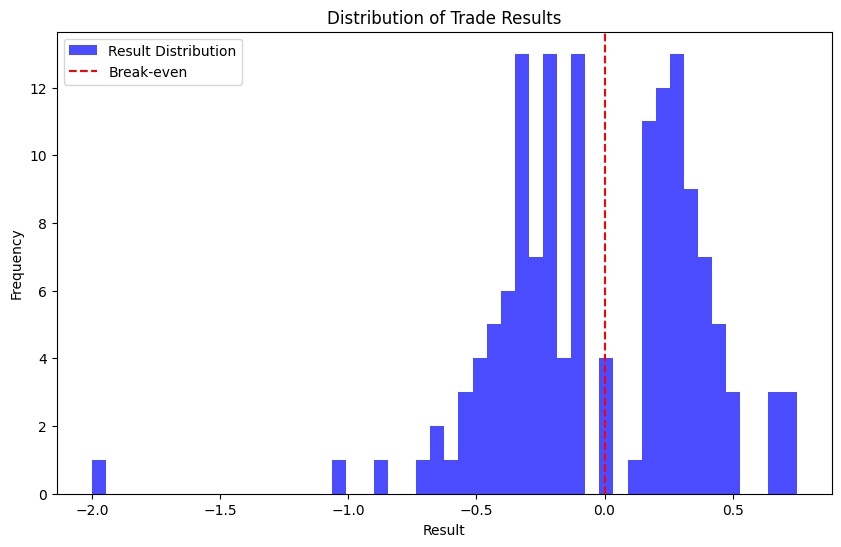

In [ ]:
import matplotlib.pyplot as plt

# Гистограмма результатов
plt.figure(figsize=(10, 6))
plt.hist(df['result'], bins=50, color='blue', alpha=0.7, label='Result Distribution')
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Distribution of Trade Results')
plt.legend()
plt.show()

symbol
ORDIUSDT       -1.802100
SOLUSDT        -1.250000
WLDUSDT        -0.384600
SUIUSDT        -0.365370
APEUSDT        -0.318500
WIFUSDT         0.406480
1000PEPEUSDT    0.518115
Name: result, dtype: float64


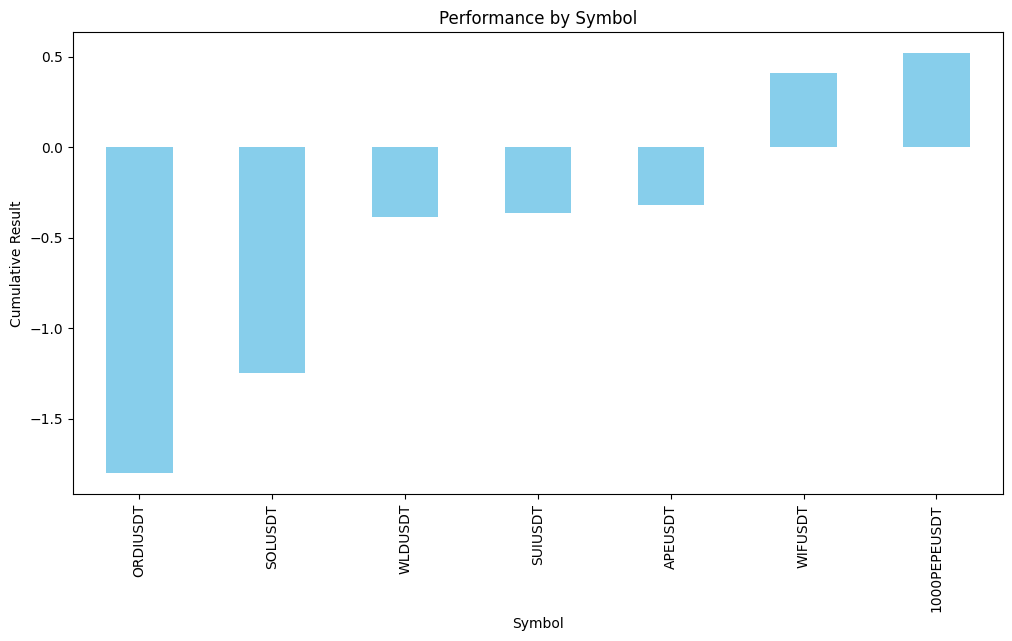

In [ ]:
# Группировка по символам
symbol_performance = df.groupby('symbol')['result'].sum().sort_values()

print(symbol_performance)

# График
symbol_performance.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.xlabel('Symbol')
plt.ylabel('Cumulative Result')
plt.title('Performance by Symbol')
plt.show()

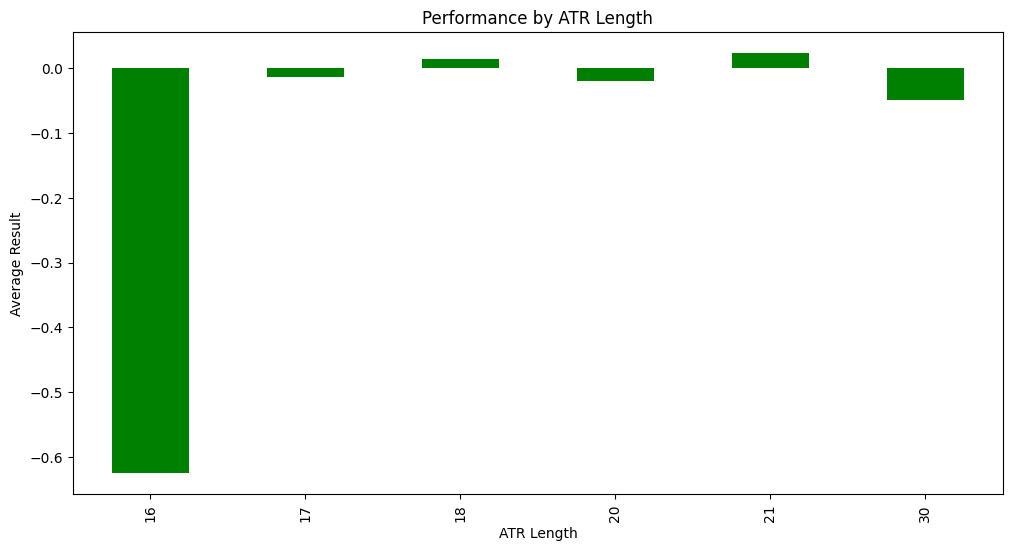

In [ ]:
# Средний результат по `atr_length`
atr_performance = df.groupby('atr_length')['result'].mean()

# График
atr_performance.plot(kind='bar', figsize=(12, 6), color='green')
plt.xlabel('ATR Length')
plt.ylabel('Average Result')
plt.title('Performance by ATR Length')
plt.show()

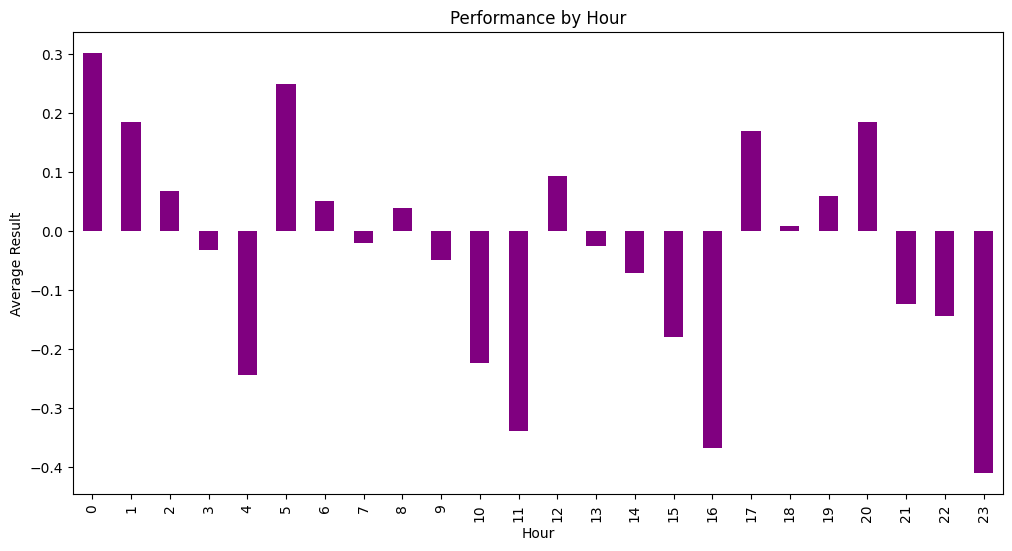

In [ ]:
# Конвертация времени
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')

# Анализ по времени
df['hour'] = df['open_time'].dt.hour
time_performance = df.groupby('hour')['result'].mean()

# График
time_performance.plot(kind='bar', figsize=(12, 6), color='purple')
plt.xlabel('Hour')
plt.ylabel('Average Result')
plt.title('Performance by Hour')
plt.show()

symbol
ORDIUSDT       -1.802100
SOLUSDT        -1.250000
WLDUSDT        -0.384600
SUIUSDT        -0.365370
APEUSDT        -0.318500
WIFUSDT         0.406480
1000PEPEUSDT    0.518115
Name: result, dtype: float64


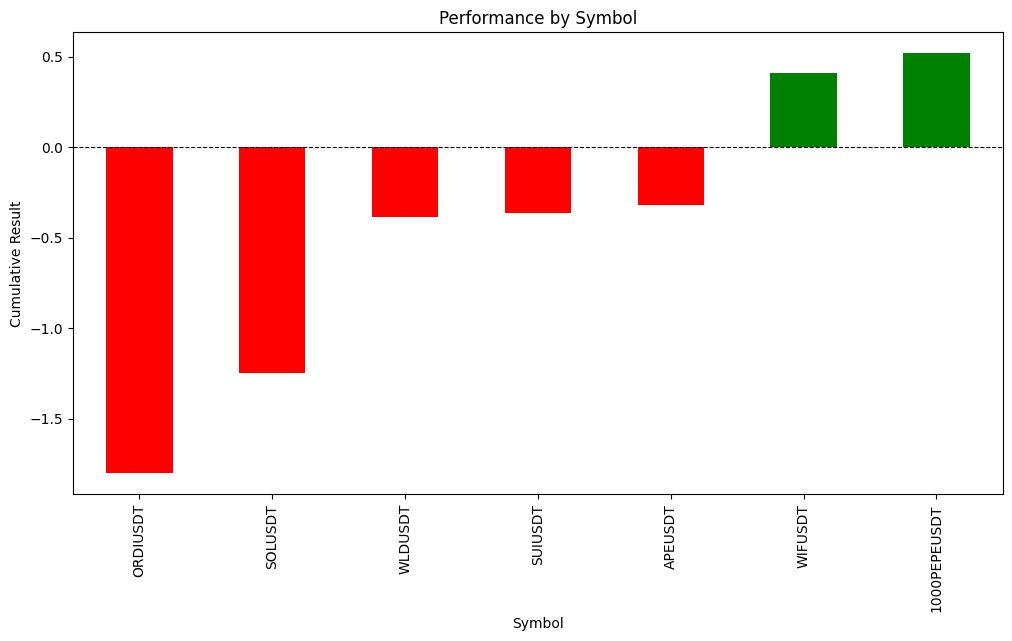

In [ ]:
# Группировка по символам и подсчет общей прибыли/убытка
symbol_performance = df.groupby('symbol')['result'].sum().sort_values()

# Вывод таблицы и графика
print(symbol_performance)

# Построим график
symbol_performance.plot(kind='bar', figsize=(12, 6), color=['red' if x < 0 else 'green' for x in symbol_performance])
plt.xlabel('Symbol')
plt.ylabel('Cumulative Result')
plt.title('Performance by Symbol')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()


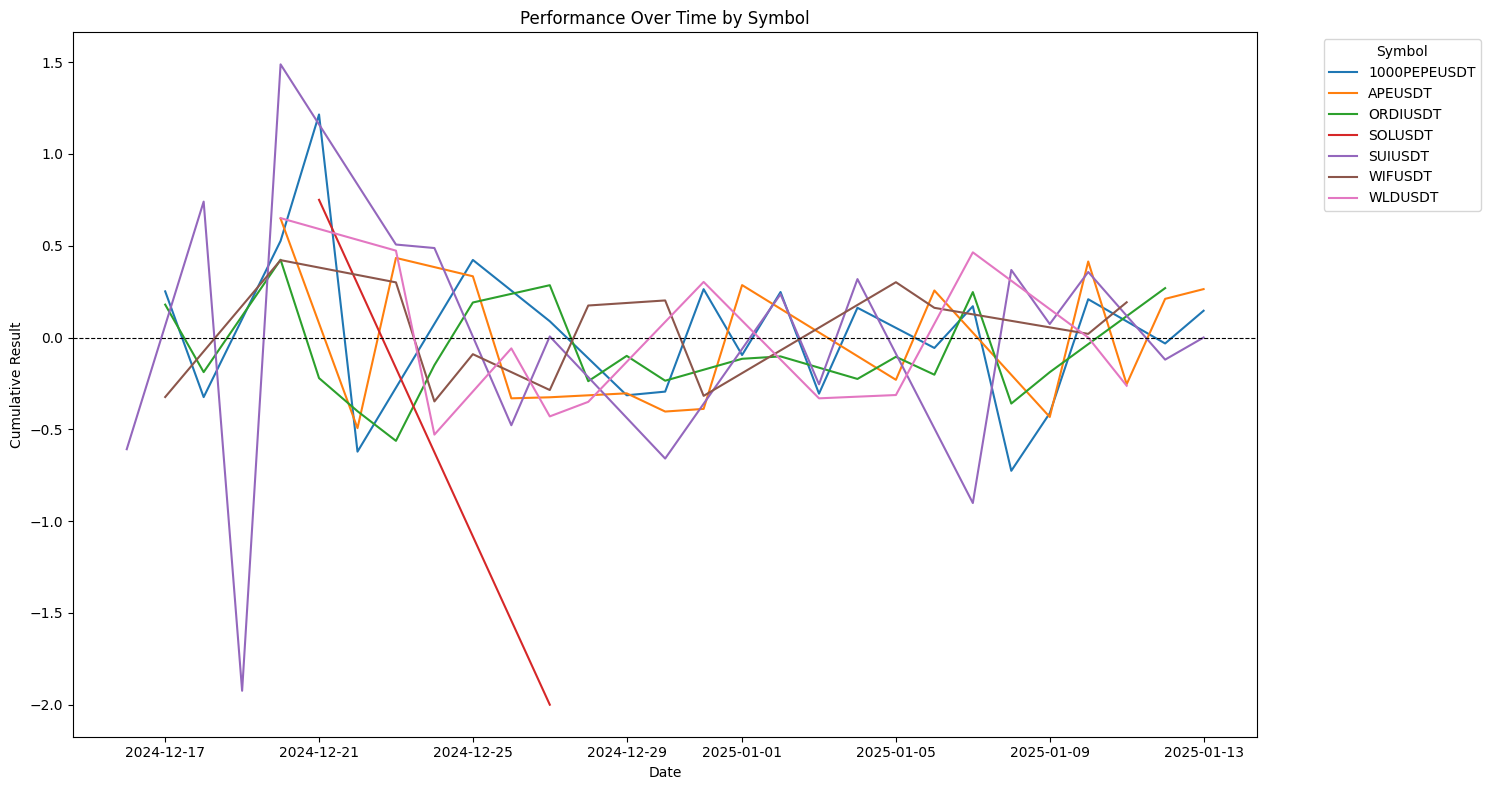

In [ ]:
# Конвертация времени в формат даты
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')

# Группировка по символам и времени
symbol_time_performance = df.groupby(['symbol', df['open_time'].dt.date])['result'].sum().reset_index()

# Построение графиков для каждой монеты
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.lineplot(data=symbol_time_performance, x='open_time', y='result', hue='symbol')
plt.xlabel('Date')
plt.ylabel('Cumulative Result')
plt.title('Performance Over Time by Symbol')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

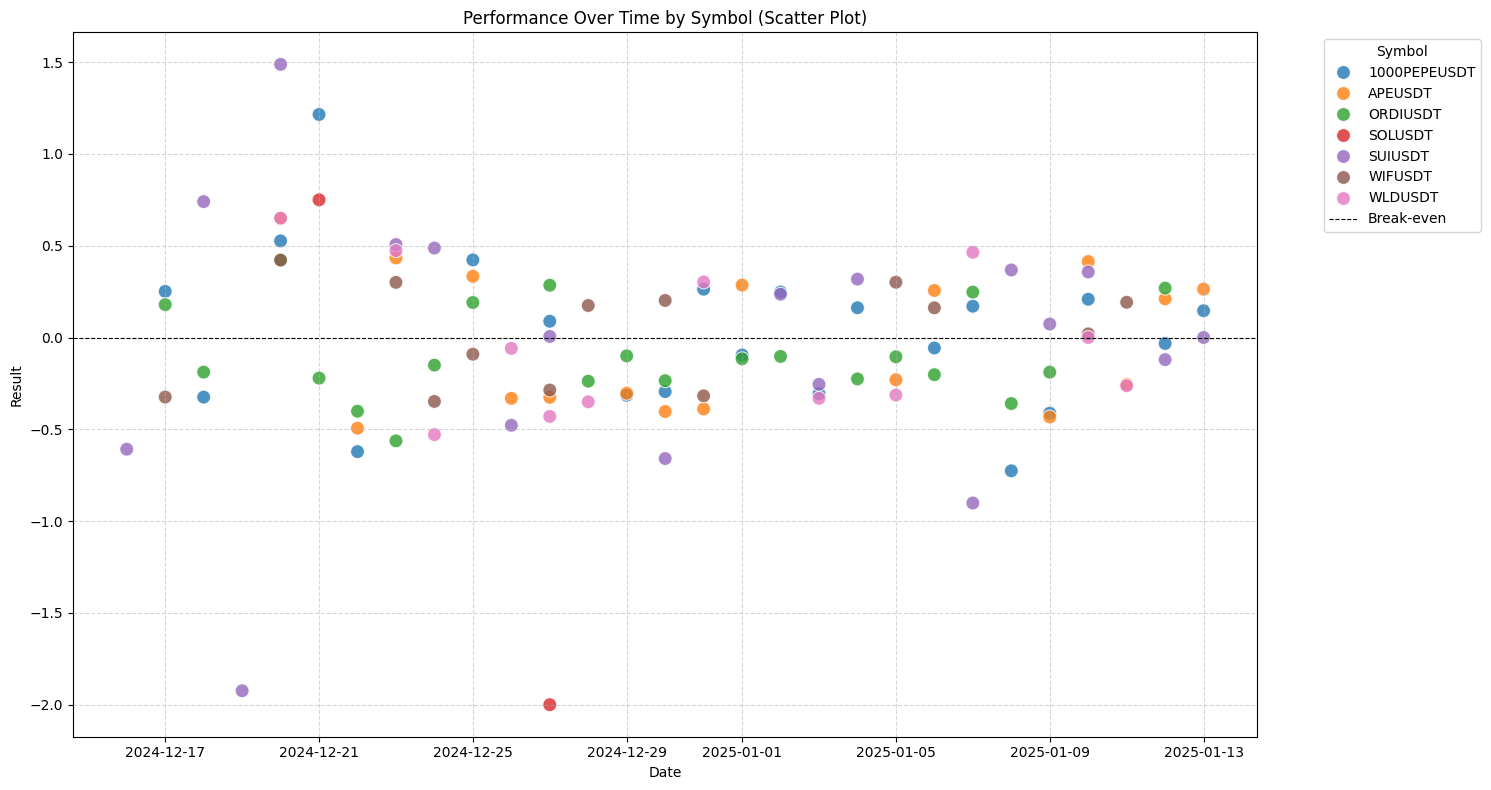

In [ ]:
# Построение графика с точками вместо линий
plt.figure(figsize=(15, 8))

# Используем scatterplot для отображения точек
sns.scatterplot(data=symbol_time_performance, x='open_time', y='result', hue='symbol', palette='tab10', s=100, alpha=0.8)

# Настройки осей и заголовка
plt.xlabel('Date')
plt.ylabel('Result')
plt.title('Performance Over Time by Symbol (Scatter Plot)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Break-even')
plt.legend(title='Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

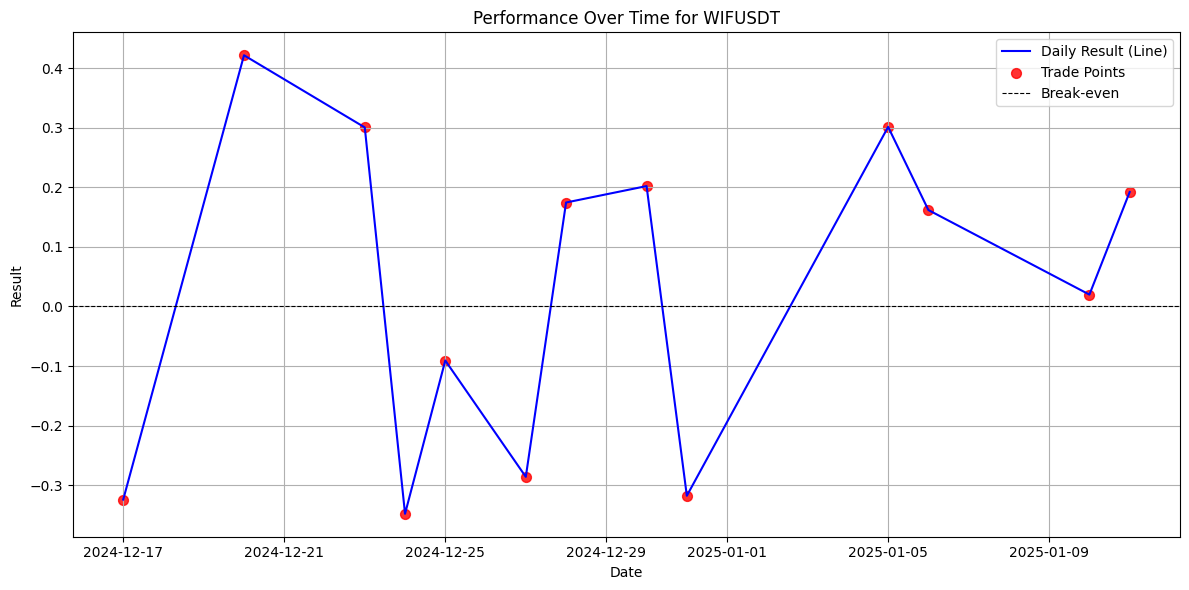

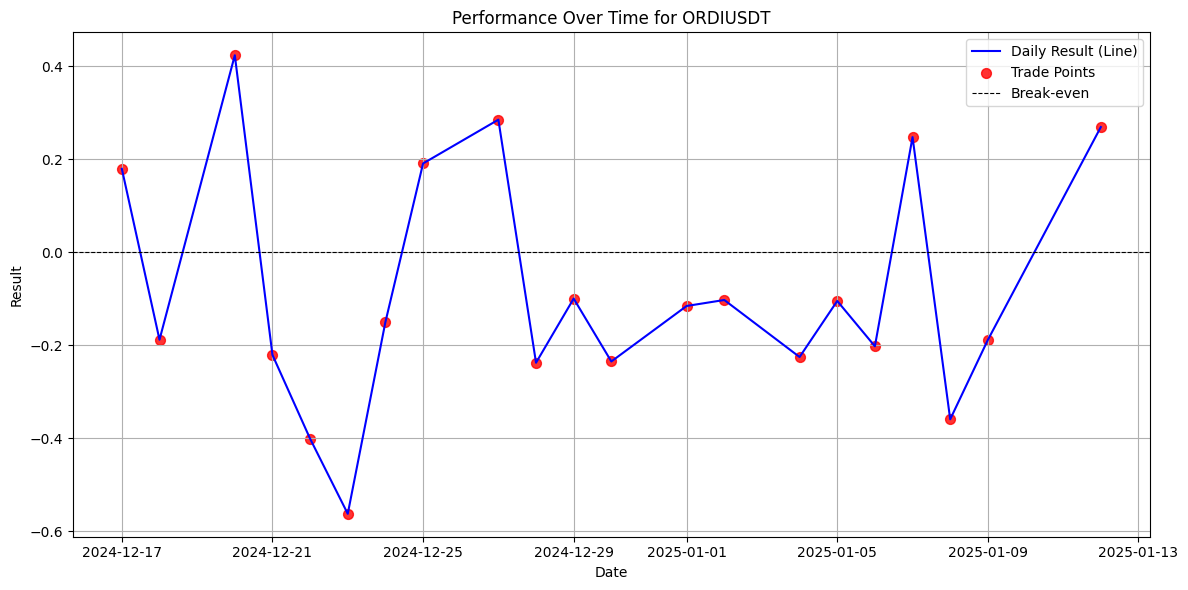

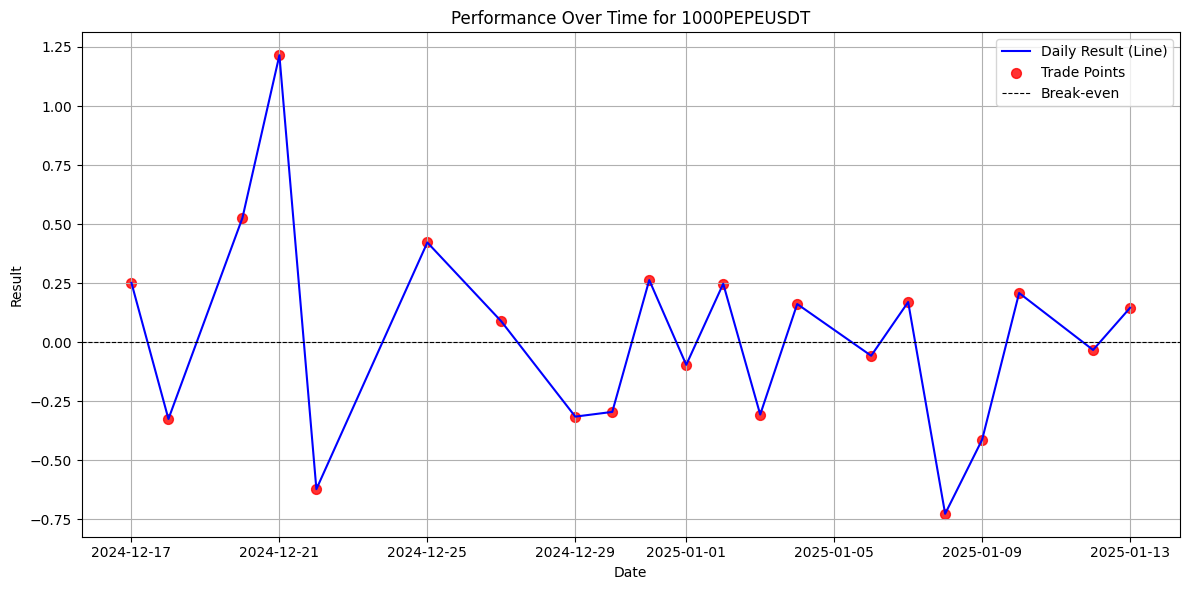

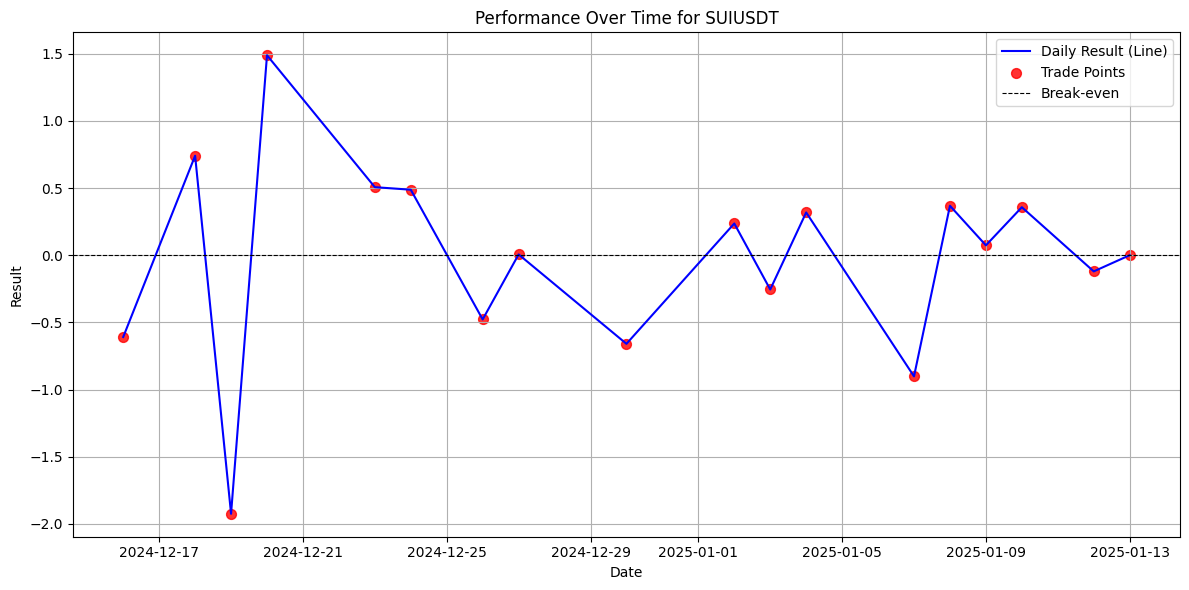

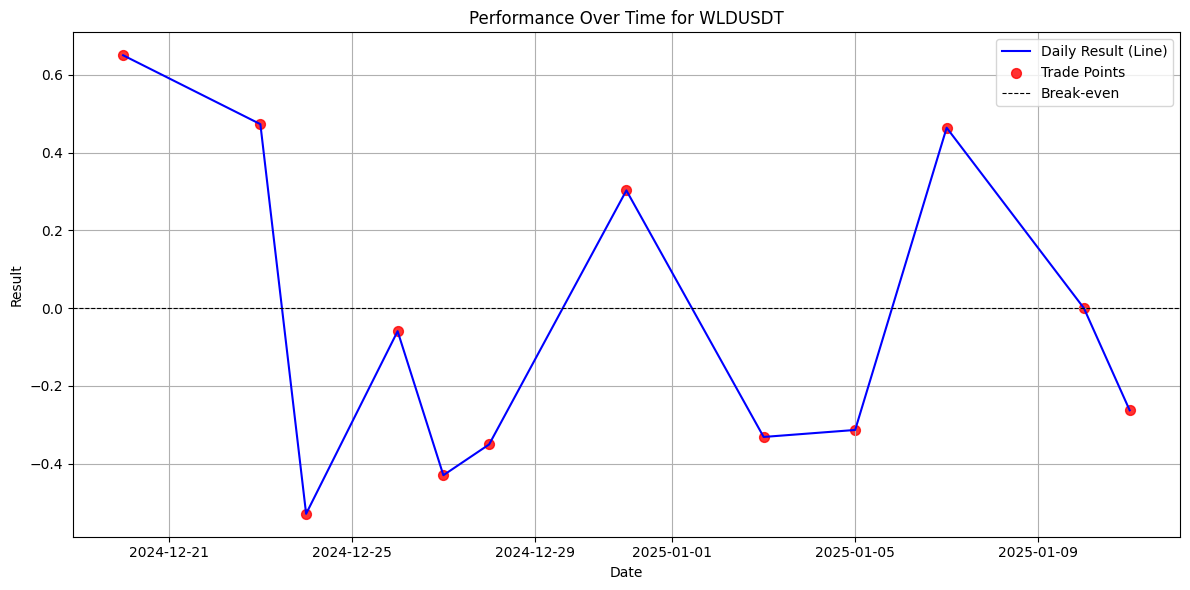

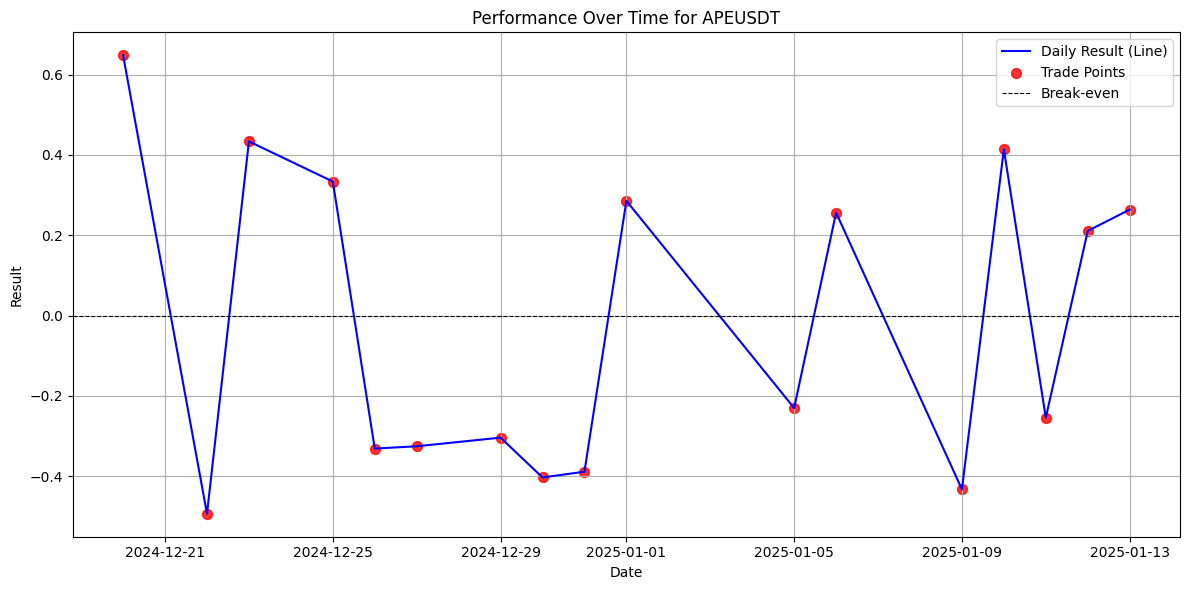

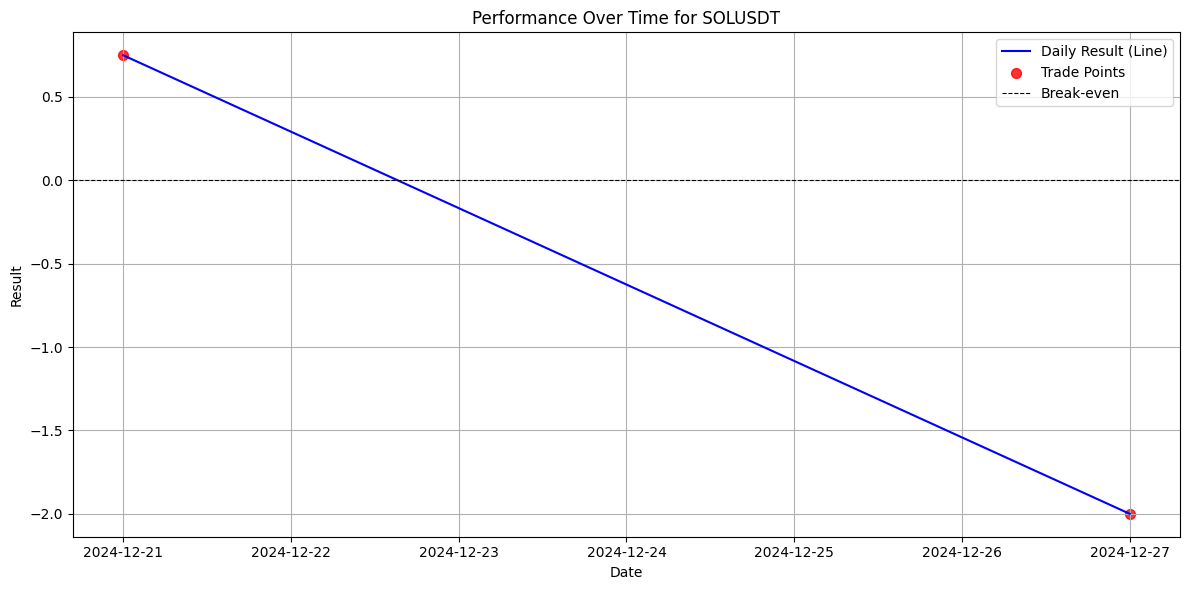

In [ ]:
# Уникальные символы
symbols = df['symbol'].unique()

# Построение графика для каждой монеты
import matplotlib.pyplot as plt

for symbol in symbols:
    # Фильтрация данных по символу
    symbol_data = symbol_time_performance[symbol_time_performance['symbol'] == symbol]

    # Построение графика
    plt.figure(figsize=(12, 6))

    # Линия для кумулятивного результата
    plt.plot(symbol_data['open_time'], symbol_data['result'], label='Daily Result (Line)', color='blue', linewidth=1.5)

    # Точки для сделок
    plt.scatter(symbol_data['open_time'], symbol_data['result'], label='Trade Points', color='red', s=50, alpha=0.8)

    # Линия для уровня безубыточности
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Break-even')

    # Настройки графика
    plt.title(f'Performance Over Time for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Result')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




,id,order_size,open_time,close_time,window_size,leverage,entry_price,quantity,atr_length,take_atr,loss_atr,take_price,stop_price,result,msg_id,hour,cumulative_result
count,29.000000,29.000000,29,27,29.0,29.0,29.000000,29.000000,29.0,29.0,29.00,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,76.034483,9.759851,2024-12-31 11:08:17.879275520,2024-12-31 08:54:18.233851392,10.0,20.0,4.577072,2.144828,17.0,2.0,3.36,4.588255,4.558276,-0.012599,1492.379310,12.793103,-0.394546
min,1.000000,9.555000,2024-12-16 19:00:00.966000,2024-12-18 04:26:20.980000,10.0,20.0,3.740700,1.900000,17.0,2.0,3.36,3.962800,3.259900,-1.040160,1344.000000,1.000000,-1.792220
25%,35.000000,9.674070,2024-12-23 18:00:00.841999872,2024-12-23 17:52:32.616999936,10.0,20.0,4.359600,2.000000,17.0,2.0,3.36,4.381800,4.196000,-0.477840,1410.000000,7.000000,-0.675710
50%,88.000000,9.725820,2025-01-02 13:00:01,2025-01-02 09:52:02.103000064,10.0,20.0,4.518800,2.200000,17.0,2.0,3.36,4.602600,4.519300,0.236060,1517.000000,13.000000,-0.365370
75%,119.000000,9.858640,2025-01-09 03:00:00.742000128,2025-01-08 14:20:23.510500096,10.0,20.0,4.821400,2.200000,17.0,2.0,3.36,4.795500,5.037500,0.367920,1578.000000,19.000000,-0.142160
max,146.000000,9.996000,2025-01-13 10:00:00.857000,2025-01-13 03:33:01.630000,10.0,20.0,5.219300,2.600000,17.0,2.0,3.36,5.213400,5.556200,0.744120,1631.000000,23.000000,0.982840
std,48.717467,0.116545,NaN,NaN,0.0,0.0,0.349555,0.172350,0.0,0.0,0.00,0.321463,0.562343,0.518152,96.629415,7.158308,0.589651


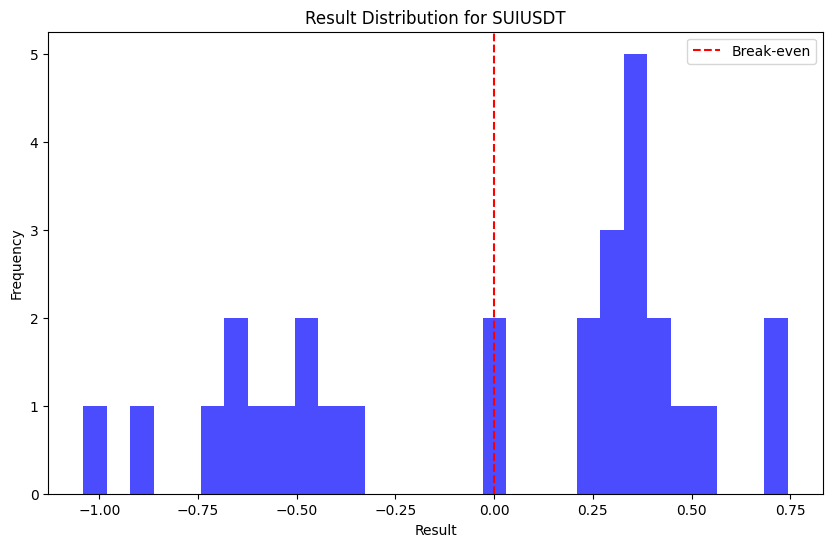

<ipython-input-35-b161d4d4b019>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['cumulative_result'] = symbol_df['result'].cumsum()


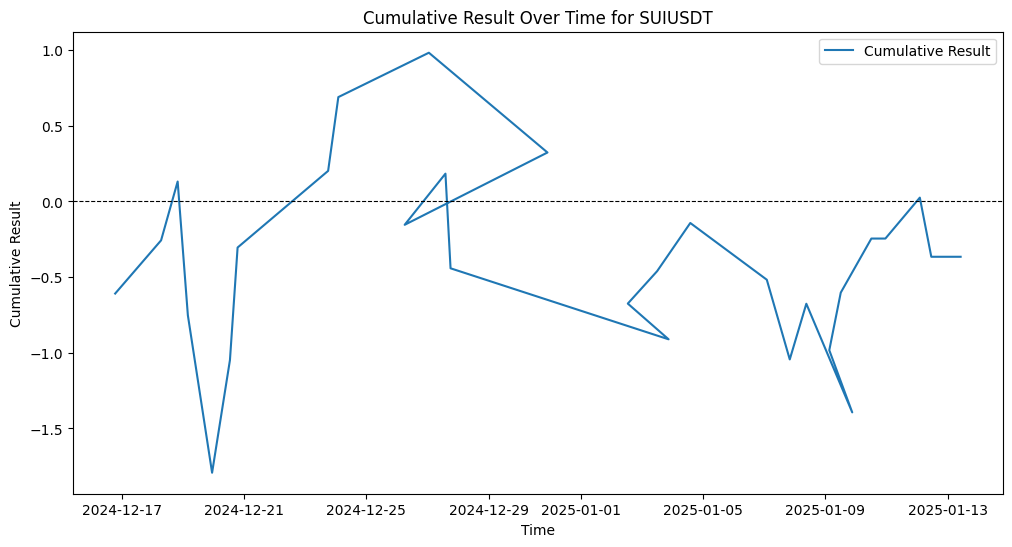

In [ ]:
# Пример для одной монеты
symbol = 'SUIUSDT'  # Замените на нужный символ

# Фильтрация по символу
symbol_df = df[df['symbol'] == symbol]

# Статистика
display(symbol_df.describe())

# Гистограмма результатов
plt.figure(figsize=(10, 6))
plt.hist(symbol_df['result'], bins=30, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label='Break-even')
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title(f'Result Distribution for {symbol}')
plt.legend()
plt.show()

# График доходности во времени
symbol_df['cumulative_result'] = symbol_df['result'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(symbol_df['open_time'], symbol_df['cumulative_result'], label='Cumulative Result')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Time')
plt.ylabel('Cumulative Result')
plt.title(f'Cumulative Result Over Time for {symbol}')
plt.legend()
plt.show()


Минимальный результат по каждой монете:
symbol
1000PEPEUSDT    0.20962
APEUSDT        -0.95240
ORDIUSDT       -1.80210
SOLUSDT        -1.25000
SUIUSDT        -1.79222
WIFUSDT        -0.32699
WLDUSDT        -0.58600
Name: cumulative_result, dtype: float64


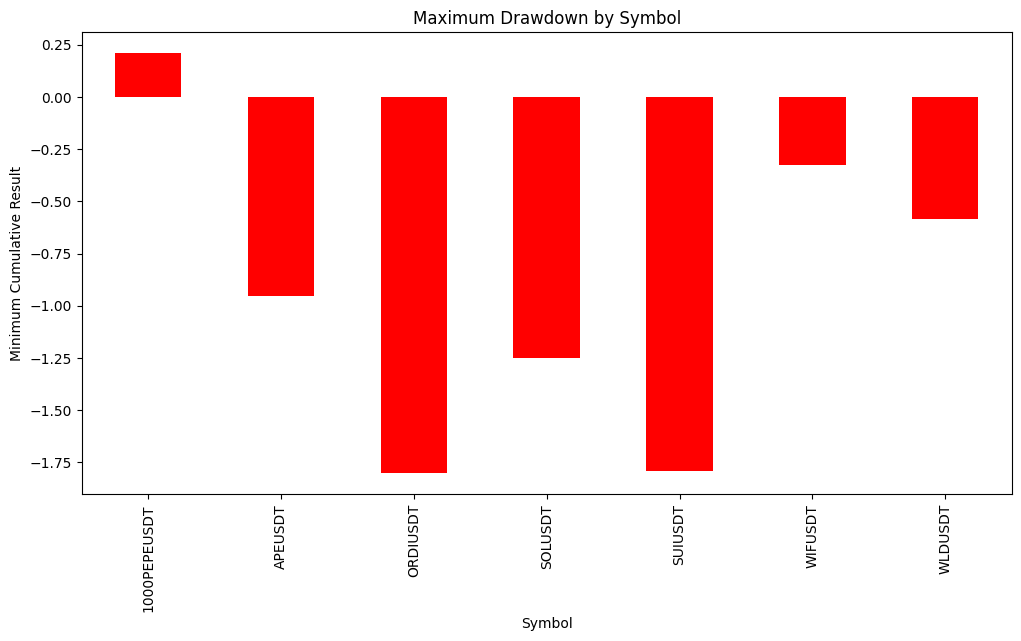

In [ ]:
# Добавим кумулятивный результат для каждой монеты
df['cumulative_result'] = df.groupby('symbol')['result'].cumsum()

# Определим минимальные точки для каждой монеты
min_performance = df.groupby('symbol')['cumulative_result'].min()

print("Минимальный результат по каждой монете:")
print(min_performance)

# График просадки по монетам
min_performance.plot(kind='bar', figsize=(12, 6), color='red')
plt.xlabel('Symbol')
plt.ylabel('Minimum Cumulative Result')
plt.title('Maximum Drawdown by Symbol')
plt.show()


In [ ]:
# Добавим категорию 'profit_type' для обозначения прибыльных и убыточных сделок
df['profit_type'] = df['result'].apply(lambda x: 'Profitable' if x > 0 else 'Unprofitable')


profit_type   Profitable  Unprofitable
symbol                                
1000PEPEUSDT          21            15
APEUSDT                8             9
ORDIUSDT               6            26
SOLUSDT                1             1
SUIUSDT               16            13
WIFUSDT               10             7
WLDUSDT                5             8


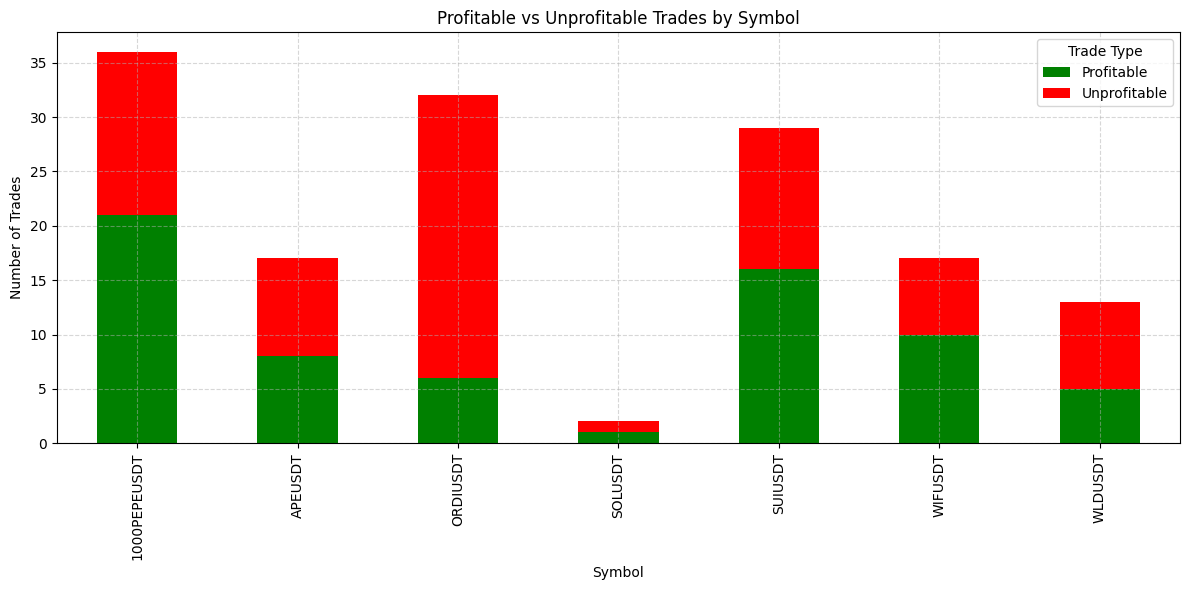

In [ ]:
# Подсчет сделок по символам и типу прибыли
trade_summary = df.groupby(['symbol', 'profit_type'])['result'].count().unstack(fill_value=0)

# Вывод таблицы
print(trade_summary)

# Построение графика
trade_summary.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
plt.xlabel('Symbol')
plt.ylabel('Number of Trades')
plt.title('Profitable vs Unprofitable Trades by Symbol')
plt.legend(title='Trade Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


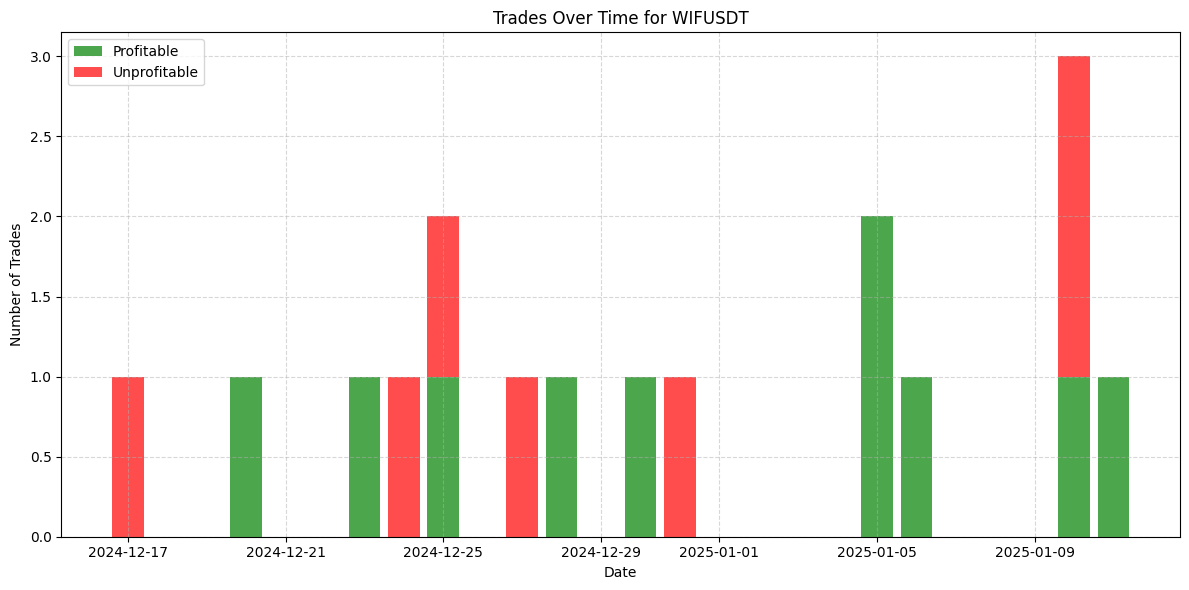

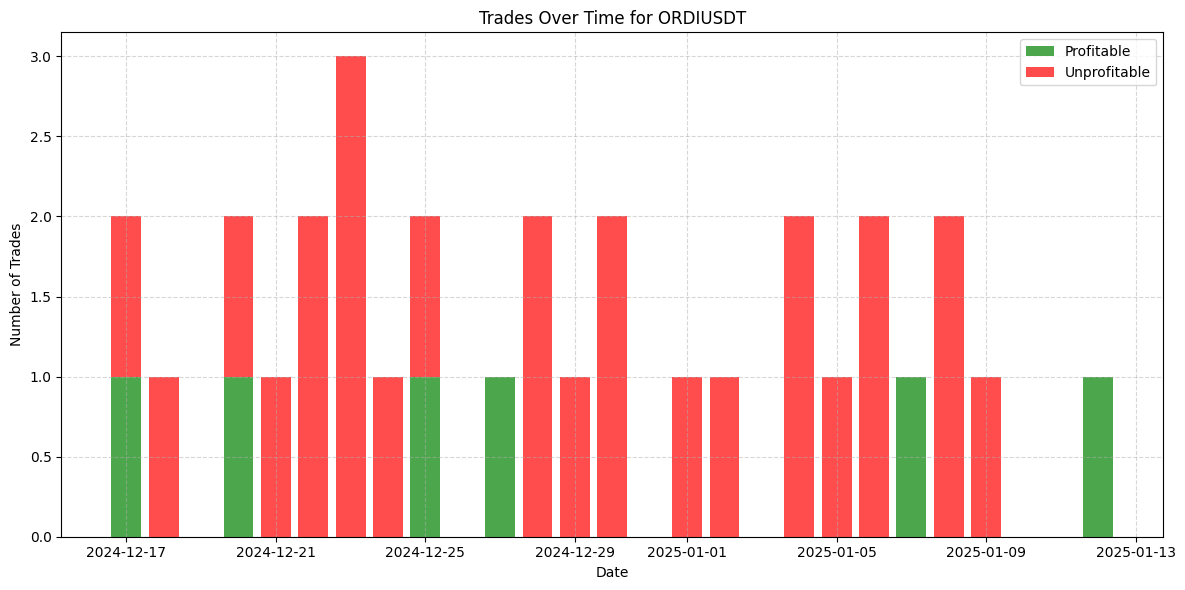

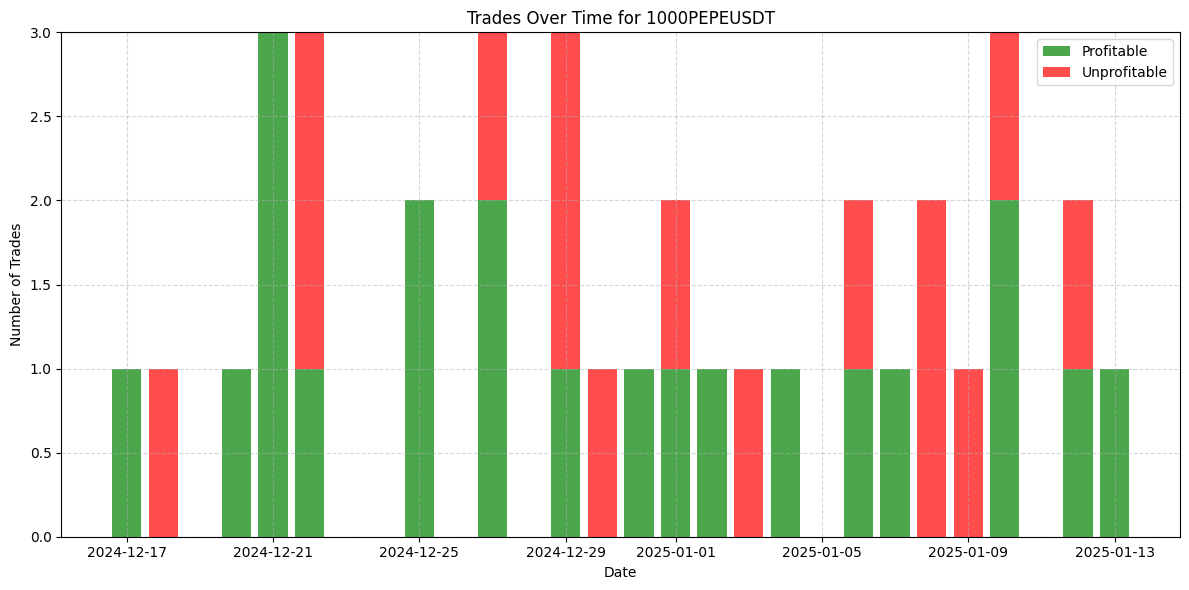

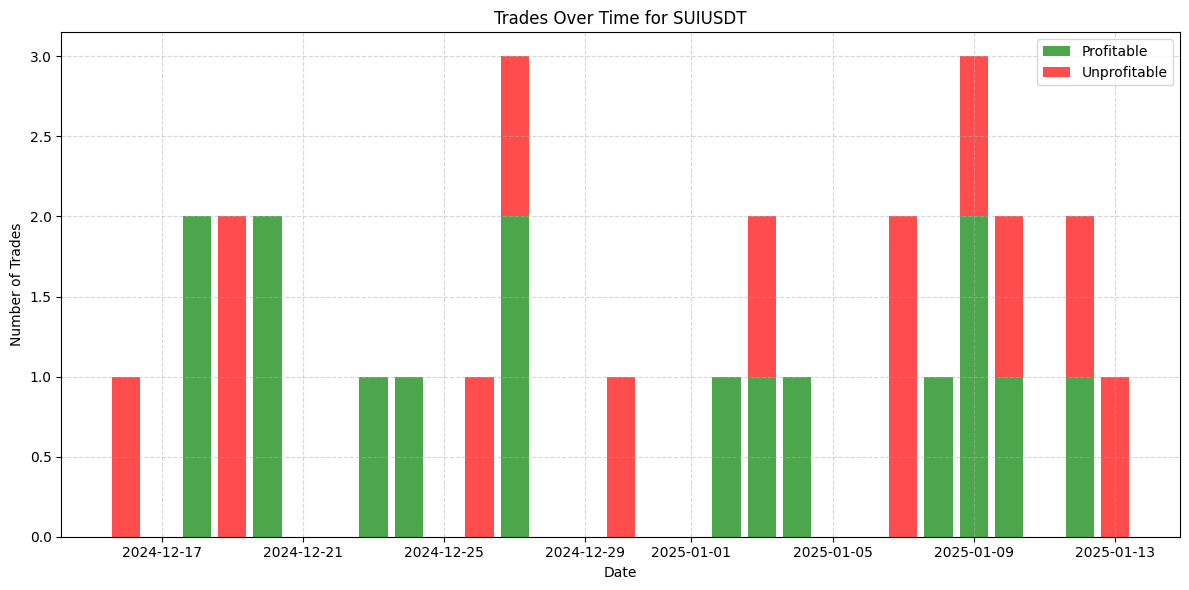

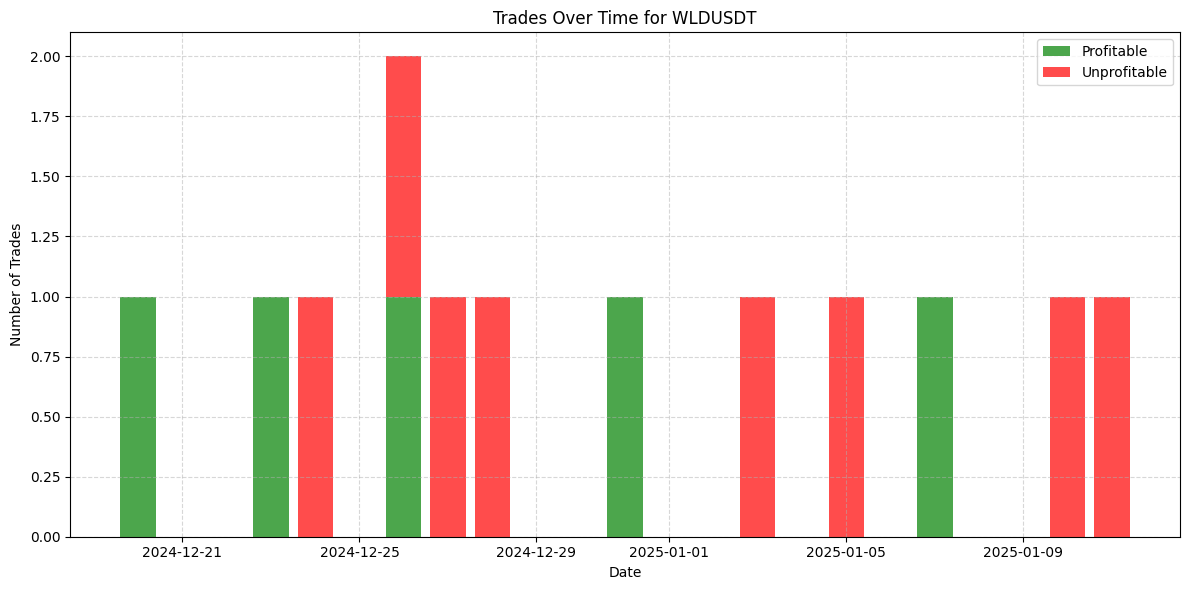

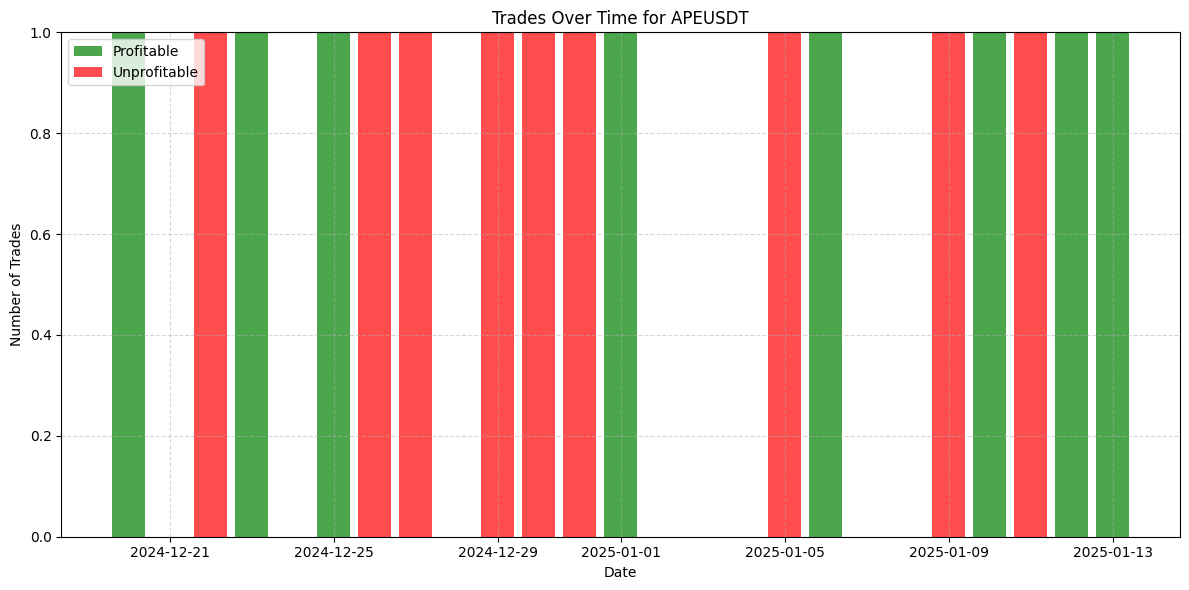

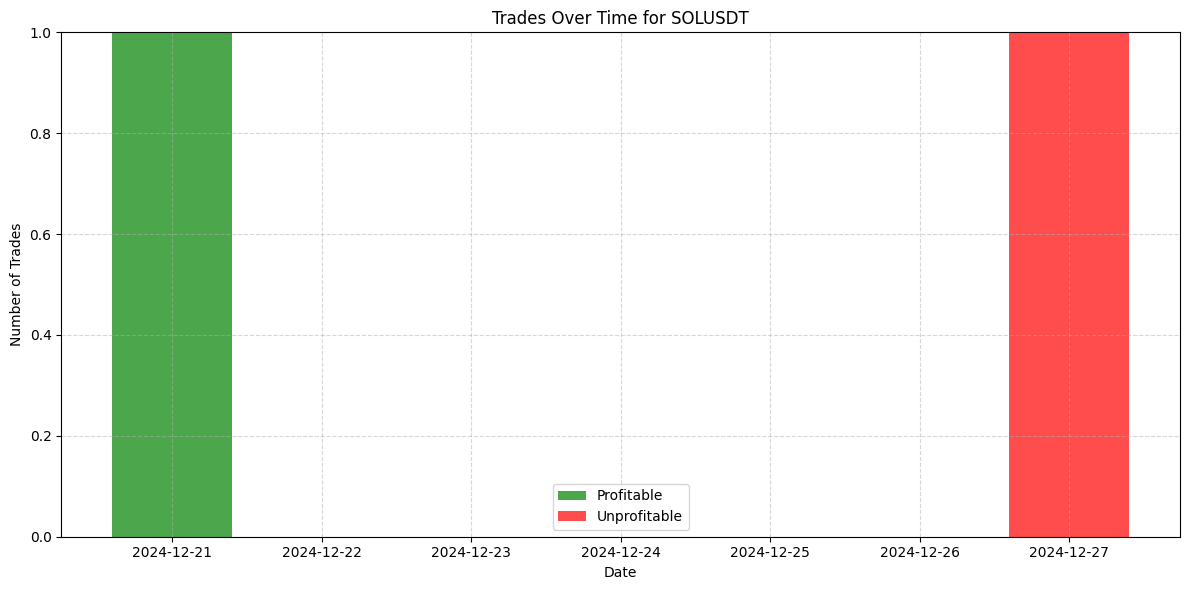

In [ ]:
# Конвертируем время в дату для анализа по периодам
df['date'] = pd.to_datetime(df['open_time']).dt.date

# Группировка по дате и символу
trade_time_analysis = df.groupby(['symbol', 'date', 'profit_type'])['result'].count().unstack(fill_value=0).reset_index()

# Построение графиков для каждой монеты
symbols = df['symbol'].unique()

for symbol in symbols:
    symbol_data = trade_time_analysis[trade_time_analysis['symbol'] == symbol]

    # Построение графика
    plt.figure(figsize=(12, 6))
    plt.bar(symbol_data['date'], symbol_data['Profitable'], color='green', label='Profitable', alpha=0.7)
    plt.bar(symbol_data['date'], symbol_data['Unprofitable'], bottom=symbol_data['Profitable'], color='red', label='Unprofitable', alpha=0.7)

    # Настройки графика
    plt.title(f'Trades Over Time for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Number of Trades')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


profit_type   Profitable  Unprofitable
symbol                                
1000PEPEUSDT    0.258273     -0.327041
APEUSDT         0.355662     -0.351533
ORDIUSDT        0.350717     -0.150246
SOLUSDT         0.750000     -2.000000
SUIUSDT         0.400556     -0.521097
WIFUSDT         0.228023     -0.267679
WLDUSDT         0.447600     -0.327825


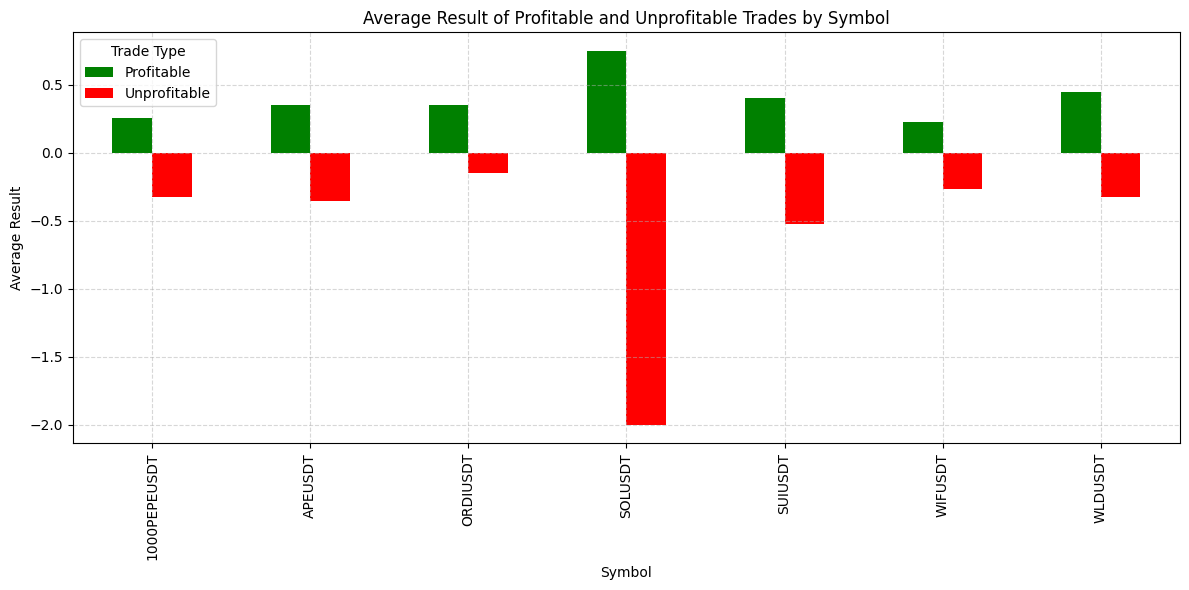

In [ ]:
# Подсчет среднего результата для каждой категории
profitability_analysis = df.groupby(['symbol', 'profit_type'])['result'].mean().unstack()

print(profitability_analysis)

# Построение графика
profitability_analysis.plot(kind='bar', figsize=(12, 6), color=['green', 'red'])
plt.xlabel('Symbol')
plt.ylabel('Average Result')
plt.title('Average Result of Profitable and Unprofitable Trades by Symbol')
plt.legend(title='Trade Type')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Функция для расчета средней прибыли на сделку
def avg_profit(results):
    return results[results > 0].mean()

# Функция для расчета среднего убытка на сделку
def avg_loss(results):
    return results[results < 0].mean()

# Группировка и расчет метрик
final_table = df.groupby('symbol').agg(
    Profitable=('profit_type', lambda x: (x == 'Profitable').sum()),  # Количество прибыльных сделок
    Unprofitable=('profit_type', lambda x: (x == 'Unprofitable').sum()),  # Количество убыточных сделок
    Avg_Profit=('result', avg_profit),  # Средняя прибыль на сделку
    Avg_Loss=('result', avg_loss),  # Средний убыток на сделку
    Avg_Result=('result', 'mean'),  # Средний результат на сделку
    Max_Profit=('result', 'max'),  # Максимальный профит
    Min_Loss=('result', 'min'),  # Минимальный убыток
    Cumulative_Sum=('result', 'sum')  # Кумулятивная сумма
).reset_index()

# Добавление winrate
final_table['Winrate'] = final_table['Profitable'] / (final_table['Profitable'] + final_table['Unprofitable'])

# Вывод таблицы
display(final_table)

# Сохранение в файл
final_table.to_csv('final_trade_analysis_with_winrate.csv', index=False)


,symbol,Profitable,Unprofitable,Avg_Profit,Avg_Loss,Avg_Result,Max_Profit,Min_Loss,Cumulative_Sum,Winrate
0,1000PEPEUSDT,21,15,0.258273,-0.327041,0.014392,0.526289,-0.518822,0.518115,0.583333
1,APEUSDT,8,9,0.355662,-0.351533,-0.018735,0.648000,-0.493600,-0.318500,0.470588
2,ORDIUSDT,6,26,0.350717,-0.150246,-0.056316,0.678300,-0.254700,-1.802100,0.187500
3,SOLUSDT,1,1,0.750000,-2.000000,-0.625000,0.750000,-2.000000,-1.250000,0.500000
4,SUIUSDT,16,13,0.400556,-0.615842,-0.012599,0.744120,-1.040160,-0.365370,0.551724
5,WIFUSDT,10,7,0.228023,-0.312292,0.023911,0.421500,-0.348000,0.406480,0.588235
6,WLDUSDT,5,8,0.447600,-0.374657,-0.029585,0.650400,-0.528800,-0.384600,0.384615


## Backtesting and real trades

In [ ]:
import os
import requests
import zipfile
import pandas as pd
from datetime import datetime, timedelta, timezone
import csv
import io

def generate_days(start_date, end_date):
    """
    Генерация списка дней между двумя датами (включительно).
    """
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')
    days = []

    while start_date <= end_date:
        days.append(start_date.strftime('%Y-%m-%d'))
        start_date += timedelta(days=1)

    return days


def download_klines_daily_binance(symbol, interval, start_date, end_date):
    """
    Загрузка данных с точностью до дня через Binance Vision.
    """
    days = generate_days(start_date, end_date)

    if not os.path.exists('klines'):
        os.mkdir('klines')

    klines = {
        'Date': [], 'Open': [], 'High': [], 'Low': [], 'Close': [], 'Volume': []
    }

    for day in days:
        filename = f"{symbol}-{interval}-{day}.zip"
        file_path = f"klines/{filename}"

        # Проверка наличия файла
        if not os.path.exists(file_path) or os.path.getsize(file_path) == 0:
            url = f"https://data.binance.vision/data/futures/um/daily/klines/{symbol}/{interval}/{filename}"
            try:
                # print(f"Скачиваю файл: {filename}")
                r = requests.get(url, allow_redirects=True)
                if r.status_code == 200:
                    with open(file_path, 'wb') as f:
                        f.write(r.content)
                else:
                    print(f"Файл {filename} недоступен на сервере. Пропускаем.")
                    continue
            except Exception as e:
                print(f"Ошибка загрузки файла {filename}: {e}. Пропускаем.")
                continue

        # Извлечение данных из архива
        try:
            with zipfile.ZipFile(file_path, 'r') as zip_file:
                with zip_file.open(f"{symbol}-{interval}-{day}.csv", 'r') as csv_file:
                    csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
                    for row in csv_reader:
                        if row[0].isdigit():
                            klines['Date'].append(datetime.fromtimestamp(int(row[0]) / 1000, tz=timezone.utc))
                            klines['Open'].append(float(row[1]))
                            klines['High'].append(float(row[2]))
                            klines['Low'].append(float(row[3]))
                            klines['Close'].append(float(row[4]))
                            klines['Volume'].append(float(row[5]))
        except (zipfile.BadZipFile, KeyError):
            print(f"Ошибка: Файл {file_path} поврежден или не является ZIP. Пропускаем.")
            continue

    if not klines['Date']:
        raise ValueError(f"Нет доступных данных для {symbol} в диапазоне {start_date} - {end_date}")

    df = pd.DataFrame(klines)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    return df


In [ ]:
symbol = 'SOLUSDT'
interval = '1h'
start_date = '2024-12-16'
end_date = '2025-01-14'

df = download_klines_daily_binance(symbol, interval, start_date, end_date)

print(symbol, interval)
print(f"Общее количество строк в загруженных данных: {len(df)}")
print(f"Диапазон дат: {df.index.min()} - {df.index.max()}")
df

SOLUSDT 1h
Общее количество строк в загруженных данных: 720
Диапазон дат: 2024-12-16 00:00:00+00:00 - 2025-01-14 23:00:00+00:00


,Open,High,Low,Close,Volume
Date,,,,,
2024-12-16 00:00:00+00:00,224.21,227.41,223.35,225.86,1011426.0
2024-12-16 01:00:00+00:00,225.86,227.04,225.09,225.53,525222.0
2024-12-16 02:00:00+00:00,225.52,225.69,221.82,222.20,627042.0
2024-12-16 03:00:00+00:00,222.20,222.83,220.32,221.15,484034.0
2024-12-16 04:00:00+00:00,221.15,222.10,220.68,221.26,240862.0
...,...,...,...,...,...
2025-01-14 19:00:00+00:00,186.56,187.50,186.05,186.99,283199.0
2025-01-14 20:00:00+00:00,186.99,187.20,185.72,187.07,334497.0
2025-01-14 21:00:00+00:00,187.07,187.83,186.58,187.19,190196.0


In [ ]:
# Настройка стратегии с оптимизированными параметрами
SlopingStrategy.window_length = 100
SlopingStrategy.min_space = 5
SlopingStrategy.sloping_atr_length = 16
SlopingStrategy.take_profit_multiplier = 2
SlopingStrategy.stop_loss_multiplier = 1.88

print("\nНастройка стратегии завершена.")

# Тестируем стратегию
test = backtesting.Backtest(data=df, strategy=SlopingStrategy, cash=1_000_000, commission=0.0005)
res = test.run()

print(symbol)
print()
print("Результаты с оптимизированными параметрами:", res)
print('Window length', SlopingStrategy.window_length)
print('Min space', SlopingStrategy.min_space)
print('Sloping atr length', SlopingStrategy.sloping_atr_length)
print('Take profit multiplier', SlopingStrategy.take_profit_multiplier)
print('Stop loss multiplier', SlopingStrategy.stop_loss_multiplier)


Настройка стратегии завершена.
SOLUSDT

Результаты с оптимизированными параметрами: Start                     2024-12-16 00:00...
End                       2025-01-14 23:00...
Duration                     29 days 23:00:00
Exposure Time [%]                   30.277778
Equity Final [$]                926929.489321
Equity Peak [$]                  1020185.1136
Return [%]                          -7.307051
Buy & Hold Return [%]              -17.001682
Return (Ann.) [%]                   -60.27461
Volatility (Ann.) [%]               12.519198
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -10.398227
Avg. Drawdown [%]                   -5.487778
Max. Drawdown Duration       24 days 17:00:00
Avg. Drawdown Duration       12 days 10:00:00
# Trades                                   13
Win Rate [%]                        38.461538
Best Trade [%]                       3.54